In [1]:
#=======================================
## DNN - Iris
#=======================================

# Need compile Create_DNN_model.

#----------------------------------------
# Set random seed for reproducibility.

seed = 543
from numpy import random
random.seed(seed)
from tensorflow import set_random_seed
set_random_seed(seed)

# Import classes and functions.

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt


C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#----------------------------------------
# Load the iris dataset.

dataset = np.loadtxt("IRIS-Training-Data.txt")

print(type(dataset))

print(dataset.shape)

index = [2, 3]

X = dataset[:, index]
Y = dataset[:, 4]

print(X.shape)
print(Y.shape)

Y = np.array(Y, dtype = int)

print(np.unique(Y))


<class 'numpy.ndarray'>
(150, 5)
(150, 2)
(150,)
[1 2 3]


In [3]:
#----------------------------------------
# one-hot encoding of output variable.

Y_train = np.zeros((len(Y), 3), dtype = int)

for i in range(len(Y)):
	Y_train[i, Y[i] - 1] = 1

print(np.unique(Y_train))


[0 1]


In [4]:
#----------------------------------------
# Standardize the input data.

X_sample_mean = np.mean(X, axis = 0)
print(np.round(X_sample_mean, 4))

X_sample_std = np.std(X, axis = 0, ddof = 1)
print(np.round(X_sample_std, 4))

standardize = lambda x: (x - np.mean(x, axis = 0)) / np.std(x, axis = 0, ddof = 1)

X_train = standardize(X)

print(np.round(np.mean(X_train, axis = 0), 4))
print(np.round(np.std(X_train, axis = 0, ddof = 1), 4))


[3.758  1.1993]
[1.7653 0.7622]
[-0. -0.]
[1. 1.]


In [5]:
#----------------------------------------
# Define 10-fold cross validation test index sets.

fold_num = 10

L = len(X_train)

quotient = L // fold_num
remainder = L % fold_num

fold_length = np.array([quotient]*fold_num)
if remainder > 0:
    fold_length[0:remainder] = fold_length[0:remainder] + 1

index_begin = np.zeros(fold_num, dtype = int)
index_begin[0] = 0

for j in range(1, fold_num):
    index_begin[j] = index_begin[j-1] + fold_length[j-1]

index = np.random.choice(np.arange(L), size = L, replace = False)


In [6]:
## Create DNN model

def create_DNN_model(nodes, drop, kernel, act):
  model = Sequential()
  # Build input_layer & first_hidden_layer
  if drop[0] > 0:
    model.add(Dropout(rate = drop[0], input_shape = (nodes[0], )))
    model.add(Dense(units = nodes[1], kernel_initializer = kernel[0], activation =act[0]))
    if drop[1] > 0:
      model.add(Dropout(rate = drop[1]))
  else:
    model.add(Dense(units = nodes[1], input_dim = nodes[0], kernel_initializer = kernel[0], activation =act[0]))
    if drop[1] > 0:
      model.add(Dropout(rate = drop[1]))
  # Build other_hidden_layer
  for i in range(2, len(nodes) - 1):
    model.add(Dense(units = nodes[i], kernel_initializer = kernel[i-1], activation =act[i-1]))
    if drop[i] > 0:
      model.add(Dropout(rate = drop[i]))
  # Build output_layer
  model.add(Dense(units = nodes[len(nodes)-1], kernel_initializer = kernel[len(kernel) - 1], activation = act[len(act) - 1]))
  return model


In [7]:
#----------------------------------------
# Create the DNN_model

input_dim = X.shape[1]

nodes = [input_dim, 6, 3, 3]
	# first component: number of input nodes
	# last component: number of output nodes

drop = [0, 0.2, 0.2]
	# len(dropout_rate) = len(node) - 1
	# first component: dropout rate for the input layer
	# other components: dropout rates for the hidden layers
	# Dropout rate is not used in the output layer.

#dropout_rate = [0]*(len(node)-1)
#dropout_rate = [0] + [0.2]*(len(node)-2)

kernel = ['uniform', 'uniform', 'uniform']

act = ['relu', 'relu', 'softmax']


In [8]:
#----------------------------------------
# 10-fold cross validation

cv_cc = []
cv_acc = []

for k in range(fold_num):
    # Build the model.
    model = create_DNN_model(nodes, drop, kernel, act)
    # Compile the model.
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    # Select index sets.
    seq_index = range(index_begin[k], (index_begin[k] + fold_length[k]))
    test_index = index[seq_index]
    train_index = np.delete(index, seq_index)
    # Fit the model.
    history = model.fit(X_train[train_index], Y_train[train_index], validation_split = 0.2, epochs = 1000, batch_size = 20, verbose = 1)
    # Evaluate the model.
    scores = model.evaluate(X_train[test_index], Y_train[test_index], verbose = 1)
    print("%s: %.4f" % (model.metrics_names[0], scores[0]))
    print("%s: %.4f" % (model.metrics_names[1], scores[1]))
    cv_cc.append(scores[0])
    cv_acc.append(scores[1])


Train on 108 samples, validate on 27 samples
Epoch 1/1000
108/108 [==============================] - 1s 5ms/step - loss: 1.0987 - acc: 0.2963 - val_loss: 1.0984 - val_acc: 0.3704
Epoch 2/1000
108/108 [==============================] - 0s 226us/step - loss: 1.0986 - acc: 0.3241 - val_loss: 1.0984 - val_acc: 0.3704
Epoch 3/1000
108/108 [==============================] - 0s 292us/step - loss: 1.0984 - acc: 0.3241 - val_loss: 1.0983 - val_acc: 0.3704
Epoch 4/1000
108/108 [==============================] - 0s 259us/step - loss: 1.0983 - acc: 0.4259 - val_loss: 1.0981 - val_acc: 0.7037
Epoch 5/1000
108/108 [==============================] - 0s 307us/step - loss: 1.0981 - acc: 0.5093 - val_loss: 1.0978 - val_acc: 0.5185
Epoch 6/1000
108/108 [==============================] - 0s 294us/step - loss: 1.0978 - acc: 0.5093 - val_loss: 1.0974 - val_acc: 0.3333
Epoch 7/1000
108/108 [==============================] - 0s 242us/step - loss: 1.0974 - acc: 0.4815 - val_loss: 1.0969 - val_acc: 0.7037
Epoch

108/108 [==============================] - 0s 227us/step - loss: 0.5747 - acc: 0.6481 - val_loss: 0.5059 - val_acc: 0.6667
Epoch 61/1000
108/108 [==============================] - 0s 193us/step - loss: 0.6183 - acc: 0.6296 - val_loss: 0.5014 - val_acc: 0.6667
Epoch 62/1000
108/108 [==============================] - 0s 185us/step - loss: 0.5734 - acc: 0.6481 - val_loss: 0.4971 - val_acc: 0.6667
Epoch 63/1000
108/108 [==============================] - 0s 339us/step - loss: 0.6425 - acc: 0.5648 - val_loss: 0.4932 - val_acc: 0.7037
Epoch 64/1000
108/108 [==============================] - 0s 203us/step - loss: 0.5717 - acc: 0.6944 - val_loss: 0.4895 - val_acc: 0.7037
Epoch 65/1000
108/108 [==============================] - 0s 283us/step - loss: 0.5952 - acc: 0.6667 - val_loss: 0.4856 - val_acc: 0.7037
Epoch 66/1000
108/108 [==============================] - 0s 215us/step - loss: 0.5826 - acc: 0.6481 - val_loss: 0.4819 - val_acc: 0.7037
Epoch 67/1000
108/108 [==============================] 

Epoch 120/1000
108/108 [==============================] - 0s 221us/step - loss: 0.5248 - acc: 0.6667 - val_loss: 0.3863 - val_acc: 0.7407
Epoch 121/1000
108/108 [==============================] - 0s 324us/step - loss: 0.5392 - acc: 0.6574 - val_loss: 0.3854 - val_acc: 0.7407
Epoch 122/1000
108/108 [==============================] - 0s 312us/step - loss: 0.5074 - acc: 0.6852 - val_loss: 0.3844 - val_acc: 0.7407
Epoch 123/1000
108/108 [==============================] - 0s 250us/step - loss: 0.5318 - acc: 0.6852 - val_loss: 0.3835 - val_acc: 0.7407
Epoch 124/1000
108/108 [==============================] - 0s 287us/step - loss: 0.5255 - acc: 0.6852 - val_loss: 0.3826 - val_acc: 0.7407
Epoch 125/1000
108/108 [==============================] - 0s 296us/step - loss: 0.5142 - acc: 0.6574 - val_loss: 0.3820 - val_acc: 0.7407
Epoch 126/1000
108/108 [==============================] - 0s 206us/step - loss: 0.5243 - acc: 0.6574 - val_loss: 0.3816 - val_acc: 0.7778
Epoch 127/1000
108/108 [==========

108/108 [==============================] - 0s 258us/step - loss: 0.5138 - acc: 0.7222 - val_loss: 0.3475 - val_acc: 0.8889
Epoch 180/1000
108/108 [==============================] - 0s 262us/step - loss: 0.4927 - acc: 0.7963 - val_loss: 0.3471 - val_acc: 0.8889
Epoch 181/1000
108/108 [==============================] - 0s 252us/step - loss: 0.5050 - acc: 0.7407 - val_loss: 0.3467 - val_acc: 0.8889
Epoch 182/1000
108/108 [==============================] - 0s 185us/step - loss: 0.4800 - acc: 0.7685 - val_loss: 0.3468 - val_acc: 0.9259
Epoch 183/1000
108/108 [==============================] - 0s 281us/step - loss: 0.5205 - acc: 0.7037 - val_loss: 0.3463 - val_acc: 0.9259
Epoch 184/1000
108/108 [==============================] - 0s 294us/step - loss: 0.4816 - acc: 0.7593 - val_loss: 0.3460 - val_acc: 0.9259
Epoch 185/1000
108/108 [==============================] - 0s 278us/step - loss: 0.5538 - acc: 0.6759 - val_loss: 0.3456 - val_acc: 0.9259
Epoch 186/1000
108/108 [=========================

108/108 [==============================] - 0s 204us/step - loss: 0.4666 - acc: 0.7778 - val_loss: 0.3172 - val_acc: 0.9630
Epoch 239/1000
108/108 [==============================] - 0s 214us/step - loss: 0.4734 - acc: 0.7500 - val_loss: 0.3173 - val_acc: 0.9630
Epoch 240/1000
108/108 [==============================] - 0s 183us/step - loss: 0.4528 - acc: 0.8148 - val_loss: 0.3171 - val_acc: 0.9630
Epoch 241/1000
108/108 [==============================] - 0s 277us/step - loss: 0.4597 - acc: 0.8056 - val_loss: 0.3166 - val_acc: 0.9630
Epoch 242/1000
108/108 [==============================] - 0s 266us/step - loss: 0.5068 - acc: 0.7315 - val_loss: 0.3164 - val_acc: 0.9630
Epoch 243/1000
108/108 [==============================] - 0s 240us/step - loss: 0.4108 - acc: 0.8241 - val_loss: 0.3162 - val_acc: 0.9630
Epoch 244/1000
108/108 [==============================] - 0s 204us/step - loss: 0.4659 - acc: 0.7130 - val_loss: 0.3154 - val_acc: 0.9630
Epoch 245/1000
108/108 [=========================

108/108 [==============================] - 0s 253us/step - loss: 0.4899 - acc: 0.7685 - val_loss: 0.3005 - val_acc: 0.9630
Epoch 298/1000
108/108 [==============================] - 0s 235us/step - loss: 0.4161 - acc: 0.8333 - val_loss: 0.2993 - val_acc: 0.9630
Epoch 299/1000
108/108 [==============================] - 0s 262us/step - loss: 0.4435 - acc: 0.8056 - val_loss: 0.2984 - val_acc: 0.9630
Epoch 300/1000
108/108 [==============================] - 0s 211us/step - loss: 0.4736 - acc: 0.7778 - val_loss: 0.2978 - val_acc: 0.9630
Epoch 301/1000
108/108 [==============================] - 0s 279us/step - loss: 0.4144 - acc: 0.8519 - val_loss: 0.2972 - val_acc: 0.9630
Epoch 302/1000
108/108 [==============================] - 0s 279us/step - loss: 0.3996 - acc: 0.8333 - val_loss: 0.2966 - val_acc: 0.9630
Epoch 303/1000
108/108 [==============================] - 0s 247us/step - loss: 0.4507 - acc: 0.7870 - val_loss: 0.2963 - val_acc: 0.9630
Epoch 304/1000
108/108 [=========================

108/108 [==============================] - 0s 258us/step - loss: 0.4674 - acc: 0.7778 - val_loss: 0.2807 - val_acc: 0.9630
Epoch 357/1000
108/108 [==============================] - 0s 204us/step - loss: 0.4164 - acc: 0.8056 - val_loss: 0.2808 - val_acc: 0.9630
Epoch 358/1000
108/108 [==============================] - 0s 278us/step - loss: 0.3972 - acc: 0.8333 - val_loss: 0.2810 - val_acc: 0.9630
Epoch 359/1000
108/108 [==============================] - 0s 223us/step - loss: 0.5157 - acc: 0.7500 - val_loss: 0.2816 - val_acc: 0.9630
Epoch 360/1000
108/108 [==============================] - 0s 203us/step - loss: 0.3506 - acc: 0.8519 - val_loss: 0.2821 - val_acc: 0.9630
Epoch 361/1000
108/108 [==============================] - 0s 223us/step - loss: 0.3663 - acc: 0.8426 - val_loss: 0.2813 - val_acc: 0.9630
Epoch 362/1000
108/108 [==============================] - 0s 259us/step - loss: 0.3981 - acc: 0.8426 - val_loss: 0.2806 - val_acc: 0.9630
Epoch 363/1000
108/108 [=========================

108/108 [==============================] - 0s 193us/step - loss: 0.3807 - acc: 0.8611 - val_loss: 0.2708 - val_acc: 0.9630
Epoch 416/1000
108/108 [==============================] - 0s 202us/step - loss: 0.4554 - acc: 0.8333 - val_loss: 0.2702 - val_acc: 0.9630
Epoch 417/1000
108/108 [==============================] - 0s 216us/step - loss: 0.4661 - acc: 0.8056 - val_loss: 0.2698 - val_acc: 0.9630
Epoch 418/1000
108/108 [==============================] - 0s 281us/step - loss: 0.4519 - acc: 0.7963 - val_loss: 0.2691 - val_acc: 0.9630
Epoch 419/1000
108/108 [==============================] - 0s 215us/step - loss: 0.3709 - acc: 0.8333 - val_loss: 0.2689 - val_acc: 0.9630
Epoch 420/1000
108/108 [==============================] - 0s 287us/step - loss: 0.4447 - acc: 0.8241 - val_loss: 0.2691 - val_acc: 0.9630
Epoch 421/1000
108/108 [==============================] - 0s 247us/step - loss: 0.4502 - acc: 0.7778 - val_loss: 0.2695 - val_acc: 0.9630
Epoch 422/1000
108/108 [=========================

108/108 [==============================] - 0s 232us/step - loss: 0.3679 - acc: 0.8611 - val_loss: 0.2622 - val_acc: 0.9630
Epoch 475/1000
108/108 [==============================] - 0s 223us/step - loss: 0.4748 - acc: 0.7870 - val_loss: 0.2618 - val_acc: 0.9630
Epoch 476/1000
108/108 [==============================] - 0s 243us/step - loss: 0.4212 - acc: 0.8241 - val_loss: 0.2618 - val_acc: 0.9630
Epoch 477/1000
108/108 [==============================] - 0s 251us/step - loss: 0.4025 - acc: 0.8241 - val_loss: 0.2618 - val_acc: 0.9630
Epoch 478/1000
108/108 [==============================] - 0s 273us/step - loss: 0.3670 - acc: 0.8796 - val_loss: 0.2612 - val_acc: 0.9630
Epoch 479/1000
108/108 [==============================] - 0s 323us/step - loss: 0.3894 - acc: 0.8611 - val_loss: 0.2594 - val_acc: 0.9630
Epoch 480/1000
108/108 [==============================] - 0s 237us/step - loss: 0.4444 - acc: 0.8148 - val_loss: 0.2576 - val_acc: 0.9630
Epoch 481/1000
108/108 [=========================

108/108 [==============================] - 0s 220us/step - loss: 0.5142 - acc: 0.7315 - val_loss: 0.2561 - val_acc: 0.9630
Epoch 534/1000
108/108 [==============================] - 0s 267us/step - loss: 0.4569 - acc: 0.8056 - val_loss: 0.2569 - val_acc: 0.9630
Epoch 535/1000
108/108 [==============================] - 0s 251us/step - loss: 0.3852 - acc: 0.8519 - val_loss: 0.2561 - val_acc: 0.9630
Epoch 536/1000
108/108 [==============================] - 0s 244us/step - loss: 0.4381 - acc: 0.8148 - val_loss: 0.2554 - val_acc: 0.9630
Epoch 537/1000
108/108 [==============================] - 0s 183us/step - loss: 0.5267 - acc: 0.7685 - val_loss: 0.2552 - val_acc: 0.9630
Epoch 538/1000
108/108 [==============================] - 0s 288us/step - loss: 0.4643 - acc: 0.8241 - val_loss: 0.2549 - val_acc: 0.9630
Epoch 539/1000
108/108 [==============================] - 0s 225us/step - loss: 0.3818 - acc: 0.8704 - val_loss: 0.2543 - val_acc: 0.9630
Epoch 540/1000
108/108 [=========================

Epoch 592/1000
108/108 [==============================] - 0s 221us/step - loss: 0.3690 - acc: 0.8519 - val_loss: 0.2465 - val_acc: 0.9630
Epoch 593/1000
108/108 [==============================] - 0s 229us/step - loss: 0.3989 - acc: 0.8333 - val_loss: 0.2471 - val_acc: 0.9630
Epoch 594/1000
108/108 [==============================] - 0s 233us/step - loss: 0.4242 - acc: 0.8241 - val_loss: 0.2470 - val_acc: 0.9630
Epoch 595/1000
108/108 [==============================] - 0s 250us/step - loss: 0.3899 - acc: 0.8611 - val_loss: 0.2476 - val_acc: 0.9630
Epoch 596/1000
108/108 [==============================] - 0s 223us/step - loss: 0.4062 - acc: 0.8333 - val_loss: 0.2470 - val_acc: 0.9630
Epoch 597/1000
108/108 [==============================] - 0s 227us/step - loss: 0.4421 - acc: 0.8241 - val_loss: 0.2467 - val_acc: 0.9630
Epoch 598/1000
108/108 [==============================] - 0s 315us/step - loss: 0.4722 - acc: 0.8056 - val_loss: 0.2463 - val_acc: 0.9630
Epoch 599/1000
108/108 [==========

108/108 [==============================] - 0s 253us/step - loss: 0.4186 - acc: 0.8426 - val_loss: 0.2385 - val_acc: 0.9630
Epoch 652/1000
108/108 [==============================] - 0s 253us/step - loss: 0.4179 - acc: 0.8148 - val_loss: 0.2387 - val_acc: 0.9630
Epoch 653/1000
108/108 [==============================] - 0s 211us/step - loss: 0.4014 - acc: 0.8333 - val_loss: 0.2391 - val_acc: 0.9630
Epoch 654/1000
108/108 [==============================] - 0s 221us/step - loss: 0.4124 - acc: 0.8426 - val_loss: 0.2393 - val_acc: 0.9630
Epoch 655/1000
108/108 [==============================] - 0s 277us/step - loss: 0.4483 - acc: 0.8333 - val_loss: 0.2392 - val_acc: 0.9630
Epoch 656/1000
108/108 [==============================] - 0s 272us/step - loss: 0.5191 - acc: 0.7593 - val_loss: 0.2395 - val_acc: 0.9630
Epoch 657/1000
108/108 [==============================] - 0s 251us/step - loss: 0.3282 - acc: 0.8796 - val_loss: 0.2393 - val_acc: 0.9630
Epoch 658/1000
108/108 [=========================

108/108 [==============================] - 0s 232us/step - loss: 0.3864 - acc: 0.8333 - val_loss: 0.2325 - val_acc: 0.9630
Epoch 711/1000
108/108 [==============================] - 0s 267us/step - loss: 0.3543 - acc: 0.8611 - val_loss: 0.2321 - val_acc: 0.9630
Epoch 712/1000
108/108 [==============================] - 0s 243us/step - loss: 0.4092 - acc: 0.8241 - val_loss: 0.2322 - val_acc: 0.9630
Epoch 713/1000
108/108 [==============================] - 0s 279us/step - loss: 0.3999 - acc: 0.8056 - val_loss: 0.2329 - val_acc: 0.9630
Epoch 714/1000
108/108 [==============================] - 0s 223us/step - loss: 0.3871 - acc: 0.8333 - val_loss: 0.2336 - val_acc: 0.9630
Epoch 715/1000
108/108 [==============================] - 0s 331us/step - loss: 0.3944 - acc: 0.8426 - val_loss: 0.2330 - val_acc: 0.9630
Epoch 716/1000
108/108 [==============================] - 0s 272us/step - loss: 0.4451 - acc: 0.7685 - val_loss: 0.2325 - val_acc: 0.9630
Epoch 717/1000
108/108 [=========================

Epoch 769/1000
108/108 [==============================] - 0s 268us/step - loss: 0.5099 - acc: 0.7963 - val_loss: 0.2246 - val_acc: 0.9630
Epoch 770/1000
108/108 [==============================] - 0s 248us/step - loss: 0.4358 - acc: 0.7870 - val_loss: 0.2245 - val_acc: 0.9630
Epoch 771/1000
108/108 [==============================] - 0s 277us/step - loss: 0.3180 - acc: 0.8889 - val_loss: 0.2244 - val_acc: 0.9630
Epoch 772/1000
108/108 [==============================] - 0s 232us/step - loss: 0.4764 - acc: 0.8148 - val_loss: 0.2243 - val_acc: 0.9630
Epoch 773/1000
108/108 [==============================] - 0s 253us/step - loss: 0.3699 - acc: 0.8704 - val_loss: 0.2244 - val_acc: 0.9630
Epoch 774/1000
108/108 [==============================] - 0s 323us/step - loss: 0.4103 - acc: 0.8333 - val_loss: 0.2241 - val_acc: 0.9630
Epoch 775/1000
108/108 [==============================] - 0s 291us/step - loss: 0.4510 - acc: 0.7870 - val_loss: 0.2241 - val_acc: 0.9630
Epoch 776/1000
108/108 [==========

108/108 [==============================] - 0s 226us/step - loss: 0.3557 - acc: 0.8519 - val_loss: 0.2199 - val_acc: 0.9630
Epoch 829/1000
108/108 [==============================] - 0s 300us/step - loss: 0.3324 - acc: 0.8704 - val_loss: 0.2194 - val_acc: 0.9630
Epoch 830/1000
108/108 [==============================] - 0s 269us/step - loss: 0.3657 - acc: 0.8519 - val_loss: 0.2190 - val_acc: 0.9630
Epoch 831/1000
108/108 [==============================] - 0s 490us/step - loss: 0.3966 - acc: 0.8611 - val_loss: 0.2187 - val_acc: 0.9630
Epoch 832/1000
108/108 [==============================] - 0s 278us/step - loss: 0.4124 - acc: 0.8056 - val_loss: 0.2189 - val_acc: 0.9630
Epoch 833/1000
108/108 [==============================] - 0s 217us/step - loss: 0.4005 - acc: 0.8519 - val_loss: 0.2195 - val_acc: 0.9630
Epoch 834/1000
108/108 [==============================] - 0s 231us/step - loss: 0.3558 - acc: 0.8704 - val_loss: 0.2195 - val_acc: 0.9630
Epoch 835/1000
108/108 [=========================

108/108 [==============================] - 0s 129us/step - loss: 0.3452 - acc: 0.8796 - val_loss: 0.2111 - val_acc: 0.9630
Epoch 888/1000
108/108 [==============================] - 0s 138us/step - loss: 0.4040 - acc: 0.8241 - val_loss: 0.2111 - val_acc: 0.9630
Epoch 889/1000
108/108 [==============================] - 0s 138us/step - loss: 0.3881 - acc: 0.8241 - val_loss: 0.2113 - val_acc: 0.9630
Epoch 890/1000
108/108 [==============================] - 0s 147us/step - loss: 0.4366 - acc: 0.8241 - val_loss: 0.2112 - val_acc: 0.9630
Epoch 891/1000
108/108 [==============================] - 0s 215us/step - loss: 0.3750 - acc: 0.8333 - val_loss: 0.2112 - val_acc: 0.9630
Epoch 892/1000
108/108 [==============================] - 0s 99us/step - loss: 0.3335 - acc: 0.8704 - val_loss: 0.2111 - val_acc: 0.9630
Epoch 893/1000
108/108 [==============================] - 0s 220us/step - loss: 0.4047 - acc: 0.8333 - val_loss: 0.2113 - val_acc: 0.9630
Epoch 894/1000
108/108 [==========================

108/108 [==============================] - 0s 165us/step - loss: 0.2845 - acc: 0.9074 - val_loss: 0.2040 - val_acc: 0.9630
Epoch 947/1000
108/108 [==============================] - 0s 185us/step - loss: 0.3423 - acc: 0.8333 - val_loss: 0.2038 - val_acc: 0.9630
Epoch 948/1000
108/108 [==============================] - 0s 286us/step - loss: 0.3255 - acc: 0.8889 - val_loss: 0.2034 - val_acc: 0.9630
Epoch 949/1000
108/108 [==============================] - 0s 371us/step - loss: 0.3917 - acc: 0.8241 - val_loss: 0.2033 - val_acc: 0.9630
Epoch 950/1000
108/108 [==============================] - 0s 278us/step - loss: 0.3752 - acc: 0.8611 - val_loss: 0.2029 - val_acc: 0.9630
Epoch 951/1000
108/108 [==============================] - 0s 193us/step - loss: 0.4135 - acc: 0.8148 - val_loss: 0.2027 - val_acc: 0.9630
Epoch 952/1000
108/108 [==============================] - 0s 162us/step - loss: 0.4329 - acc: 0.8333 - val_loss: 0.2023 - val_acc: 0.9630
Epoch 953/1000
108/108 [=========================

108/108 [==============================] - 0s 240us/step - loss: 1.0981 - acc: 0.3519 - val_loss: 1.0984 - val_acc: 0.2963
Epoch 5/1000
108/108 [==============================] - 0s 196us/step - loss: 1.0980 - acc: 0.3519 - val_loss: 1.0982 - val_acc: 0.2963
Epoch 6/1000
108/108 [==============================] - 0s 248us/step - loss: 1.0976 - acc: 0.3519 - val_loss: 1.0980 - val_acc: 0.2963
Epoch 7/1000
108/108 [==============================] - 0s 212us/step - loss: 1.0972 - acc: 0.3519 - val_loss: 1.0975 - val_acc: 0.2963
Epoch 8/1000
108/108 [==============================] - 0s 196us/step - loss: 1.0965 - acc: 0.4722 - val_loss: 1.0967 - val_acc: 0.2963
Epoch 9/1000
108/108 [==============================] - 0s 161us/step - loss: 1.0962 - acc: 0.5370 - val_loss: 1.0957 - val_acc: 0.6667
Epoch 10/1000
108/108 [==============================] - 0s 186us/step - loss: 1.0945 - acc: 0.6389 - val_loss: 1.0944 - val_acc: 0.6667
Epoch 11/1000
108/108 [==============================] - 0s 

Epoch 64/1000
108/108 [==============================] - 0s 168us/step - loss: 0.7748 - acc: 0.6574 - val_loss: 0.6685 - val_acc: 0.6667
Epoch 65/1000
108/108 [==============================] - 0s 220us/step - loss: 0.7269 - acc: 0.6852 - val_loss: 0.6652 - val_acc: 0.6667
Epoch 66/1000
108/108 [==============================] - 0s 224us/step - loss: 0.7171 - acc: 0.6852 - val_loss: 0.6620 - val_acc: 0.6667
Epoch 67/1000
108/108 [==============================] - 0s 223us/step - loss: 0.7258 - acc: 0.6759 - val_loss: 0.6589 - val_acc: 0.6667
Epoch 68/1000
108/108 [==============================] - 0s 307us/step - loss: 0.7283 - acc: 0.6852 - val_loss: 0.6558 - val_acc: 0.6667
Epoch 69/1000
108/108 [==============================] - 0s 229us/step - loss: 0.7199 - acc: 0.6759 - val_loss: 0.6528 - val_acc: 0.6667
Epoch 70/1000
108/108 [==============================] - 0s 172us/step - loss: 0.7019 - acc: 0.6852 - val_loss: 0.6498 - val_acc: 0.6667
Epoch 71/1000
108/108 [==================

108/108 [==============================] - 0s 231us/step - loss: 0.6242 - acc: 0.6944 - val_loss: 0.5636 - val_acc: 0.6667
Epoch 124/1000
108/108 [==============================] - 0s 193us/step - loss: 0.6398 - acc: 0.6759 - val_loss: 0.5627 - val_acc: 0.6667
Epoch 125/1000
108/108 [==============================] - 0s 206us/step - loss: 0.6330 - acc: 0.6667 - val_loss: 0.5618 - val_acc: 0.6667
Epoch 126/1000
108/108 [==============================] - 0s 185us/step - loss: 0.6379 - acc: 0.6667 - val_loss: 0.5611 - val_acc: 0.6667
Epoch 127/1000
108/108 [==============================] - 0s 204us/step - loss: 0.6355 - acc: 0.7037 - val_loss: 0.5602 - val_acc: 0.6667
Epoch 128/1000
108/108 [==============================] - 0s 207us/step - loss: 0.6380 - acc: 0.6759 - val_loss: 0.5594 - val_acc: 0.6667
Epoch 129/1000
108/108 [==============================] - 0s 204us/step - loss: 0.6233 - acc: 0.6852 - val_loss: 0.5585 - val_acc: 0.6667
Epoch 130/1000
108/108 [=========================

108/108 [==============================] - 0s 207us/step - loss: 0.5952 - acc: 0.6759 - val_loss: 0.5254 - val_acc: 0.6667
Epoch 183/1000
108/108 [==============================] - 0s 304us/step - loss: 0.5848 - acc: 0.6759 - val_loss: 0.5250 - val_acc: 0.6667
Epoch 184/1000
108/108 [==============================] - 0s 178us/step - loss: 0.5753 - acc: 0.6759 - val_loss: 0.5246 - val_acc: 0.6667
Epoch 185/1000
108/108 [==============================] - 0s 212us/step - loss: 0.6217 - acc: 0.6667 - val_loss: 0.5242 - val_acc: 0.6667
Epoch 186/1000
108/108 [==============================] - 0s 186us/step - loss: 0.6418 - acc: 0.6574 - val_loss: 0.5238 - val_acc: 0.6667
Epoch 187/1000
108/108 [==============================] - 0s 177us/step - loss: 0.5557 - acc: 0.6944 - val_loss: 0.5235 - val_acc: 0.6667
Epoch 188/1000
108/108 [==============================] - 0s 208us/step - loss: 0.5774 - acc: 0.6852 - val_loss: 0.5230 - val_acc: 0.6667
Epoch 189/1000
108/108 [=========================

108/108 [==============================] - 0s 213us/step - loss: 0.6047 - acc: 0.6759 - val_loss: 0.5050 - val_acc: 0.6667
Epoch 242/1000
108/108 [==============================] - 0s 206us/step - loss: 0.5952 - acc: 0.6574 - val_loss: 0.5047 - val_acc: 0.6667
Epoch 243/1000
108/108 [==============================] - 0s 202us/step - loss: 0.5745 - acc: 0.6852 - val_loss: 0.5045 - val_acc: 0.6667
Epoch 244/1000
108/108 [==============================] - 0s 218us/step - loss: 0.5602 - acc: 0.6944 - val_loss: 0.5042 - val_acc: 0.6667
Epoch 245/1000
108/108 [==============================] - 0s 356us/step - loss: 0.5523 - acc: 0.6852 - val_loss: 0.5040 - val_acc: 0.6667
Epoch 246/1000
108/108 [==============================] - 0s 254us/step - loss: 0.6470 - acc: 0.6759 - val_loss: 0.5038 - val_acc: 0.6667
Epoch 247/1000
108/108 [==============================] - 0s 236us/step - loss: 0.5958 - acc: 0.6667 - val_loss: 0.5036 - val_acc: 0.6667
Epoch 248/1000
108/108 [=========================

108/108 [==============================] - 0s 177us/step - loss: 0.5182 - acc: 0.7222 - val_loss: 0.4926 - val_acc: 0.6667
Epoch 301/1000
108/108 [==============================] - 0s 233us/step - loss: 0.5224 - acc: 0.6944 - val_loss: 0.4924 - val_acc: 0.6667
Epoch 302/1000
108/108 [==============================] - 0s 276us/step - loss: 0.5473 - acc: 0.6852 - val_loss: 0.4921 - val_acc: 0.6667
Epoch 303/1000
108/108 [==============================] - 0s 310us/step - loss: 0.5413 - acc: 0.6759 - val_loss: 0.4919 - val_acc: 0.6667
Epoch 304/1000
108/108 [==============================] - 0s 169us/step - loss: 0.5423 - acc: 0.6944 - val_loss: 0.4917 - val_acc: 0.6667
Epoch 305/1000
108/108 [==============================] - 0s 204us/step - loss: 0.5626 - acc: 0.6759 - val_loss: 0.4915 - val_acc: 0.6667
Epoch 306/1000
108/108 [==============================] - 0s 231us/step - loss: 0.5436 - acc: 0.6852 - val_loss: 0.4912 - val_acc: 0.6667
Epoch 307/1000
108/108 [=========================

108/108 [==============================] - 0s 538us/step - loss: 0.5382 - acc: 0.6944 - val_loss: 0.4816 - val_acc: 0.6667
Epoch 360/1000
108/108 [==============================] - 0s 321us/step - loss: 0.5315 - acc: 0.6852 - val_loss: 0.4816 - val_acc: 0.6667
Epoch 361/1000
108/108 [==============================] - 0s 333us/step - loss: 0.5080 - acc: 0.7037 - val_loss: 0.4814 - val_acc: 0.6667
Epoch 362/1000
108/108 [==============================] - 0s 180us/step - loss: 0.5154 - acc: 0.6944 - val_loss: 0.4813 - val_acc: 0.6667
Epoch 363/1000
108/108 [==============================] - 0s 194us/step - loss: 0.5576 - acc: 0.6852 - val_loss: 0.4812 - val_acc: 0.6667
Epoch 364/1000
108/108 [==============================] - 0s 218us/step - loss: 0.5381 - acc: 0.6852 - val_loss: 0.4811 - val_acc: 0.6667
Epoch 365/1000
108/108 [==============================] - 0s 321us/step - loss: 0.5404 - acc: 0.6759 - val_loss: 0.4810 - val_acc: 0.6667
Epoch 366/1000
108/108 [=========================

108/108 [==============================] - 0s 146us/step - loss: 0.5511 - acc: 0.6852 - val_loss: 0.4738 - val_acc: 0.6667
Epoch 419/1000
108/108 [==============================] - 0s 182us/step - loss: 0.5027 - acc: 0.7130 - val_loss: 0.4737 - val_acc: 0.6667
Epoch 420/1000
108/108 [==============================] - 0s 148us/step - loss: 0.5235 - acc: 0.7130 - val_loss: 0.4734 - val_acc: 0.6667
Epoch 421/1000
108/108 [==============================] - 0s 169us/step - loss: 0.4952 - acc: 0.7130 - val_loss: 0.4731 - val_acc: 0.6667
Epoch 422/1000
108/108 [==============================] - 0s 191us/step - loss: 0.4964 - acc: 0.7037 - val_loss: 0.4728 - val_acc: 0.6667
Epoch 423/1000
108/108 [==============================] - 0s 136us/step - loss: 0.5776 - acc: 0.6852 - val_loss: 0.4725 - val_acc: 0.6667
Epoch 424/1000
108/108 [==============================] - 0s 150us/step - loss: 0.5531 - acc: 0.6759 - val_loss: 0.4724 - val_acc: 0.6667
Epoch 425/1000
108/108 [=========================

108/108 [==============================] - 0s 244us/step - loss: 0.6090 - acc: 0.6759 - val_loss: 0.4607 - val_acc: 0.7037
Epoch 478/1000
108/108 [==============================] - 0s 169us/step - loss: 0.5502 - acc: 0.6944 - val_loss: 0.4603 - val_acc: 0.7037
Epoch 479/1000
108/108 [==============================] - 0s 229us/step - loss: 0.5417 - acc: 0.6944 - val_loss: 0.4597 - val_acc: 0.7037
Epoch 480/1000
108/108 [==============================] - 0s 288us/step - loss: 0.5857 - acc: 0.6852 - val_loss: 0.4594 - val_acc: 0.7037
Epoch 481/1000
108/108 [==============================] - 0s 250us/step - loss: 0.5491 - acc: 0.6944 - val_loss: 0.4591 - val_acc: 0.7407
Epoch 482/1000
108/108 [==============================] - 0s 267us/step - loss: 0.5398 - acc: 0.7037 - val_loss: 0.4589 - val_acc: 0.7407
Epoch 483/1000
108/108 [==============================] - 0s 222us/step - loss: 0.5008 - acc: 0.6944 - val_loss: 0.4585 - val_acc: 0.7407
Epoch 484/1000
108/108 [=========================

108/108 [==============================] - 0s 202us/step - loss: 0.5813 - acc: 0.6667 - val_loss: 0.4452 - val_acc: 0.7407
Epoch 537/1000
108/108 [==============================] - 0s 185us/step - loss: 0.5736 - acc: 0.6759 - val_loss: 0.4452 - val_acc: 0.7407
Epoch 538/1000
108/108 [==============================] - 0s 185us/step - loss: 0.5074 - acc: 0.7130 - val_loss: 0.4451 - val_acc: 0.7407
Epoch 539/1000
108/108 [==============================] - 0s 234us/step - loss: 0.5659 - acc: 0.6944 - val_loss: 0.4449 - val_acc: 0.7407
Epoch 540/1000
108/108 [==============================] - 0s 188us/step - loss: 0.5132 - acc: 0.7037 - val_loss: 0.4448 - val_acc: 0.7407
Epoch 541/1000
108/108 [==============================] - 0s 174us/step - loss: 0.5537 - acc: 0.6944 - val_loss: 0.4444 - val_acc: 0.7407
Epoch 542/1000
108/108 [==============================] - 0s 211us/step - loss: 0.4812 - acc: 0.7130 - val_loss: 0.4440 - val_acc: 0.7407
Epoch 543/1000
108/108 [=========================

108/108 [==============================] - 0s 184us/step - loss: 0.5396 - acc: 0.6944 - val_loss: 0.4350 - val_acc: 0.7407
Epoch 596/1000
108/108 [==============================] - 0s 204us/step - loss: 0.5004 - acc: 0.7130 - val_loss: 0.4347 - val_acc: 0.7407
Epoch 597/1000
108/108 [==============================] - 0s 223us/step - loss: 0.6379 - acc: 0.6574 - val_loss: 0.4345 - val_acc: 0.7407
Epoch 598/1000
108/108 [==============================] - 0s 178us/step - loss: 0.4775 - acc: 0.7130 - val_loss: 0.4344 - val_acc: 0.7407
Epoch 599/1000
108/108 [==============================] - 0s 213us/step - loss: 0.5378 - acc: 0.7130 - val_loss: 0.4342 - val_acc: 0.7407
Epoch 600/1000
108/108 [==============================] - 0s 211us/step - loss: 0.5454 - acc: 0.6852 - val_loss: 0.4337 - val_acc: 0.7407
Epoch 601/1000
108/108 [==============================] - 0s 190us/step - loss: 0.5410 - acc: 0.6944 - val_loss: 0.4336 - val_acc: 0.7407
Epoch 602/1000
108/108 [=========================

108/108 [==============================] - 0s 177us/step - loss: 0.4817 - acc: 0.7500 - val_loss: 0.4201 - val_acc: 0.7407
Epoch 655/1000
108/108 [==============================] - 0s 157us/step - loss: 0.4548 - acc: 0.7407 - val_loss: 0.4198 - val_acc: 0.7407
Epoch 656/1000
108/108 [==============================] - 0s 213us/step - loss: 0.4721 - acc: 0.7130 - val_loss: 0.4194 - val_acc: 0.7407
Epoch 657/1000
108/108 [==============================] - 0s 183us/step - loss: 0.5227 - acc: 0.7130 - val_loss: 0.4191 - val_acc: 0.7407
Epoch 658/1000
108/108 [==============================] - 0s 180us/step - loss: 0.5384 - acc: 0.7037 - val_loss: 0.4187 - val_acc: 0.7407
Epoch 659/1000
108/108 [==============================] - 0s 201us/step - loss: 0.5124 - acc: 0.7315 - val_loss: 0.4184 - val_acc: 0.7407
Epoch 660/1000
108/108 [==============================] - 0s 203us/step - loss: 0.5265 - acc: 0.7130 - val_loss: 0.4181 - val_acc: 0.7407
Epoch 661/1000
108/108 [=========================

108/108 [==============================] - 0s 211us/step - loss: 0.4730 - acc: 0.7778 - val_loss: 0.3821 - val_acc: 0.8148
Epoch 714/1000
108/108 [==============================] - 0s 220us/step - loss: 0.4809 - acc: 0.7500 - val_loss: 0.3816 - val_acc: 0.8148
Epoch 715/1000
108/108 [==============================] - 0s 283us/step - loss: 0.5042 - acc: 0.7222 - val_loss: 0.3809 - val_acc: 0.8148
Epoch 716/1000
108/108 [==============================] - 0s 247us/step - loss: 0.4839 - acc: 0.7593 - val_loss: 0.3808 - val_acc: 0.8148
Epoch 717/1000
108/108 [==============================] - 0s 247us/step - loss: 0.4663 - acc: 0.7685 - val_loss: 0.3807 - val_acc: 0.8148
Epoch 718/1000
108/108 [==============================] - 0s 198us/step - loss: 0.4813 - acc: 0.7963 - val_loss: 0.3809 - val_acc: 0.8519
Epoch 719/1000
108/108 [==============================] - 0s 217us/step - loss: 0.5205 - acc: 0.7500 - val_loss: 0.3804 - val_acc: 0.8519
Epoch 720/1000
108/108 [=========================

108/108 [==============================] - 0s 236us/step - loss: 0.5260 - acc: 0.7778 - val_loss: 0.3600 - val_acc: 0.8519
Epoch 773/1000
108/108 [==============================] - 0s 242us/step - loss: 0.4602 - acc: 0.8241 - val_loss: 0.3586 - val_acc: 0.8889
Epoch 774/1000
108/108 [==============================] - 0s 241us/step - loss: 0.4824 - acc: 0.8056 - val_loss: 0.3573 - val_acc: 0.8889
Epoch 775/1000
108/108 [==============================] - 0s 214us/step - loss: 0.4850 - acc: 0.7593 - val_loss: 0.3567 - val_acc: 0.9259
Epoch 776/1000
108/108 [==============================] - 0s 199us/step - loss: 0.4486 - acc: 0.7778 - val_loss: 0.3571 - val_acc: 0.8889
Epoch 777/1000
108/108 [==============================] - 0s 234us/step - loss: 0.4578 - acc: 0.7685 - val_loss: 0.3577 - val_acc: 0.8889
Epoch 778/1000
108/108 [==============================] - 0s 210us/step - loss: 0.4403 - acc: 0.8056 - val_loss: 0.3582 - val_acc: 0.8889
Epoch 779/1000
108/108 [=========================

108/108 [==============================] - 0s 142us/step - loss: 0.4887 - acc: 0.7778 - val_loss: 0.3397 - val_acc: 0.8889
Epoch 832/1000
108/108 [==============================] - 0s 181us/step - loss: 0.4601 - acc: 0.7778 - val_loss: 0.3396 - val_acc: 0.8889
Epoch 833/1000
108/108 [==============================] - 0s 178us/step - loss: 0.4649 - acc: 0.8056 - val_loss: 0.3406 - val_acc: 0.8889
Epoch 834/1000
108/108 [==============================] - 0s 176us/step - loss: 0.5887 - acc: 0.7778 - val_loss: 0.3405 - val_acc: 0.8889
Epoch 835/1000
108/108 [==============================] - 0s 188us/step - loss: 0.4589 - acc: 0.8241 - val_loss: 0.3387 - val_acc: 0.8889
Epoch 836/1000
108/108 [==============================] - 0s 146us/step - loss: 0.4210 - acc: 0.8426 - val_loss: 0.3378 - val_acc: 0.9259
Epoch 837/1000
108/108 [==============================] - 0s 155us/step - loss: 0.4320 - acc: 0.8056 - val_loss: 0.3379 - val_acc: 0.8889
Epoch 838/1000
108/108 [=========================

108/108 [==============================] - 0s 150us/step - loss: 0.4528 - acc: 0.7870 - val_loss: 0.3170 - val_acc: 0.9630
Epoch 891/1000
108/108 [==============================] - 0s 164us/step - loss: 0.5121 - acc: 0.7593 - val_loss: 0.3178 - val_acc: 0.9630
Epoch 892/1000
108/108 [==============================] - 0s 127us/step - loss: 0.4699 - acc: 0.8148 - val_loss: 0.3182 - val_acc: 0.9630
Epoch 893/1000
108/108 [==============================] - 0s 219us/step - loss: 0.3904 - acc: 0.8333 - val_loss: 0.3189 - val_acc: 0.9630
Epoch 894/1000
108/108 [==============================] - 0s 183us/step - loss: 0.4893 - acc: 0.7963 - val_loss: 0.3192 - val_acc: 0.9630
Epoch 895/1000
108/108 [==============================] - 0s 210us/step - loss: 0.4348 - acc: 0.7685 - val_loss: 0.3200 - val_acc: 0.9630
Epoch 896/1000
108/108 [==============================] - 0s 193us/step - loss: 0.4560 - acc: 0.7963 - val_loss: 0.3201 - val_acc: 0.9630
Epoch 897/1000
108/108 [=========================

108/108 [==============================] - 0s 223us/step - loss: 0.4034 - acc: 0.8426 - val_loss: 0.2993 - val_acc: 0.9630
Epoch 950/1000
108/108 [==============================] - 0s 252us/step - loss: 0.4649 - acc: 0.8426 - val_loss: 0.2989 - val_acc: 0.9630
Epoch 951/1000
108/108 [==============================] - 0s 241us/step - loss: 0.4135 - acc: 0.7963 - val_loss: 0.2994 - val_acc: 0.9630
Epoch 952/1000
108/108 [==============================] - 0s 216us/step - loss: 0.4643 - acc: 0.8241 - val_loss: 0.3003 - val_acc: 0.9630
Epoch 953/1000
108/108 [==============================] - 0s 233us/step - loss: 0.4941 - acc: 0.8148 - val_loss: 0.3031 - val_acc: 0.9630
Epoch 954/1000
108/108 [==============================] - 0s 225us/step - loss: 0.4038 - acc: 0.8796 - val_loss: 0.3030 - val_acc: 0.9630
Epoch 955/1000
108/108 [==============================] - 0s 255us/step - loss: 0.4334 - acc: 0.8148 - val_loss: 0.3020 - val_acc: 0.9630
Epoch 956/1000
108/108 [=========================

108/108 [==============================] - 0s 188us/step - loss: 1.0980 - acc: 0.3611 - val_loss: 1.0985 - val_acc: 0.2963
Epoch 8/1000
108/108 [==============================] - 0s 241us/step - loss: 1.0979 - acc: 0.3611 - val_loss: 1.0982 - val_acc: 0.2963
Epoch 9/1000
108/108 [==============================] - 0s 207us/step - loss: 1.0975 - acc: 0.3611 - val_loss: 1.0979 - val_acc: 0.2963
Epoch 10/1000
108/108 [==============================] - 0s 191us/step - loss: 1.0972 - acc: 0.3704 - val_loss: 1.0974 - val_acc: 0.2963
Epoch 11/1000
108/108 [==============================] - 0s 242us/step - loss: 1.0968 - acc: 0.5093 - val_loss: 1.0967 - val_acc: 0.2963
Epoch 12/1000
108/108 [==============================] - 0s 223us/step - loss: 1.0957 - acc: 0.5741 - val_loss: 1.0958 - val_acc: 0.6667
Epoch 13/1000
108/108 [==============================] - 0s 215us/step - loss: 1.0950 - acc: 0.5833 - val_loss: 1.0946 - val_acc: 0.6667
Epoch 14/1000
108/108 [==============================] - 

Epoch 67/1000
108/108 [==============================] - 0s 153us/step - loss: 0.6379 - acc: 0.6667 - val_loss: 0.5452 - val_acc: 0.6667
Epoch 68/1000
108/108 [==============================] - 0s 244us/step - loss: 0.6455 - acc: 0.6389 - val_loss: 0.5395 - val_acc: 0.6667
Epoch 69/1000
108/108 [==============================] - 0s 230us/step - loss: 0.5858 - acc: 0.6759 - val_loss: 0.5342 - val_acc: 0.6667
Epoch 70/1000
108/108 [==============================] - 0s 207us/step - loss: 0.5943 - acc: 0.6759 - val_loss: 0.5289 - val_acc: 0.6667
Epoch 71/1000
108/108 [==============================] - 0s 209us/step - loss: 0.6509 - acc: 0.6759 - val_loss: 0.5242 - val_acc: 0.6667
Epoch 72/1000
108/108 [==============================] - 0s 238us/step - loss: 0.6031 - acc: 0.6667 - val_loss: 0.5199 - val_acc: 0.6667
Epoch 73/1000
108/108 [==============================] - 0s 200us/step - loss: 0.6675 - acc: 0.6574 - val_loss: 0.5158 - val_acc: 0.6667
Epoch 74/1000
108/108 [==================

108/108 [==============================] - 0s 202us/step - loss: 0.4577 - acc: 0.7407 - val_loss: 0.4101 - val_acc: 0.7407
Epoch 127/1000
108/108 [==============================] - 0s 222us/step - loss: 0.5202 - acc: 0.6759 - val_loss: 0.4089 - val_acc: 0.7407
Epoch 128/1000
108/108 [==============================] - 0s 224us/step - loss: 0.4512 - acc: 0.7315 - val_loss: 0.4077 - val_acc: 0.7407
Epoch 129/1000
108/108 [==============================] - 0s 194us/step - loss: 0.4990 - acc: 0.6759 - val_loss: 0.4067 - val_acc: 0.7407
Epoch 130/1000
108/108 [==============================] - 0s 223us/step - loss: 0.5229 - acc: 0.6481 - val_loss: 0.4058 - val_acc: 0.7407
Epoch 131/1000
108/108 [==============================] - 0s 224us/step - loss: 0.4581 - acc: 0.6944 - val_loss: 0.4049 - val_acc: 0.7407
Epoch 132/1000
108/108 [==============================] - 0s 194us/step - loss: 0.5073 - acc: 0.7037 - val_loss: 0.4039 - val_acc: 0.7407
Epoch 133/1000
108/108 [=========================

108/108 [==============================] - 0s 220us/step - loss: 0.4820 - acc: 0.6944 - val_loss: 0.3661 - val_acc: 0.7778
Epoch 186/1000
108/108 [==============================] - 0s 175us/step - loss: 0.4912 - acc: 0.7222 - val_loss: 0.3658 - val_acc: 0.7778
Epoch 187/1000
108/108 [==============================] - 0s 205us/step - loss: 0.4938 - acc: 0.6852 - val_loss: 0.3654 - val_acc: 0.7778
Epoch 188/1000
108/108 [==============================] - 0s 202us/step - loss: 0.4751 - acc: 0.7315 - val_loss: 0.3649 - val_acc: 0.8148
Epoch 189/1000
108/108 [==============================] - 0s 187us/step - loss: 0.4639 - acc: 0.7407 - val_loss: 0.3645 - val_acc: 0.8148
Epoch 190/1000
108/108 [==============================] - 0s 191us/step - loss: 0.4653 - acc: 0.7870 - val_loss: 0.3639 - val_acc: 0.8148
Epoch 191/1000
108/108 [==============================] - 0s 200us/step - loss: 0.4844 - acc: 0.7593 - val_loss: 0.3632 - val_acc: 0.7778
Epoch 192/1000
108/108 [=========================

108/108 [==============================] - 0s 195us/step - loss: 0.4557 - acc: 0.7685 - val_loss: 0.3382 - val_acc: 0.8519
Epoch 245/1000
108/108 [==============================] - 0s 215us/step - loss: 0.4866 - acc: 0.7685 - val_loss: 0.3377 - val_acc: 0.8519
Epoch 246/1000
108/108 [==============================] - 0s 238us/step - loss: 0.4377 - acc: 0.7685 - val_loss: 0.3372 - val_acc: 0.8519
Epoch 247/1000
108/108 [==============================] - 0s 246us/step - loss: 0.3933 - acc: 0.7963 - val_loss: 0.3364 - val_acc: 0.8148
Epoch 248/1000
108/108 [==============================] - 0s 260us/step - loss: 0.4804 - acc: 0.7870 - val_loss: 0.3358 - val_acc: 0.8148
Epoch 249/1000
108/108 [==============================] - 0s 283us/step - loss: 0.4731 - acc: 0.7315 - val_loss: 0.3352 - val_acc: 0.8148
Epoch 250/1000
108/108 [==============================] - 0s 235us/step - loss: 0.4948 - acc: 0.7407 - val_loss: 0.3348 - val_acc: 0.8148
Epoch 251/1000
108/108 [=========================

108/108 [==============================] - 0s 263us/step - loss: 0.4538 - acc: 0.7407 - val_loss: 0.3133 - val_acc: 0.8889
Epoch 304/1000
108/108 [==============================] - 0s 229us/step - loss: 0.4501 - acc: 0.7685 - val_loss: 0.3129 - val_acc: 0.8889
Epoch 305/1000
108/108 [==============================] - 0s 167us/step - loss: 0.4921 - acc: 0.7130 - val_loss: 0.3124 - val_acc: 0.8889
Epoch 306/1000
108/108 [==============================] - 0s 145us/step - loss: 0.4340 - acc: 0.7685 - val_loss: 0.3120 - val_acc: 0.8889
Epoch 307/1000
108/108 [==============================] - 0s 187us/step - loss: 0.4380 - acc: 0.7593 - val_loss: 0.3117 - val_acc: 0.8889
Epoch 308/1000
108/108 [==============================] - 0s 158us/step - loss: 0.4157 - acc: 0.7963 - val_loss: 0.3117 - val_acc: 0.8889
Epoch 309/1000
108/108 [==============================] - 0s 168us/step - loss: 0.3781 - acc: 0.8333 - val_loss: 0.3113 - val_acc: 0.8889
Epoch 310/1000
108/108 [=========================

108/108 [==============================] - 0s 196us/step - loss: 0.4784 - acc: 0.7685 - val_loss: 0.2949 - val_acc: 0.9630
Epoch 363/1000
108/108 [==============================] - 0s 224us/step - loss: 0.4811 - acc: 0.7315 - val_loss: 0.2948 - val_acc: 0.9630
Epoch 364/1000
108/108 [==============================] - 0s 305us/step - loss: 0.4556 - acc: 0.7685 - val_loss: 0.2947 - val_acc: 0.9259
Epoch 365/1000
108/108 [==============================] - 0s 256us/step - loss: 0.4732 - acc: 0.7500 - val_loss: 0.2948 - val_acc: 0.9259
Epoch 366/1000
108/108 [==============================] - 0s 183us/step - loss: 0.4125 - acc: 0.7870 - val_loss: 0.2950 - val_acc: 0.9630
Epoch 367/1000
108/108 [==============================] - 0s 214us/step - loss: 0.4518 - acc: 0.7500 - val_loss: 0.2950 - val_acc: 0.9630
Epoch 368/1000
108/108 [==============================] - 0s 230us/step - loss: 0.4273 - acc: 0.7593 - val_loss: 0.2947 - val_acc: 0.9630
Epoch 369/1000
108/108 [=========================

108/108 [==============================] - 0s 196us/step - loss: 0.4322 - acc: 0.7315 - val_loss: 0.2792 - val_acc: 0.9630
Epoch 422/1000
108/108 [==============================] - 0s 210us/step - loss: 0.4140 - acc: 0.7870 - val_loss: 0.2793 - val_acc: 0.9630
Epoch 423/1000
108/108 [==============================] - 0s 207us/step - loss: 0.4832 - acc: 0.7315 - val_loss: 0.2792 - val_acc: 0.9630
Epoch 424/1000
108/108 [==============================] - 0s 186us/step - loss: 0.4498 - acc: 0.8056 - val_loss: 0.2794 - val_acc: 0.9630
Epoch 425/1000
108/108 [==============================] - 0s 153us/step - loss: 0.4064 - acc: 0.8148 - val_loss: 0.2793 - val_acc: 0.9630
Epoch 426/1000
108/108 [==============================] - 0s 189us/step - loss: 0.4365 - acc: 0.7685 - val_loss: 0.2791 - val_acc: 0.9630
Epoch 427/1000
108/108 [==============================] - 0s 201us/step - loss: 0.4676 - acc: 0.7500 - val_loss: 0.2791 - val_acc: 0.9630
Epoch 428/1000
108/108 [=========================

108/108 [==============================] - 0s 207us/step - loss: 0.4769 - acc: 0.7963 - val_loss: 0.2717 - val_acc: 0.9630
Epoch 481/1000
108/108 [==============================] - 0s 139us/step - loss: 0.4164 - acc: 0.8426 - val_loss: 0.2712 - val_acc: 0.9630
Epoch 482/1000
108/108 [==============================] - 0s 245us/step - loss: 0.4017 - acc: 0.7778 - val_loss: 0.2708 - val_acc: 0.9630
Epoch 483/1000
108/108 [==============================] - 0s 257us/step - loss: 0.4480 - acc: 0.7778 - val_loss: 0.2708 - val_acc: 0.9630
Epoch 484/1000
108/108 [==============================] - 0s 164us/step - loss: 0.3631 - acc: 0.8519 - val_loss: 0.2709 - val_acc: 0.9630
Epoch 485/1000
108/108 [==============================] - 0s 233us/step - loss: 0.4149 - acc: 0.8056 - val_loss: 0.2710 - val_acc: 0.9630
Epoch 486/1000
108/108 [==============================] - 0s 203us/step - loss: 0.4470 - acc: 0.8056 - val_loss: 0.2710 - val_acc: 0.9630
Epoch 487/1000
108/108 [=========================

108/108 [==============================] - 0s 202us/step - loss: 0.3644 - acc: 0.8241 - val_loss: 0.2597 - val_acc: 0.9630
Epoch 540/1000
108/108 [==============================] - 0s 195us/step - loss: 0.4236 - acc: 0.7963 - val_loss: 0.2603 - val_acc: 0.9630
Epoch 541/1000
108/108 [==============================] - 0s 179us/step - loss: 0.4681 - acc: 0.7870 - val_loss: 0.2609 - val_acc: 0.9630
Epoch 542/1000
108/108 [==============================] - 0s 251us/step - loss: 0.4532 - acc: 0.8056 - val_loss: 0.2610 - val_acc: 0.9630
Epoch 543/1000
108/108 [==============================] - 0s 174us/step - loss: 0.4526 - acc: 0.7963 - val_loss: 0.2611 - val_acc: 0.9630
Epoch 544/1000
108/108 [==============================] - 0s 280us/step - loss: 0.3994 - acc: 0.8611 - val_loss: 0.2612 - val_acc: 0.9630
Epoch 545/1000
108/108 [==============================] - 0s 231us/step - loss: 0.4470 - acc: 0.8241 - val_loss: 0.2608 - val_acc: 0.9630
Epoch 546/1000
108/108 [=========================

108/108 [==============================] - 0s 228us/step - loss: 0.4223 - acc: 0.8148 - val_loss: 0.2521 - val_acc: 0.9630
Epoch 599/1000
108/108 [==============================] - 0s 189us/step - loss: 0.4228 - acc: 0.8148 - val_loss: 0.2519 - val_acc: 0.9630
Epoch 600/1000
108/108 [==============================] - 0s 205us/step - loss: 0.3612 - acc: 0.8704 - val_loss: 0.2515 - val_acc: 0.9630
Epoch 601/1000
108/108 [==============================] - 0s 276us/step - loss: 0.4116 - acc: 0.8241 - val_loss: 0.2511 - val_acc: 0.9630
Epoch 602/1000
108/108 [==============================] - 0s 230us/step - loss: 0.3538 - acc: 0.8611 - val_loss: 0.2507 - val_acc: 0.9630
Epoch 603/1000
108/108 [==============================] - 0s 215us/step - loss: 0.4316 - acc: 0.8056 - val_loss: 0.2503 - val_acc: 0.9630
Epoch 604/1000
108/108 [==============================] - 0s 191us/step - loss: 0.3812 - acc: 0.8333 - val_loss: 0.2501 - val_acc: 0.9630
Epoch 605/1000
108/108 [=========================

108/108 [==============================] - 0s 235us/step - loss: 0.3845 - acc: 0.8426 - val_loss: 0.2413 - val_acc: 0.9630
Epoch 658/1000
108/108 [==============================] - 0s 302us/step - loss: 0.3720 - acc: 0.8241 - val_loss: 0.2407 - val_acc: 0.9630
Epoch 659/1000
108/108 [==============================] - 0s 229us/step - loss: 0.3090 - acc: 0.8796 - val_loss: 0.2399 - val_acc: 0.9630
Epoch 660/1000
108/108 [==============================] - 0s 195us/step - loss: 0.3327 - acc: 0.8889 - val_loss: 0.2391 - val_acc: 0.9630
Epoch 661/1000
108/108 [==============================] - 0s 186us/step - loss: 0.4143 - acc: 0.8056 - val_loss: 0.2384 - val_acc: 0.9630
Epoch 662/1000
108/108 [==============================] - 0s 249us/step - loss: 0.4278 - acc: 0.7963 - val_loss: 0.2382 - val_acc: 0.9630
Epoch 663/1000
108/108 [==============================] - 0s 224us/step - loss: 0.4030 - acc: 0.8241 - val_loss: 0.2383 - val_acc: 0.9630
Epoch 664/1000
108/108 [=========================

108/108 [==============================] - 0s 163us/step - loss: 0.4062 - acc: 0.8241 - val_loss: 0.2235 - val_acc: 0.9630
Epoch 717/1000
108/108 [==============================] - 0s 270us/step - loss: 0.3748 - acc: 0.8241 - val_loss: 0.2232 - val_acc: 0.9630
Epoch 718/1000
108/108 [==============================] - 0s 219us/step - loss: 0.3477 - acc: 0.8611 - val_loss: 0.2228 - val_acc: 0.9630
Epoch 719/1000
108/108 [==============================] - 0s 226us/step - loss: 0.3810 - acc: 0.8519 - val_loss: 0.2221 - val_acc: 0.9630
Epoch 720/1000
108/108 [==============================] - 0s 234us/step - loss: 0.3414 - acc: 0.8519 - val_loss: 0.2214 - val_acc: 0.9630
Epoch 721/1000
108/108 [==============================] - 0s 215us/step - loss: 0.4115 - acc: 0.8148 - val_loss: 0.2207 - val_acc: 0.9630
Epoch 722/1000
108/108 [==============================] - 0s 228us/step - loss: 0.4054 - acc: 0.8148 - val_loss: 0.2202 - val_acc: 0.9630
Epoch 723/1000
108/108 [=========================

108/108 [==============================] - 0s 237us/step - loss: 0.4072 - acc: 0.8241 - val_loss: 0.2028 - val_acc: 0.9630
Epoch 776/1000
108/108 [==============================] - 0s 214us/step - loss: 0.4522 - acc: 0.8056 - val_loss: 0.2027 - val_acc: 0.9630
Epoch 777/1000
108/108 [==============================] - 0s 209us/step - loss: 0.3636 - acc: 0.8519 - val_loss: 0.2026 - val_acc: 0.9630
Epoch 778/1000
108/108 [==============================] - 0s 177us/step - loss: 0.3836 - acc: 0.8426 - val_loss: 0.2023 - val_acc: 0.9630
Epoch 779/1000
108/108 [==============================] - 0s 181us/step - loss: 0.3592 - acc: 0.8241 - val_loss: 0.2021 - val_acc: 0.9630
Epoch 780/1000
108/108 [==============================] - 0s 263us/step - loss: 0.3352 - acc: 0.8796 - val_loss: 0.2017 - val_acc: 0.9630
Epoch 781/1000
108/108 [==============================] - 0s 215us/step - loss: 0.4193 - acc: 0.7870 - val_loss: 0.2015 - val_acc: 0.9630
Epoch 782/1000
108/108 [=========================

108/108 [==============================] - 0s 162us/step - loss: 0.3236 - acc: 0.8796 - val_loss: 0.1870 - val_acc: 0.9630
Epoch 835/1000
108/108 [==============================] - 0s 167us/step - loss: 0.2769 - acc: 0.9074 - val_loss: 0.1865 - val_acc: 0.9630
Epoch 836/1000
108/108 [==============================] - 0s 178us/step - loss: 0.3403 - acc: 0.8611 - val_loss: 0.1861 - val_acc: 0.9630
Epoch 837/1000
108/108 [==============================] - 0s 217us/step - loss: 0.4224 - acc: 0.8056 - val_loss: 0.1860 - val_acc: 0.9630
Epoch 838/1000
108/108 [==============================] - 0s 265us/step - loss: 0.3421 - acc: 0.8611 - val_loss: 0.1857 - val_acc: 0.9630
Epoch 839/1000
108/108 [==============================] - 0s 243us/step - loss: 0.3574 - acc: 0.8611 - val_loss: 0.1853 - val_acc: 0.9630
Epoch 840/1000
108/108 [==============================] - 0s 195us/step - loss: 0.4147 - acc: 0.8056 - val_loss: 0.1851 - val_acc: 0.9630
Epoch 841/1000
108/108 [=========================

108/108 [==============================] - 0s 237us/step - loss: 0.2786 - acc: 0.8796 - val_loss: 0.1727 - val_acc: 0.9630
Epoch 894/1000
108/108 [==============================] - 0s 168us/step - loss: 0.3377 - acc: 0.8611 - val_loss: 0.1724 - val_acc: 0.9630
Epoch 895/1000
108/108 [==============================] - 0s 297us/step - loss: 0.3361 - acc: 0.8611 - val_loss: 0.1720 - val_acc: 0.9630
Epoch 896/1000
108/108 [==============================] - 0s 182us/step - loss: 0.4023 - acc: 0.8333 - val_loss: 0.1719 - val_acc: 0.9630
Epoch 897/1000
108/108 [==============================] - 0s 248us/step - loss: 0.3193 - acc: 0.8611 - val_loss: 0.1719 - val_acc: 0.9630
Epoch 898/1000
108/108 [==============================] - 0s 165us/step - loss: 0.4239 - acc: 0.8056 - val_loss: 0.1718 - val_acc: 0.9630
Epoch 899/1000
108/108 [==============================] - 0s 247us/step - loss: 0.3515 - acc: 0.8426 - val_loss: 0.1718 - val_acc: 0.9630
Epoch 900/1000
108/108 [=========================

108/108 [==============================] - 0s 196us/step - loss: 0.3137 - acc: 0.8796 - val_loss: 0.1615 - val_acc: 0.9630
Epoch 953/1000
108/108 [==============================] - 0s 417us/step - loss: 0.3184 - acc: 0.8889 - val_loss: 0.1613 - val_acc: 0.9630
Epoch 954/1000
108/108 [==============================] - 0s 143us/step - loss: 0.3410 - acc: 0.8611 - val_loss: 0.1613 - val_acc: 0.9630
Epoch 955/1000
108/108 [==============================] - 0s 136us/step - loss: 0.4279 - acc: 0.7963 - val_loss: 0.1613 - val_acc: 0.9630
Epoch 956/1000
108/108 [==============================] - 0s 204us/step - loss: 0.3344 - acc: 0.8704 - val_loss: 0.1615 - val_acc: 0.9630
Epoch 957/1000
108/108 [==============================] - 0s 156us/step - loss: 0.3507 - acc: 0.8426 - val_loss: 0.1618 - val_acc: 0.9630
Epoch 958/1000
108/108 [==============================] - 0s 240us/step - loss: 0.2688 - acc: 0.8796 - val_loss: 0.1618 - val_acc: 0.9630
Epoch 959/1000
108/108 [=========================

108/108 [==============================] - 0s 320us/step - loss: 1.0951 - acc: 0.3611 - val_loss: 1.0955 - val_acc: 0.3333
Epoch 11/1000
108/108 [==============================] - 0s 191us/step - loss: 1.0940 - acc: 0.3611 - val_loss: 1.0944 - val_acc: 0.3333
Epoch 12/1000
108/108 [==============================] - 0s 228us/step - loss: 1.0924 - acc: 0.3611 - val_loss: 1.0930 - val_acc: 0.3333
Epoch 13/1000
108/108 [==============================] - 0s 247us/step - loss: 1.0905 - acc: 0.3611 - val_loss: 1.0914 - val_acc: 0.3333
Epoch 14/1000
108/108 [==============================] - 0s 214us/step - loss: 1.0879 - acc: 0.5000 - val_loss: 1.0890 - val_acc: 0.3333
Epoch 15/1000
108/108 [==============================] - 0s 323us/step - loss: 1.0861 - acc: 0.4352 - val_loss: 1.0862 - val_acc: 0.3333
Epoch 16/1000
108/108 [==============================] - 0s 198us/step - loss: 1.0826 - acc: 0.4907 - val_loss: 1.0829 - val_acc: 0.4074
Epoch 17/1000
108/108 [==============================] 

Epoch 70/1000
108/108 [==============================] - 0s 202us/step - loss: 0.7703 - acc: 0.7130 - val_loss: 0.7489 - val_acc: 0.7407
Epoch 71/1000
108/108 [==============================] - 0s 228us/step - loss: 0.7750 - acc: 0.7037 - val_loss: 0.7455 - val_acc: 0.7407
Epoch 72/1000
108/108 [==============================] - 0s 187us/step - loss: 0.7578 - acc: 0.7222 - val_loss: 0.7424 - val_acc: 0.7407
Epoch 73/1000
108/108 [==============================] - 0s 254us/step - loss: 0.8018 - acc: 0.6574 - val_loss: 0.7397 - val_acc: 0.7407
Epoch 74/1000
108/108 [==============================] - 0s 277us/step - loss: 0.7466 - acc: 0.7222 - val_loss: 0.7365 - val_acc: 0.7407
Epoch 75/1000
108/108 [==============================] - 0s 223us/step - loss: 0.7696 - acc: 0.6944 - val_loss: 0.7332 - val_acc: 0.7407
Epoch 76/1000
108/108 [==============================] - 0s 204us/step - loss: 0.7630 - acc: 0.6944 - val_loss: 0.7301 - val_acc: 0.7407
Epoch 77/1000
108/108 [==================

108/108 [==============================] - 0s 170us/step - loss: 0.6549 - acc: 0.7685 - val_loss: 0.6046 - val_acc: 0.7778
Epoch 130/1000
108/108 [==============================] - 0s 189us/step - loss: 0.6404 - acc: 0.7778 - val_loss: 0.6026 - val_acc: 0.7407
Epoch 131/1000
108/108 [==============================] - 0s 283us/step - loss: 0.6329 - acc: 0.7778 - val_loss: 0.6005 - val_acc: 0.7407
Epoch 132/1000
108/108 [==============================] - 0s 178us/step - loss: 0.6508 - acc: 0.7593 - val_loss: 0.5986 - val_acc: 0.7407
Epoch 133/1000
108/108 [==============================] - 0s 349us/step - loss: 0.6526 - acc: 0.7685 - val_loss: 0.5968 - val_acc: 0.7407
Epoch 134/1000
108/108 [==============================] - 0s 188us/step - loss: 0.6473 - acc: 0.7500 - val_loss: 0.5953 - val_acc: 0.7778
Epoch 135/1000
108/108 [==============================] - 0s 190us/step - loss: 0.6023 - acc: 0.8333 - val_loss: 0.5934 - val_acc: 0.7778
Epoch 136/1000
108/108 [=========================

108/108 [==============================] - 0s 169us/step - loss: 0.6040 - acc: 0.7500 - val_loss: 0.5128 - val_acc: 0.8889
Epoch 189/1000
108/108 [==============================] - 0s 285us/step - loss: 0.5621 - acc: 0.8056 - val_loss: 0.5117 - val_acc: 0.8889
Epoch 190/1000
108/108 [==============================] - 0s 169us/step - loss: 0.5611 - acc: 0.8241 - val_loss: 0.5100 - val_acc: 0.8889
Epoch 191/1000
108/108 [==============================] - 0s 211us/step - loss: 0.5665 - acc: 0.8519 - val_loss: 0.5084 - val_acc: 0.8889
Epoch 192/1000
108/108 [==============================] - 0s 229us/step - loss: 0.5828 - acc: 0.8056 - val_loss: 0.5067 - val_acc: 0.8519
Epoch 193/1000
108/108 [==============================] - 0s 317us/step - loss: 0.5986 - acc: 0.7593 - val_loss: 0.5053 - val_acc: 0.8148
Epoch 194/1000
108/108 [==============================] - 0s 153us/step - loss: 0.6045 - acc: 0.7500 - val_loss: 0.5044 - val_acc: 0.8148
Epoch 195/1000
108/108 [=========================

108/108 [==============================] - 0s 238us/step - loss: 0.5492 - acc: 0.7870 - val_loss: 0.4511 - val_acc: 0.9630
Epoch 248/1000
108/108 [==============================] - 0s 222us/step - loss: 0.5739 - acc: 0.7315 - val_loss: 0.4509 - val_acc: 0.9630
Epoch 249/1000
108/108 [==============================] - 0s 478us/step - loss: 0.5691 - acc: 0.7685 - val_loss: 0.4497 - val_acc: 0.9630
Epoch 250/1000
108/108 [==============================] - 0s 206us/step - loss: 0.5322 - acc: 0.7778 - val_loss: 0.4487 - val_acc: 0.9630
Epoch 251/1000
108/108 [==============================] - 0s 266us/step - loss: 0.5088 - acc: 0.8241 - val_loss: 0.4478 - val_acc: 0.9630
Epoch 252/1000
108/108 [==============================] - 0s 201us/step - loss: 0.5095 - acc: 0.8241 - val_loss: 0.4464 - val_acc: 0.9630
Epoch 253/1000
108/108 [==============================] - 0s 181us/step - loss: 0.5127 - acc: 0.8148 - val_loss: 0.4442 - val_acc: 0.9259
Epoch 254/1000
108/108 [=========================

108/108 [==============================] - 0s 212us/step - loss: 0.4800 - acc: 0.8241 - val_loss: 0.3995 - val_acc: 0.9259
Epoch 307/1000
108/108 [==============================] - 0s 200us/step - loss: 0.4889 - acc: 0.7963 - val_loss: 0.3989 - val_acc: 0.9259
Epoch 308/1000
108/108 [==============================] - 0s 206us/step - loss: 0.4630 - acc: 0.8519 - val_loss: 0.3981 - val_acc: 0.9259
Epoch 309/1000
108/108 [==============================] - 0s 159us/step - loss: 0.4936 - acc: 0.8056 - val_loss: 0.3973 - val_acc: 0.9259
Epoch 310/1000
108/108 [==============================] - 0s 136us/step - loss: 0.4523 - acc: 0.8611 - val_loss: 0.3965 - val_acc: 0.9259
Epoch 311/1000
108/108 [==============================] - 0s 150us/step - loss: 0.4463 - acc: 0.8889 - val_loss: 0.3956 - val_acc: 0.9259
Epoch 312/1000
108/108 [==============================] - 0s 139us/step - loss: 0.4799 - acc: 0.7963 - val_loss: 0.3950 - val_acc: 0.9630
Epoch 313/1000
108/108 [=========================

108/108 [==============================] - 0s 209us/step - loss: 0.4656 - acc: 0.8148 - val_loss: 0.3609 - val_acc: 0.9630
Epoch 366/1000
108/108 [==============================] - 0s 240us/step - loss: 0.3798 - acc: 0.9074 - val_loss: 0.3603 - val_acc: 0.9630
Epoch 367/1000
108/108 [==============================] - 0s 226us/step - loss: 0.3964 - acc: 0.8981 - val_loss: 0.3596 - val_acc: 0.9630
Epoch 368/1000
108/108 [==============================] - 0s 220us/step - loss: 0.4559 - acc: 0.8056 - val_loss: 0.3589 - val_acc: 0.9630
Epoch 369/1000
108/108 [==============================] - 0s 242us/step - loss: 0.4378 - acc: 0.8704 - val_loss: 0.3584 - val_acc: 0.9630
Epoch 370/1000
108/108 [==============================] - 0s 206us/step - loss: 0.4710 - acc: 0.7685 - val_loss: 0.3582 - val_acc: 0.9630
Epoch 371/1000
108/108 [==============================] - 0s 231us/step - loss: 0.4619 - acc: 0.8241 - val_loss: 0.3578 - val_acc: 0.9630
Epoch 372/1000
108/108 [=========================

108/108 [==============================] - 0s 188us/step - loss: 0.4534 - acc: 0.8333 - val_loss: 0.3323 - val_acc: 0.9630
Epoch 425/1000
108/108 [==============================] - 0s 221us/step - loss: 0.4348 - acc: 0.8611 - val_loss: 0.3326 - val_acc: 0.9630
Epoch 426/1000
108/108 [==============================] - 0s 208us/step - loss: 0.3984 - acc: 0.8519 - val_loss: 0.3315 - val_acc: 0.9630
Epoch 427/1000
108/108 [==============================] - 0s 173us/step - loss: 0.3801 - acc: 0.8704 - val_loss: 0.3305 - val_acc: 0.9630
Epoch 428/1000
108/108 [==============================] - 0s 173us/step - loss: 0.4251 - acc: 0.8519 - val_loss: 0.3299 - val_acc: 0.9630
Epoch 429/1000
108/108 [==============================] - 0s 235us/step - loss: 0.4291 - acc: 0.8148 - val_loss: 0.3290 - val_acc: 0.9630
Epoch 430/1000
108/108 [==============================] - 0s 246us/step - loss: 0.4474 - acc: 0.7963 - val_loss: 0.3288 - val_acc: 0.9630
Epoch 431/1000
108/108 [=========================

108/108 [==============================] - 0s 168us/step - loss: 0.4306 - acc: 0.8519 - val_loss: 0.3080 - val_acc: 0.9630
Epoch 484/1000
108/108 [==============================] - 0s 200us/step - loss: 0.4435 - acc: 0.8148 - val_loss: 0.3072 - val_acc: 0.9630
Epoch 485/1000
108/108 [==============================] - 0s 206us/step - loss: 0.4795 - acc: 0.8241 - val_loss: 0.3075 - val_acc: 0.9630
Epoch 486/1000
108/108 [==============================] - 0s 198us/step - loss: 0.4162 - acc: 0.8611 - val_loss: 0.3086 - val_acc: 0.9630
Epoch 487/1000
108/108 [==============================] - 0s 206us/step - loss: 0.5153 - acc: 0.7778 - val_loss: 0.3083 - val_acc: 0.9630
Epoch 488/1000
108/108 [==============================] - 0s 240us/step - loss: 0.4279 - acc: 0.8611 - val_loss: 0.3080 - val_acc: 0.9630
Epoch 489/1000
108/108 [==============================] - 0s 224us/step - loss: 0.4059 - acc: 0.8611 - val_loss: 0.3068 - val_acc: 0.9630
Epoch 490/1000
108/108 [=========================

108/108 [==============================] - 0s 144us/step - loss: 0.4802 - acc: 0.7870 - val_loss: 0.2904 - val_acc: 0.9630
Epoch 543/1000
108/108 [==============================] - 0s 201us/step - loss: 0.3859 - acc: 0.8796 - val_loss: 0.2904 - val_acc: 0.9630
Epoch 544/1000
108/108 [==============================] - 0s 220us/step - loss: 0.3954 - acc: 0.8148 - val_loss: 0.2894 - val_acc: 0.9630
Epoch 545/1000
108/108 [==============================] - 0s 212us/step - loss: 0.4048 - acc: 0.8611 - val_loss: 0.2883 - val_acc: 0.9630
Epoch 546/1000
108/108 [==============================] - 0s 220us/step - loss: 0.3928 - acc: 0.8704 - val_loss: 0.2884 - val_acc: 0.9630
Epoch 547/1000
108/108 [==============================] - 0s 197us/step - loss: 0.4077 - acc: 0.8704 - val_loss: 0.2882 - val_acc: 0.9630
Epoch 548/1000
108/108 [==============================] - 0s 198us/step - loss: 0.4091 - acc: 0.8704 - val_loss: 0.2881 - val_acc: 0.9630
Epoch 549/1000
108/108 [=========================

108/108 [==============================] - 0s 266us/step - loss: 0.4150 - acc: 0.8519 - val_loss: 0.2730 - val_acc: 0.9630
Epoch 602/1000
108/108 [==============================] - 0s 310us/step - loss: 0.4682 - acc: 0.8148 - val_loss: 0.2730 - val_acc: 0.9630
Epoch 603/1000
108/108 [==============================] - 0s 199us/step - loss: 0.4246 - acc: 0.8241 - val_loss: 0.2734 - val_acc: 0.9630
Epoch 604/1000
108/108 [==============================] - 0s 209us/step - loss: 0.4501 - acc: 0.8333 - val_loss: 0.2745 - val_acc: 0.9630
Epoch 605/1000
108/108 [==============================] - 0s 183us/step - loss: 0.3862 - acc: 0.8426 - val_loss: 0.2740 - val_acc: 0.9630
Epoch 606/1000
108/108 [==============================] - ETA: 0s - loss: 0.4193 - acc: 0.800 - 0s 310us/step - loss: 0.4600 - acc: 0.8333 - val_loss: 0.2735 - val_acc: 0.9630
Epoch 607/1000
108/108 [==============================] - 0s 212us/step - loss: 0.4764 - acc: 0.7963 - val_loss: 0.2726 - val_acc: 0.9630
Epoch 608/1

Epoch 660/1000
108/108 [==============================] - 0s 181us/step - loss: 0.4249 - acc: 0.8148 - val_loss: 0.2590 - val_acc: 0.9630
Epoch 661/1000
108/108 [==============================] - 0s 199us/step - loss: 0.3987 - acc: 0.8333 - val_loss: 0.2585 - val_acc: 0.9630
Epoch 662/1000
108/108 [==============================] - 0s 257us/step - loss: 0.3318 - acc: 0.8889 - val_loss: 0.2578 - val_acc: 0.9630
Epoch 663/1000
108/108 [==============================] - 0s 223us/step - loss: 0.3210 - acc: 0.8611 - val_loss: 0.2577 - val_acc: 0.9630
Epoch 664/1000
108/108 [==============================] - 0s 208us/step - loss: 0.3780 - acc: 0.8704 - val_loss: 0.2582 - val_acc: 0.9630
Epoch 665/1000
108/108 [==============================] - 0s 178us/step - loss: 0.3771 - acc: 0.8519 - val_loss: 0.2581 - val_acc: 0.9630
Epoch 666/1000
108/108 [==============================] - 0s 195us/step - loss: 0.4682 - acc: 0.7685 - val_loss: 0.2575 - val_acc: 0.9630
Epoch 667/1000
108/108 [==========

108/108 [==============================] - 0s 209us/step - loss: 0.5301 - acc: 0.7963 - val_loss: 0.2471 - val_acc: 0.9630
Epoch 720/1000
108/108 [==============================] - 0s 281us/step - loss: 0.4598 - acc: 0.8426 - val_loss: 0.2469 - val_acc: 0.9630
Epoch 721/1000
108/108 [==============================] - 0s 214us/step - loss: 0.3987 - acc: 0.8333 - val_loss: 0.2471 - val_acc: 0.9630
Epoch 722/1000
108/108 [==============================] - 0s 222us/step - loss: 0.4018 - acc: 0.8333 - val_loss: 0.2468 - val_acc: 0.9630
Epoch 723/1000
108/108 [==============================] - 0s 438us/step - loss: 0.4600 - acc: 0.8148 - val_loss: 0.2467 - val_acc: 0.9630
Epoch 724/1000
108/108 [==============================] - 0s 243us/step - loss: 0.4899 - acc: 0.7963 - val_loss: 0.2465 - val_acc: 0.9630
Epoch 725/1000
108/108 [==============================] - 0s 239us/step - loss: 0.3666 - acc: 0.8704 - val_loss: 0.2470 - val_acc: 0.9630
Epoch 726/1000
108/108 [=========================

108/108 [==============================] - 0s 232us/step - loss: 0.4053 - acc: 0.8241 - val_loss: 0.2375 - val_acc: 0.9630
Epoch 779/1000
108/108 [==============================] - 0s 216us/step - loss: 0.4503 - acc: 0.8333 - val_loss: 0.2375 - val_acc: 0.9630
Epoch 780/1000
108/108 [==============================] - 0s 230us/step - loss: 0.5116 - acc: 0.7778 - val_loss: 0.2380 - val_acc: 0.9630
Epoch 781/1000
108/108 [==============================] - 0s 186us/step - loss: 0.4417 - acc: 0.8333 - val_loss: 0.2391 - val_acc: 0.9630
Epoch 782/1000
108/108 [==============================] - 0s 165us/step - loss: 0.3773 - acc: 0.8148 - val_loss: 0.2389 - val_acc: 0.9630
Epoch 783/1000
108/108 [==============================] - 0s 182us/step - loss: 0.3745 - acc: 0.8426 - val_loss: 0.2382 - val_acc: 0.9630
Epoch 784/1000
108/108 [==============================] - 0s 296us/step - loss: 0.4081 - acc: 0.8148 - val_loss: 0.2389 - val_acc: 0.9630
Epoch 785/1000
108/108 [=========================

108/108 [==============================] - 0s 197us/step - loss: 0.3294 - acc: 0.8519 - val_loss: 0.2323 - val_acc: 0.9630
Epoch 838/1000
108/108 [==============================] - 0s 201us/step - loss: 0.4659 - acc: 0.8148 - val_loss: 0.2331 - val_acc: 0.9630
Epoch 839/1000
108/108 [==============================] - 0s 211us/step - loss: 0.4595 - acc: 0.8241 - val_loss: 0.2343 - val_acc: 0.9630
Epoch 840/1000
108/108 [==============================] - 0s 220us/step - loss: 0.4777 - acc: 0.7778 - val_loss: 0.2352 - val_acc: 0.9630
Epoch 841/1000
108/108 [==============================] - 0s 194us/step - loss: 0.4335 - acc: 0.8333 - val_loss: 0.2342 - val_acc: 0.9630
Epoch 842/1000
108/108 [==============================] - 0s 232us/step - loss: 0.3002 - acc: 0.9074 - val_loss: 0.2319 - val_acc: 0.9630
Epoch 843/1000
108/108 [==============================] - 0s 215us/step - loss: 0.4843 - acc: 0.7870 - val_loss: 0.2300 - val_acc: 0.9630
Epoch 844/1000
108/108 [=========================

108/108 [==============================] - 0s 299us/step - loss: 0.3762 - acc: 0.8333 - val_loss: 0.2236 - val_acc: 0.9630
Epoch 897/1000
108/108 [==============================] - 0s 195us/step - loss: 0.3648 - acc: 0.8889 - val_loss: 0.2232 - val_acc: 0.9630
Epoch 898/1000
108/108 [==============================] - 0s 191us/step - loss: 0.3577 - acc: 0.8611 - val_loss: 0.2230 - val_acc: 0.9630
Epoch 899/1000
108/108 [==============================] - 0s 197us/step - loss: 0.5021 - acc: 0.8056 - val_loss: 0.2229 - val_acc: 0.9630
Epoch 900/1000
108/108 [==============================] - 0s 177us/step - loss: 0.4099 - acc: 0.8056 - val_loss: 0.2228 - val_acc: 0.9630
Epoch 901/1000
108/108 [==============================] - 0s 191us/step - loss: 0.3479 - acc: 0.8519 - val_loss: 0.2230 - val_acc: 0.9630
Epoch 902/1000
108/108 [==============================] - 0s 191us/step - loss: 0.4345 - acc: 0.8056 - val_loss: 0.2240 - val_acc: 0.9630
Epoch 903/1000
108/108 [=========================

108/108 [==============================] - 0s 161us/step - loss: 0.3989 - acc: 0.8056 - val_loss: 0.2189 - val_acc: 0.9630
Epoch 956/1000
108/108 [==============================] - 0s 265us/step - loss: 0.4711 - acc: 0.8611 - val_loss: 0.2184 - val_acc: 0.9630
Epoch 957/1000
108/108 [==============================] - 0s 196us/step - loss: 0.3645 - acc: 0.8333 - val_loss: 0.2179 - val_acc: 0.9630
Epoch 958/1000
108/108 [==============================] - 0s 175us/step - loss: 0.4142 - acc: 0.8241 - val_loss: 0.2182 - val_acc: 0.9630
Epoch 959/1000
108/108 [==============================] - 0s 282us/step - loss: 0.4682 - acc: 0.8426 - val_loss: 0.2191 - val_acc: 0.9630
Epoch 960/1000
108/108 [==============================] - 0s 209us/step - loss: 0.3826 - acc: 0.8611 - val_loss: 0.2192 - val_acc: 0.9630
Epoch 961/1000
108/108 [==============================] - 0s 419us/step - loss: 0.4145 - acc: 0.7963 - val_loss: 0.2190 - val_acc: 0.9630
Epoch 962/1000
108/108 [=========================

108/108 [==============================] - 0s 187us/step - loss: 1.0953 - acc: 0.3426 - val_loss: 1.0936 - val_acc: 0.3704
Epoch 14/1000
108/108 [==============================] - 0s 234us/step - loss: 1.0936 - acc: 0.3426 - val_loss: 1.0921 - val_acc: 0.3704
Epoch 15/1000
108/108 [==============================] - 0s 195us/step - loss: 1.0929 - acc: 0.3426 - val_loss: 1.0902 - val_acc: 0.3704
Epoch 16/1000
108/108 [==============================] - 0s 235us/step - loss: 1.0912 - acc: 0.3426 - val_loss: 1.0882 - val_acc: 0.3704
Epoch 17/1000
108/108 [==============================] - 0s 187us/step - loss: 1.0920 - acc: 0.3426 - val_loss: 1.0858 - val_acc: 0.3704
Epoch 18/1000
108/108 [==============================] - 0s 200us/step - loss: 1.0864 - acc: 0.3426 - val_loss: 1.0831 - val_acc: 0.3704
Epoch 19/1000
108/108 [==============================] - 0s 233us/step - loss: 1.0860 - acc: 0.3426 - val_loss: 1.0800 - val_acc: 0.3704
Epoch 20/1000
108/108 [==============================] 

Epoch 73/1000
108/108 [==============================] - 0s 213us/step - loss: 0.8358 - acc: 0.5926 - val_loss: 0.7232 - val_acc: 0.6667
Epoch 74/1000
108/108 [==============================] - 0s 187us/step - loss: 0.7924 - acc: 0.6296 - val_loss: 0.7194 - val_acc: 0.6667
Epoch 75/1000
108/108 [==============================] - 0s 279us/step - loss: 0.8041 - acc: 0.6111 - val_loss: 0.7159 - val_acc: 0.6667
Epoch 76/1000
108/108 [==============================] - 0s 200us/step - loss: 0.8154 - acc: 0.6019 - val_loss: 0.7126 - val_acc: 0.6667
Epoch 77/1000
108/108 [==============================] - 0s 297us/step - loss: 0.8010 - acc: 0.6111 - val_loss: 0.7095 - val_acc: 0.6667
Epoch 78/1000
108/108 [==============================] - 0s 179us/step - loss: 0.7919 - acc: 0.6296 - val_loss: 0.7067 - val_acc: 0.6667
Epoch 79/1000
108/108 [==============================] - 0s 224us/step - loss: 0.7710 - acc: 0.6389 - val_loss: 0.7035 - val_acc: 0.6667
Epoch 80/1000
108/108 [==================

108/108 [==============================] - 0s 250us/step - loss: 0.7039 - acc: 0.6389 - val_loss: 0.6096 - val_acc: 0.6667
Epoch 133/1000
108/108 [==============================] - 0s 306us/step - loss: 0.7787 - acc: 0.5833 - val_loss: 0.6085 - val_acc: 0.6667
Epoch 134/1000
108/108 [==============================] - 0s 203us/step - loss: 0.7543 - acc: 0.6019 - val_loss: 0.6074 - val_acc: 0.6667
Epoch 135/1000
108/108 [==============================] - 0s 279us/step - loss: 0.7710 - acc: 0.5926 - val_loss: 0.6063 - val_acc: 0.6667
Epoch 136/1000
108/108 [==============================] - 0s 203us/step - loss: 0.7100 - acc: 0.6296 - val_loss: 0.6052 - val_acc: 0.6667
Epoch 137/1000
108/108 [==============================] - 0s 372us/step - loss: 0.7654 - acc: 0.5926 - val_loss: 0.6040 - val_acc: 0.6667
Epoch 138/1000
108/108 [==============================] - 0s 193us/step - loss: 0.7716 - acc: 0.5926 - val_loss: 0.6030 - val_acc: 0.6667
Epoch 139/1000
108/108 [=========================

108/108 [==============================] - 0s 197us/step - loss: 0.6821 - acc: 0.6389 - val_loss: 0.5633 - val_acc: 0.6667
Epoch 192/1000
108/108 [==============================] - 0s 205us/step - loss: 0.6823 - acc: 0.6389 - val_loss: 0.5626 - val_acc: 0.6667
Epoch 193/1000
108/108 [==============================] - 0s 213us/step - loss: 0.8003 - acc: 0.5741 - val_loss: 0.5621 - val_acc: 0.6667
Epoch 194/1000
108/108 [==============================] - 0s 260us/step - loss: 0.7658 - acc: 0.6019 - val_loss: 0.5615 - val_acc: 0.6667
Epoch 195/1000
108/108 [==============================] - 0s 216us/step - loss: 0.7767 - acc: 0.5741 - val_loss: 0.5610 - val_acc: 0.6667
Epoch 196/1000
108/108 [==============================] - 0s 215us/step - loss: 0.7840 - acc: 0.5741 - val_loss: 0.5607 - val_acc: 0.6667
Epoch 197/1000
108/108 [==============================] - 0s 215us/step - loss: 0.7377 - acc: 0.6111 - val_loss: 0.5604 - val_acc: 0.6667
Epoch 198/1000
108/108 [=========================

108/108 [==============================] - 0s 289us/step - loss: 0.8107 - acc: 0.5556 - val_loss: 0.5409 - val_acc: 0.6667
Epoch 251/1000
108/108 [==============================] - 0s 175us/step - loss: 0.6895 - acc: 0.6204 - val_loss: 0.5406 - val_acc: 0.6667
Epoch 252/1000
108/108 [==============================] - 0s 289us/step - loss: 0.7307 - acc: 0.6019 - val_loss: 0.5404 - val_acc: 0.6667
Epoch 253/1000
108/108 [==============================] - 0s 205us/step - loss: 0.7772 - acc: 0.5833 - val_loss: 0.5402 - val_acc: 0.6667
Epoch 254/1000
108/108 [==============================] - 0s 273us/step - loss: 0.7425 - acc: 0.6019 - val_loss: 0.5400 - val_acc: 0.6667
Epoch 255/1000
108/108 [==============================] - 0s 227us/step - loss: 0.7249 - acc: 0.6111 - val_loss: 0.5399 - val_acc: 0.6667
Epoch 256/1000
108/108 [==============================] - 0s 242us/step - loss: 0.7053 - acc: 0.6204 - val_loss: 0.5397 - val_acc: 0.6667
Epoch 257/1000
108/108 [=========================

108/108 [==============================] - 0s 216us/step - loss: 0.7043 - acc: 0.6204 - val_loss: 0.5270 - val_acc: 0.6667
Epoch 310/1000
108/108 [==============================] - 0s 247us/step - loss: 0.7196 - acc: 0.6111 - val_loss: 0.5268 - val_acc: 0.6667
Epoch 311/1000
108/108 [==============================] - 0s 270us/step - loss: 0.7254 - acc: 0.6019 - val_loss: 0.5267 - val_acc: 0.6667
Epoch 312/1000
108/108 [==============================] - 0s 218us/step - loss: 0.7371 - acc: 0.5926 - val_loss: 0.5267 - val_acc: 0.6667
Epoch 313/1000
108/108 [==============================] - 0s 267us/step - loss: 0.7380 - acc: 0.6019 - val_loss: 0.5266 - val_acc: 0.6667
Epoch 314/1000
108/108 [==============================] - 0s 194us/step - loss: 0.7198 - acc: 0.6204 - val_loss: 0.5266 - val_acc: 0.6667
Epoch 315/1000
108/108 [==============================] - 0s 336us/step - loss: 0.7767 - acc: 0.5833 - val_loss: 0.5265 - val_acc: 0.6667
Epoch 316/1000
108/108 [=========================

108/108 [==============================] - 0s 179us/step - loss: 0.6414 - acc: 0.6574 - val_loss: 0.5209 - val_acc: 0.6667
Epoch 369/1000
108/108 [==============================] - 0s 226us/step - loss: 0.8163 - acc: 0.5648 - val_loss: 0.5208 - val_acc: 0.6667
Epoch 370/1000
108/108 [==============================] - 0s 288us/step - loss: 0.7378 - acc: 0.6019 - val_loss: 0.5208 - val_acc: 0.6667
Epoch 371/1000
108/108 [==============================] - 0s 222us/step - loss: 0.7791 - acc: 0.5741 - val_loss: 0.5208 - val_acc: 0.6667
Epoch 372/1000
108/108 [==============================] - 0s 211us/step - loss: 0.7180 - acc: 0.6111 - val_loss: 0.5208 - val_acc: 0.6667
Epoch 373/1000
108/108 [==============================] - 0s 214us/step - loss: 0.6980 - acc: 0.6204 - val_loss: 0.5208 - val_acc: 0.6667
Epoch 374/1000
108/108 [==============================] - 0s 227us/step - loss: 0.7575 - acc: 0.5926 - val_loss: 0.5208 - val_acc: 0.6667
Epoch 375/1000
108/108 [=========================

108/108 [==============================] - 0s 172us/step - loss: 0.7366 - acc: 0.5926 - val_loss: 0.5171 - val_acc: 0.6667
Epoch 428/1000
108/108 [==============================] - 0s 161us/step - loss: 0.7172 - acc: 0.6111 - val_loss: 0.5171 - val_acc: 0.6667
Epoch 429/1000
108/108 [==============================] - 0s 277us/step - loss: 0.6439 - acc: 0.6481 - val_loss: 0.5170 - val_acc: 0.6667
Epoch 430/1000
108/108 [==============================] - 0s 203us/step - loss: 0.6579 - acc: 0.6481 - val_loss: 0.5168 - val_acc: 0.6667
Epoch 431/1000
108/108 [==============================] - 0s 207us/step - loss: 0.7373 - acc: 0.6019 - val_loss: 0.5168 - val_acc: 0.6667
Epoch 432/1000
108/108 [==============================] - 0s 223us/step - loss: 0.6429 - acc: 0.6389 - val_loss: 0.5167 - val_acc: 0.6667
Epoch 433/1000
108/108 [==============================] - 0s 235us/step - loss: 0.6369 - acc: 0.6481 - val_loss: 0.5165 - val_acc: 0.6667
Epoch 434/1000
108/108 [=========================

108/108 [==============================] - 0s 198us/step - loss: 0.7765 - acc: 0.5741 - val_loss: 0.5152 - val_acc: 0.6667
Epoch 487/1000
108/108 [==============================] - 0s 222us/step - loss: 0.6962 - acc: 0.6111 - val_loss: 0.5151 - val_acc: 0.6667
Epoch 488/1000
108/108 [==============================] - 0s 317us/step - loss: 0.7364 - acc: 0.6019 - val_loss: 0.5152 - val_acc: 0.6667
Epoch 489/1000
108/108 [==============================] - 0s 173us/step - loss: 0.7165 - acc: 0.6111 - val_loss: 0.5153 - val_acc: 0.6667
Epoch 490/1000
108/108 [==============================] - 0s 241us/step - loss: 0.7368 - acc: 0.5926 - val_loss: 0.5154 - val_acc: 0.6667
Epoch 491/1000
108/108 [==============================] - 0s 187us/step - loss: 0.7370 - acc: 0.6019 - val_loss: 0.5153 - val_acc: 0.6667
Epoch 492/1000
108/108 [==============================] - 0s 216us/step - loss: 0.6355 - acc: 0.6389 - val_loss: 0.5152 - val_acc: 0.6667
Epoch 493/1000
108/108 [=========================

108/108 [==============================] - 0s 136us/step - loss: 0.6956 - acc: 0.6111 - val_loss: 0.5134 - val_acc: 0.6667
Epoch 546/1000
108/108 [==============================] - 0s 142us/step - loss: 0.6981 - acc: 0.6204 - val_loss: 0.5133 - val_acc: 0.6667
Epoch 547/1000
108/108 [==============================] - 0s 105us/step - loss: 0.6969 - acc: 0.6204 - val_loss: 0.5133 - val_acc: 0.6667
Epoch 548/1000
108/108 [==============================] - 0s 126us/step - loss: 0.6762 - acc: 0.6296 - val_loss: 0.5132 - val_acc: 0.6667
Epoch 549/1000
108/108 [==============================] - 0s 128us/step - loss: 0.6962 - acc: 0.6111 - val_loss: 0.5131 - val_acc: 0.6667
Epoch 550/1000
108/108 [==============================] - 0s 146us/step - loss: 0.7372 - acc: 0.5926 - val_loss: 0.5130 - val_acc: 0.6667
Epoch 551/1000
108/108 [==============================] - 0s 132us/step - loss: 0.6815 - acc: 0.6204 - val_loss: 0.5130 - val_acc: 0.6667
Epoch 552/1000
108/108 [=========================

108/108 [==============================] - 0s 212us/step - loss: 0.6963 - acc: 0.6204 - val_loss: 0.5113 - val_acc: 0.6667
Epoch 605/1000
108/108 [==============================] - 0s 225us/step - loss: 0.7982 - acc: 0.5648 - val_loss: 0.5113 - val_acc: 0.6667
Epoch 606/1000
108/108 [==============================] - 0s 190us/step - loss: 0.7180 - acc: 0.6019 - val_loss: 0.5113 - val_acc: 0.6667
Epoch 607/1000
108/108 [==============================] - 0s 218us/step - loss: 0.7170 - acc: 0.6204 - val_loss: 0.5113 - val_acc: 0.6667
Epoch 608/1000
108/108 [==============================] - 0s 181us/step - loss: 0.7982 - acc: 0.5741 - val_loss: 0.5114 - val_acc: 0.6667
Epoch 609/1000
108/108 [==============================] - 0s 224us/step - loss: 0.7003 - acc: 0.6111 - val_loss: 0.5115 - val_acc: 0.6667
Epoch 610/1000
108/108 [==============================] - 0s 199us/step - loss: 0.7574 - acc: 0.5926 - val_loss: 0.5116 - val_acc: 0.6667
Epoch 611/1000
108/108 [=========================

108/108 [==============================] - 0s 185us/step - loss: 0.6343 - acc: 0.6389 - val_loss: 0.5106 - val_acc: 0.6667
Epoch 664/1000
108/108 [==============================] - 0s 225us/step - loss: 0.7172 - acc: 0.6111 - val_loss: 0.5105 - val_acc: 0.6667
Epoch 665/1000
108/108 [==============================] - 0s 230us/step - loss: 0.6749 - acc: 0.6296 - val_loss: 0.5103 - val_acc: 0.6667
Epoch 666/1000
108/108 [==============================] - 0s 232us/step - loss: 0.7164 - acc: 0.6019 - val_loss: 0.5102 - val_acc: 0.6667
Epoch 667/1000
108/108 [==============================] - 0s 258us/step - loss: 0.6961 - acc: 0.6204 - val_loss: 0.5102 - val_acc: 0.6667
Epoch 668/1000
108/108 [==============================] - 0s 222us/step - loss: 0.7372 - acc: 0.5926 - val_loss: 0.5102 - val_acc: 0.6667
Epoch 669/1000
108/108 [==============================] - 0s 239us/step - loss: 0.6986 - acc: 0.6111 - val_loss: 0.5101 - val_acc: 0.6667
Epoch 670/1000
108/108 [=========================

108/108 [==============================] - 0s 235us/step - loss: 0.7782 - acc: 0.5741 - val_loss: 0.5098 - val_acc: 0.6667
Epoch 723/1000
108/108 [==============================] - 0s 205us/step - loss: 0.6955 - acc: 0.6111 - val_loss: 0.5099 - val_acc: 0.6667
Epoch 724/1000
108/108 [==============================] - 0s 196us/step - loss: 0.7368 - acc: 0.5926 - val_loss: 0.5100 - val_acc: 0.6667
Epoch 725/1000
108/108 [==============================] - 0s 228us/step - loss: 0.7366 - acc: 0.5926 - val_loss: 0.5100 - val_acc: 0.6667
Epoch 726/1000
108/108 [==============================] - 0s 250us/step - loss: 0.7161 - acc: 0.6019 - val_loss: 0.5101 - val_acc: 0.6667
Epoch 727/1000
108/108 [==============================] - 0s 257us/step - loss: 0.6542 - acc: 0.6389 - val_loss: 0.5102 - val_acc: 0.6667
Epoch 728/1000
108/108 [==============================] - 0s 226us/step - loss: 0.7367 - acc: 0.5926 - val_loss: 0.5103 - val_acc: 0.6667
Epoch 729/1000
108/108 [=========================

108/108 [==============================] - 0s 199us/step - loss: 0.6752 - acc: 0.6204 - val_loss: 0.5107 - val_acc: 0.6667
Epoch 782/1000
108/108 [==============================] - 0s 227us/step - loss: 0.7188 - acc: 0.6019 - val_loss: 0.5107 - val_acc: 0.6667
Epoch 783/1000
108/108 [==============================] - 0s 216us/step - loss: 0.6748 - acc: 0.6296 - val_loss: 0.5107 - val_acc: 0.6667
Epoch 784/1000
108/108 [==============================] - 0s 242us/step - loss: 0.7778 - acc: 0.5833 - val_loss: 0.5106 - val_acc: 0.6667
Epoch 785/1000
108/108 [==============================] - 0s 200us/step - loss: 0.7166 - acc: 0.6111 - val_loss: 0.5106 - val_acc: 0.6667
Epoch 786/1000
108/108 [==============================] - 0s 169us/step - loss: 0.7574 - acc: 0.6019 - val_loss: 0.5107 - val_acc: 0.6667
Epoch 787/1000
108/108 [==============================] - 0s 230us/step - loss: 0.7163 - acc: 0.6019 - val_loss: 0.5108 - val_acc: 0.6667
Epoch 788/1000
108/108 [=========================

108/108 [==============================] - 0s 185us/step - loss: 0.7158 - acc: 0.6111 - val_loss: 0.5108 - val_acc: 0.6667
Epoch 841/1000
108/108 [==============================] - 0s 223us/step - loss: 0.7775 - acc: 0.5833 - val_loss: 0.5108 - val_acc: 0.6667
Epoch 842/1000
108/108 [==============================] - 0s 237us/step - loss: 0.6540 - acc: 0.6389 - val_loss: 0.5109 - val_acc: 0.6667
Epoch 843/1000
108/108 [==============================] - 0s 266us/step - loss: 0.6747 - acc: 0.6204 - val_loss: 0.5109 - val_acc: 0.6667
Epoch 844/1000
108/108 [==============================] - 0s 244us/step - loss: 0.6570 - acc: 0.6296 - val_loss: 0.5109 - val_acc: 0.6667
Epoch 845/1000
108/108 [==============================] - 0s 198us/step - loss: 0.6745 - acc: 0.6296 - val_loss: 0.5107 - val_acc: 0.6667
Epoch 846/1000
108/108 [==============================] - 0s 244us/step - loss: 0.6952 - acc: 0.6111 - val_loss: 0.5107 - val_acc: 0.6667
Epoch 847/1000
108/108 [=========================

108/108 [==============================] - 0s 256us/step - loss: 0.6951 - acc: 0.6204 - val_loss: 0.5116 - val_acc: 0.6667
Epoch 900/1000
108/108 [==============================] - 0s 187us/step - loss: 0.7157 - acc: 0.6111 - val_loss: 0.5116 - val_acc: 0.6667
Epoch 901/1000
108/108 [==============================] - 0s 198us/step - loss: 0.6543 - acc: 0.6389 - val_loss: 0.5114 - val_acc: 0.6667
Epoch 902/1000
108/108 [==============================] - 0s 244us/step - loss: 0.6562 - acc: 0.6296 - val_loss: 0.5113 - val_acc: 0.6667
Epoch 903/1000
108/108 [==============================] - 0s 223us/step - loss: 0.5922 - acc: 0.6667 - val_loss: 0.5110 - val_acc: 0.6667
Epoch 904/1000
108/108 [==============================] - 0s 331us/step - loss: 0.6744 - acc: 0.6296 - val_loss: 0.5107 - val_acc: 0.6667
Epoch 905/1000
108/108 [==============================] - 0s 226us/step - loss: 0.7369 - acc: 0.5926 - val_loss: 0.5106 - val_acc: 0.6667
Epoch 906/1000
108/108 [=========================

108/108 [==============================] - 0s 182us/step - loss: 0.6331 - acc: 0.6481 - val_loss: 0.5110 - val_acc: 0.6667
Epoch 959/1000
108/108 [==============================] - 0s 310us/step - loss: 0.8192 - acc: 0.5556 - val_loss: 0.5109 - val_acc: 0.6667
Epoch 960/1000
108/108 [==============================] - 0s 152us/step - loss: 0.6950 - acc: 0.6204 - val_loss: 0.5110 - val_acc: 0.6667
Epoch 961/1000
108/108 [==============================] - 0s 210us/step - loss: 0.6955 - acc: 0.6111 - val_loss: 0.5110 - val_acc: 0.6667
Epoch 962/1000
108/108 [==============================] - 0s 223us/step - loss: 0.7361 - acc: 0.6019 - val_loss: 0.5110 - val_acc: 0.6667
Epoch 963/1000
108/108 [==============================] - 0s 192us/step - loss: 0.7978 - acc: 0.5741 - val_loss: 0.5111 - val_acc: 0.6667
Epoch 964/1000
108/108 [==============================] - 0s 314us/step - loss: 0.7580 - acc: 0.5833 - val_loss: 0.5112 - val_acc: 0.6667
Epoch 965/1000
108/108 [=========================

Epoch 17/1000
108/108 [==============================] - 0s 198us/step - loss: 1.0725 - acc: 0.6204 - val_loss: 1.0619 - val_acc: 0.6667
Epoch 18/1000
108/108 [==============================] - 0s 229us/step - loss: 1.0696 - acc: 0.5833 - val_loss: 1.0539 - val_acc: 0.4815
Epoch 19/1000
108/108 [==============================] - 0s 317us/step - loss: 1.0533 - acc: 0.4537 - val_loss: 1.0444 - val_acc: 0.4815
Epoch 20/1000
108/108 [==============================] - 0s 199us/step - loss: 1.0455 - acc: 0.4907 - val_loss: 1.0333 - val_acc: 0.4815
Epoch 21/1000
108/108 [==============================] - 0s 303us/step - loss: 1.0367 - acc: 0.4259 - val_loss: 1.0213 - val_acc: 0.5556
Epoch 22/1000
108/108 [==============================] - 0s 225us/step - loss: 1.0314 - acc: 0.4444 - val_loss: 1.0082 - val_acc: 0.5556
Epoch 23/1000
108/108 [==============================] - 0s 224us/step - loss: 1.0187 - acc: 0.4630 - val_loss: 0.9948 - val_acc: 0.5556
Epoch 24/1000
108/108 [==================

Epoch 77/1000
108/108 [==============================] - 0s 180us/step - loss: 0.6877 - acc: 0.6667 - val_loss: 0.6132 - val_acc: 0.7407
Epoch 78/1000
108/108 [==============================] - 0s 268us/step - loss: 0.6868 - acc: 0.6759 - val_loss: 0.6114 - val_acc: 0.7407
Epoch 79/1000
108/108 [==============================] - 0s 187us/step - loss: 0.6603 - acc: 0.7037 - val_loss: 0.6095 - val_acc: 0.7407
Epoch 80/1000
108/108 [==============================] - 0s 182us/step - loss: 0.6887 - acc: 0.7130 - val_loss: 0.6077 - val_acc: 0.7407
Epoch 81/1000
108/108 [==============================] - 0s 315us/step - loss: 0.6971 - acc: 0.6759 - val_loss: 0.6060 - val_acc: 0.7407
Epoch 82/1000
108/108 [==============================] - 0s 166us/step - loss: 0.6773 - acc: 0.6759 - val_loss: 0.6043 - val_acc: 0.7407
Epoch 83/1000
108/108 [==============================] - 0s 243us/step - loss: 0.6801 - acc: 0.6667 - val_loss: 0.6026 - val_acc: 0.7037
Epoch 84/1000
108/108 [==================

Epoch 136/1000
108/108 [==============================] - 0s 186us/step - loss: 0.6241 - acc: 0.6759 - val_loss: 0.5446 - val_acc: 0.6667
Epoch 137/1000
108/108 [==============================] - 0s 211us/step - loss: 0.6215 - acc: 0.6574 - val_loss: 0.5439 - val_acc: 0.6667
Epoch 138/1000
108/108 [==============================] - 0s 191us/step - loss: 0.5919 - acc: 0.6852 - val_loss: 0.5432 - val_acc: 0.6667
Epoch 139/1000
108/108 [==============================] - 0s 200us/step - loss: 0.6340 - acc: 0.6389 - val_loss: 0.5425 - val_acc: 0.6667
Epoch 140/1000
108/108 [==============================] - 0s 343us/step - loss: 0.5970 - acc: 0.6667 - val_loss: 0.5418 - val_acc: 0.6667
Epoch 141/1000
108/108 [==============================] - 0s 176us/step - loss: 0.6014 - acc: 0.6759 - val_loss: 0.5411 - val_acc: 0.6667
Epoch 142/1000
108/108 [==============================] - 0s 205us/step - loss: 0.5873 - acc: 0.6667 - val_loss: 0.5405 - val_acc: 0.6667
Epoch 143/1000
108/108 [==========

108/108 [==============================] - 0s 185us/step - loss: 0.5763 - acc: 0.6667 - val_loss: 0.5133 - val_acc: 0.6667
Epoch 196/1000
108/108 [==============================] - 0s 253us/step - loss: 0.5706 - acc: 0.6667 - val_loss: 0.5129 - val_acc: 0.6667
Epoch 197/1000
108/108 [==============================] - 0s 172us/step - loss: 0.5609 - acc: 0.6944 - val_loss: 0.5124 - val_acc: 0.6667
Epoch 198/1000
108/108 [==============================] - 0s 224us/step - loss: 0.5802 - acc: 0.6667 - val_loss: 0.5120 - val_acc: 0.6667
Epoch 199/1000
108/108 [==============================] - 0s 258us/step - loss: 0.5750 - acc: 0.6759 - val_loss: 0.5116 - val_acc: 0.6667
Epoch 200/1000
108/108 [==============================] - 0s 334us/step - loss: 0.5680 - acc: 0.6667 - val_loss: 0.5112 - val_acc: 0.6667
Epoch 201/1000
108/108 [==============================] - 0s 174us/step - loss: 0.6111 - acc: 0.6759 - val_loss: 0.5108 - val_acc: 0.6667
Epoch 202/1000
108/108 [=========================

108/108 [==============================] - 0s 249us/step - loss: 0.5350 - acc: 0.6667 - val_loss: 0.4952 - val_acc: 0.6667
Epoch 255/1000
108/108 [==============================] - 0s 191us/step - loss: 0.5363 - acc: 0.6759 - val_loss: 0.4949 - val_acc: 0.6667
Epoch 256/1000
108/108 [==============================] - 0s 190us/step - loss: 0.5307 - acc: 0.6759 - val_loss: 0.4946 - val_acc: 0.6667
Epoch 257/1000
108/108 [==============================] - 0s 192us/step - loss: 0.5702 - acc: 0.6667 - val_loss: 0.4943 - val_acc: 0.6667
Epoch 258/1000
108/108 [==============================] - 0s 204us/step - loss: 0.5618 - acc: 0.6481 - val_loss: 0.4941 - val_acc: 0.6667
Epoch 259/1000
108/108 [==============================] - 0s 233us/step - loss: 0.5553 - acc: 0.6759 - val_loss: 0.4938 - val_acc: 0.6667
Epoch 260/1000
108/108 [==============================] - 0s 197us/step - loss: 0.5492 - acc: 0.6574 - val_loss: 0.4936 - val_acc: 0.6667
Epoch 261/1000
108/108 [=========================

108/108 [==============================] - 0s 230us/step - loss: 0.5502 - acc: 0.6389 - val_loss: 0.4820 - val_acc: 0.6667
Epoch 314/1000
108/108 [==============================] - 0s 218us/step - loss: 0.5204 - acc: 0.6759 - val_loss: 0.4819 - val_acc: 0.6667
Epoch 315/1000
108/108 [==============================] - 0s 154us/step - loss: 0.5335 - acc: 0.6944 - val_loss: 0.4817 - val_acc: 0.6667
Epoch 316/1000
108/108 [==============================] - 0s 295us/step - loss: 0.5455 - acc: 0.6574 - val_loss: 0.4816 - val_acc: 0.6667
Epoch 317/1000
108/108 [==============================] - 0s 200us/step - loss: 0.5103 - acc: 0.6667 - val_loss: 0.4814 - val_acc: 0.6667
Epoch 318/1000
108/108 [==============================] - 0s 291us/step - loss: 0.5296 - acc: 0.6574 - val_loss: 0.4813 - val_acc: 0.6667
Epoch 319/1000
108/108 [==============================] - 0s 174us/step - loss: 0.5516 - acc: 0.6481 - val_loss: 0.4811 - val_acc: 0.6667
Epoch 320/1000
108/108 [=========================

108/108 [==============================] - 0s 173us/step - loss: 0.5181 - acc: 0.6759 - val_loss: 0.4734 - val_acc: 0.6667
Epoch 373/1000
108/108 [==============================] - 0s 254us/step - loss: 0.5126 - acc: 0.6759 - val_loss: 0.4733 - val_acc: 0.6667
Epoch 374/1000
108/108 [==============================] - ETA: 0s - loss: 0.5125 - acc: 0.650 - 0s 242us/step - loss: 0.5307 - acc: 0.6667 - val_loss: 0.4732 - val_acc: 0.6667
Epoch 375/1000
108/108 [==============================] - 0s 301us/step - loss: 0.5369 - acc: 0.6481 - val_loss: 0.4730 - val_acc: 0.6667
Epoch 376/1000
108/108 [==============================] - 0s 214us/step - loss: 0.5011 - acc: 0.6759 - val_loss: 0.4728 - val_acc: 0.6667
Epoch 377/1000
108/108 [==============================] - 0s 242us/step - loss: 0.5237 - acc: 0.6481 - val_loss: 0.4727 - val_acc: 0.6667
Epoch 378/1000
108/108 [==============================] - 0s 228us/step - loss: 0.5229 - acc: 0.6944 - val_loss: 0.4725 - val_acc: 0.6667
Epoch 379/1

Epoch 431/1000
108/108 [==============================] - 0s 258us/step - loss: 0.4987 - acc: 0.6667 - val_loss: 0.4669 - val_acc: 0.6667
Epoch 432/1000
108/108 [==============================] - 0s 245us/step - loss: 0.5134 - acc: 0.6667 - val_loss: 0.4667 - val_acc: 0.6667
Epoch 433/1000
108/108 [==============================] - 0s 354us/step - loss: 0.5127 - acc: 0.6759 - val_loss: 0.4666 - val_acc: 0.6667
Epoch 434/1000
108/108 [==============================] - 0s 175us/step - loss: 0.5271 - acc: 0.6574 - val_loss: 0.4664 - val_acc: 0.6667
Epoch 435/1000
108/108 [==============================] - 0s 260us/step - loss: 0.5090 - acc: 0.6667 - val_loss: 0.4663 - val_acc: 0.6667
Epoch 436/1000
108/108 [==============================] - 0s 297us/step - loss: 0.5501 - acc: 0.6389 - val_loss: 0.4661 - val_acc: 0.6667
Epoch 437/1000
108/108 [==============================] - 0s 205us/step - loss: 0.5196 - acc: 0.6481 - val_loss: 0.4660 - val_acc: 0.6667
Epoch 438/1000
108/108 [==========

108/108 [==============================] - 0s 250us/step - loss: 0.4941 - acc: 0.6852 - val_loss: 0.4620 - val_acc: 0.6667
Epoch 491/1000
108/108 [==============================] - 0s 213us/step - loss: 0.5178 - acc: 0.6574 - val_loss: 0.4618 - val_acc: 0.6667
Epoch 492/1000
108/108 [==============================] - 0s 179us/step - loss: 0.4950 - acc: 0.6574 - val_loss: 0.4618 - val_acc: 0.6667
Epoch 493/1000
108/108 [==============================] - 0s 257us/step - loss: 0.5035 - acc: 0.6667 - val_loss: 0.4617 - val_acc: 0.6667
Epoch 494/1000
108/108 [==============================] - 0s 190us/step - loss: 0.4967 - acc: 0.6667 - val_loss: 0.4616 - val_acc: 0.6667
Epoch 495/1000
108/108 [==============================] - ETA: 0s - loss: 0.6235 - acc: 0.550 - 0s 376us/step - loss: 0.5029 - acc: 0.6574 - val_loss: 0.4615 - val_acc: 0.6667
Epoch 496/1000
108/108 [==============================] - 0s 216us/step - loss: 0.4888 - acc: 0.6667 - val_loss: 0.4615 - val_acc: 0.6667
Epoch 497/1

108/108 [==============================] - 0s 307us/step - loss: 0.5437 - acc: 0.6481 - val_loss: 0.4578 - val_acc: 0.6667
Epoch 550/1000
108/108 [==============================] - 0s 211us/step - loss: 0.5103 - acc: 0.6481 - val_loss: 0.4578 - val_acc: 0.6667
Epoch 551/1000
108/108 [==============================] - 0s 233us/step - loss: 0.5082 - acc: 0.6667 - val_loss: 0.4577 - val_acc: 0.6667
Epoch 552/1000
108/108 [==============================] - 0s 201us/step - loss: 0.5370 - acc: 0.6574 - val_loss: 0.4577 - val_acc: 0.6667
Epoch 553/1000
108/108 [==============================] - 0s 266us/step - loss: 0.5386 - acc: 0.6296 - val_loss: 0.4576 - val_acc: 0.7037
Epoch 554/1000
108/108 [==============================] - 0s 172us/step - loss: 0.5266 - acc: 0.6667 - val_loss: 0.4576 - val_acc: 0.7037
Epoch 555/1000
108/108 [==============================] - 0s 216us/step - loss: 0.5190 - acc: 0.6574 - val_loss: 0.4576 - val_acc: 0.7037
Epoch 556/1000
108/108 [=========================

108/108 [==============================] - 0s 162us/step - loss: 0.4965 - acc: 0.6574 - val_loss: 0.4547 - val_acc: 0.7037
Epoch 609/1000
108/108 [==============================] - 0s 331us/step - loss: 0.4841 - acc: 0.6667 - val_loss: 0.4547 - val_acc: 0.7037
Epoch 610/1000
108/108 [==============================] - 0s 264us/step - loss: 0.5039 - acc: 0.6667 - val_loss: 0.4546 - val_acc: 0.7037
Epoch 611/1000
108/108 [==============================] - 0s 234us/step - loss: 0.5276 - acc: 0.6481 - val_loss: 0.4546 - val_acc: 0.7037
Epoch 612/1000
108/108 [==============================] - 0s 266us/step - loss: 0.5253 - acc: 0.6574 - val_loss: 0.4545 - val_acc: 0.7037
Epoch 613/1000
108/108 [==============================] - 0s 174us/step - loss: 0.5365 - acc: 0.6389 - val_loss: 0.4545 - val_acc: 0.7037
Epoch 614/1000
108/108 [==============================] - 0s 200us/step - loss: 0.4864 - acc: 0.6667 - val_loss: 0.4545 - val_acc: 0.7037
Epoch 615/1000
108/108 [=========================

Epoch 667/1000
108/108 [==============================] - 0s 217us/step - loss: 0.4809 - acc: 0.6667 - val_loss: 0.4526 - val_acc: 0.7037
Epoch 668/1000
108/108 [==============================] - 0s 195us/step - loss: 0.4869 - acc: 0.6667 - val_loss: 0.4525 - val_acc: 0.7037
Epoch 669/1000
108/108 [==============================] - 0s 181us/step - loss: 0.4895 - acc: 0.6667 - val_loss: 0.4525 - val_acc: 0.7037
Epoch 670/1000
108/108 [==============================] - 0s 314us/step - loss: 0.5169 - acc: 0.6574 - val_loss: 0.4525 - val_acc: 0.7037
Epoch 671/1000
108/108 [==============================] - 0s 209us/step - loss: 0.4963 - acc: 0.6667 - val_loss: 0.4524 - val_acc: 0.7037
Epoch 672/1000
108/108 [==============================] - 0s 338us/step - loss: 0.5440 - acc: 0.6481 - val_loss: 0.4524 - val_acc: 0.7037
Epoch 673/1000
108/108 [==============================] - 0s 166us/step - loss: 0.5223 - acc: 0.6574 - val_loss: 0.4523 - val_acc: 0.7037
Epoch 674/1000
108/108 [==========

108/108 [==============================] - 0s 254us/step - loss: 0.5184 - acc: 0.6481 - val_loss: 0.4508 - val_acc: 0.6667
Epoch 727/1000
108/108 [==============================] - 0s 150us/step - loss: 0.4908 - acc: 0.6667 - val_loss: 0.4507 - val_acc: 0.6667
Epoch 728/1000
108/108 [==============================] - 0s 224us/step - loss: 0.5319 - acc: 0.5833 - val_loss: 0.4506 - val_acc: 0.7037
Epoch 729/1000
108/108 [==============================] - 0s 212us/step - loss: 0.5227 - acc: 0.6574 - val_loss: 0.4506 - val_acc: 0.7037
Epoch 730/1000
108/108 [==============================] - ETA: 0s - loss: 0.6554 - acc: 0.550 - 0s 239us/step - loss: 0.5403 - acc: 0.6204 - val_loss: 0.4506 - val_acc: 0.6667
Epoch 731/1000
108/108 [==============================] - 0s 312us/step - loss: 0.5233 - acc: 0.6481 - val_loss: 0.4506 - val_acc: 0.6667
Epoch 732/1000
108/108 [==============================] - 0s 364us/step - loss: 0.4980 - acc: 0.6574 - val_loss: 0.4507 - val_acc: 0.6667
Epoch 733/1

108/108 [==============================] - 0s 169us/step - loss: 0.4982 - acc: 0.6574 - val_loss: 0.4491 - val_acc: 0.7037
Epoch 786/1000
108/108 [==============================] - 0s 258us/step - loss: 0.4776 - acc: 0.6667 - val_loss: 0.4491 - val_acc: 0.7037
Epoch 787/1000
108/108 [==============================] - 0s 148us/step - loss: 0.4844 - acc: 0.6667 - val_loss: 0.4491 - val_acc: 0.7037
Epoch 788/1000
108/108 [==============================] - 0s 160us/step - loss: 0.4838 - acc: 0.6667 - val_loss: 0.4491 - val_acc: 0.7037
Epoch 789/1000
108/108 [==============================] - 0s 152us/step - loss: 0.4760 - acc: 0.6667 - val_loss: 0.4491 - val_acc: 0.7037
Epoch 790/1000
108/108 [==============================] - 0s 135us/step - loss: 0.5039 - acc: 0.6574 - val_loss: 0.4490 - val_acc: 0.7037
Epoch 791/1000
108/108 [==============================] - 0s 148us/step - loss: 0.4755 - acc: 0.6667 - val_loss: 0.4490 - val_acc: 0.7037
Epoch 792/1000
108/108 [=========================

108/108 [==============================] - 0s 208us/step - loss: 0.4745 - acc: 0.6667 - val_loss: 0.4477 - val_acc: 0.7037
Epoch 845/1000
108/108 [==============================] - 0s 224us/step - loss: 0.5107 - acc: 0.6574 - val_loss: 0.4477 - val_acc: 0.7037
Epoch 846/1000
108/108 [==============================] - 0s 229us/step - loss: 0.4964 - acc: 0.6574 - val_loss: 0.4477 - val_acc: 0.7037
Epoch 847/1000
108/108 [==============================] - 0s 184us/step - loss: 0.4741 - acc: 0.6667 - val_loss: 0.4476 - val_acc: 0.7037
Epoch 848/1000
108/108 [==============================] - 0s 209us/step - loss: 0.5200 - acc: 0.6574 - val_loss: 0.4476 - val_acc: 0.7037
Epoch 849/1000
108/108 [==============================] - 0s 219us/step - loss: 0.4917 - acc: 0.6667 - val_loss: 0.4476 - val_acc: 0.7037
Epoch 850/1000
108/108 [==============================] - 0s 253us/step - loss: 0.5019 - acc: 0.6667 - val_loss: 0.4476 - val_acc: 0.7037
Epoch 851/1000
108/108 [=========================

108/108 [==============================] - 0s 230us/step - loss: 0.5208 - acc: 0.6481 - val_loss: 0.4470 - val_acc: 0.6667
Epoch 904/1000
108/108 [==============================] - 0s 248us/step - loss: 0.5404 - acc: 0.6481 - val_loss: 0.4469 - val_acc: 0.6667
Epoch 905/1000
108/108 [==============================] - 0s 224us/step - loss: 0.5649 - acc: 0.6574 - val_loss: 0.4469 - val_acc: 0.6667
Epoch 906/1000
108/108 [==============================] - 0s 208us/step - loss: 0.4809 - acc: 0.6759 - val_loss: 0.4469 - val_acc: 0.6667
Epoch 907/1000
108/108 [==============================] - 0s 248us/step - loss: 0.4760 - acc: 0.6667 - val_loss: 0.4469 - val_acc: 0.6667
Epoch 908/1000
108/108 [==============================] - 0s 226us/step - loss: 0.4731 - acc: 0.6667 - val_loss: 0.4468 - val_acc: 0.6667
Epoch 909/1000
108/108 [==============================] - 0s 196us/step - loss: 0.4849 - acc: 0.6667 - val_loss: 0.4468 - val_acc: 0.6667
Epoch 910/1000
108/108 [=========================

108/108 [==============================] - 0s 214us/step - loss: 0.4811 - acc: 0.6667 - val_loss: 0.4457 - val_acc: 0.7037
Epoch 963/1000
108/108 [==============================] - 0s 230us/step - loss: 0.5134 - acc: 0.6574 - val_loss: 0.4457 - val_acc: 0.7037
Epoch 964/1000
108/108 [==============================] - 0s 202us/step - loss: 0.5165 - acc: 0.6574 - val_loss: 0.4457 - val_acc: 0.7037
Epoch 965/1000
108/108 [==============================] - 0s 217us/step - loss: 0.4804 - acc: 0.6667 - val_loss: 0.4457 - val_acc: 0.7037
Epoch 966/1000
108/108 [==============================] - 0s 199us/step - loss: 0.5506 - acc: 0.6481 - val_loss: 0.4457 - val_acc: 0.7037
Epoch 967/1000
108/108 [==============================] - 0s 223us/step - loss: 0.4802 - acc: 0.6667 - val_loss: 0.4457 - val_acc: 0.7037
Epoch 968/1000
108/108 [==============================] - 0s 221us/step - loss: 0.4772 - acc: 0.6574 - val_loss: 0.4457 - val_acc: 0.7037
Epoch 969/1000
108/108 [=========================

Epoch 21/1000
108/108 [==============================] - 0s 212us/step - loss: 1.0449 - acc: 0.5648 - val_loss: 1.0372 - val_acc: 0.6667
Epoch 22/1000
108/108 [==============================] - 0s 376us/step - loss: 1.0349 - acc: 0.5648 - val_loss: 1.0269 - val_acc: 0.6667
Epoch 23/1000
108/108 [==============================] - 0s 210us/step - loss: 1.0310 - acc: 0.5463 - val_loss: 1.0161 - val_acc: 0.6667
Epoch 24/1000
108/108 [==============================] - 0s 304us/step - loss: 1.0258 - acc: 0.5463 - val_loss: 1.0049 - val_acc: 0.6667
Epoch 25/1000
108/108 [==============================] - 0s 230us/step - loss: 1.0001 - acc: 0.5926 - val_loss: 0.9927 - val_acc: 0.6667
Epoch 26/1000
108/108 [==============================] - 0s 245us/step - loss: 0.9949 - acc: 0.5926 - val_loss: 0.9796 - val_acc: 0.6667
Epoch 27/1000
108/108 [==============================] - 0s 273us/step - loss: 0.9953 - acc: 0.5833 - val_loss: 0.9653 - val_acc: 0.6667
Epoch 28/1000
108/108 [==================

Epoch 81/1000
108/108 [==============================] - 0s 232us/step - loss: 0.5933 - acc: 0.6667 - val_loss: 0.4682 - val_acc: 0.7407
Epoch 82/1000
108/108 [==============================] - 0s 190us/step - loss: 0.5835 - acc: 0.6481 - val_loss: 0.4656 - val_acc: 0.7407
Epoch 83/1000
108/108 [==============================] - 0s 257us/step - loss: 0.5891 - acc: 0.6296 - val_loss: 0.4630 - val_acc: 0.7407
Epoch 84/1000
108/108 [==============================] - 0s 279us/step - loss: 0.6257 - acc: 0.5926 - val_loss: 0.4602 - val_acc: 0.7407
Epoch 85/1000
108/108 [==============================] - 0s 228us/step - loss: 0.6773 - acc: 0.5463 - val_loss: 0.4581 - val_acc: 0.7407
Epoch 86/1000
108/108 [==============================] - 0s 254us/step - loss: 0.6408 - acc: 0.6667 - val_loss: 0.4561 - val_acc: 0.7407
Epoch 87/1000
108/108 [==============================] - 0s 239us/step - loss: 0.6055 - acc: 0.5833 - val_loss: 0.4538 - val_acc: 0.7407
Epoch 88/1000
108/108 [==================

108/108 [==============================] - 0s 224us/step - loss: 0.5746 - acc: 0.6574 - val_loss: 0.3808 - val_acc: 0.8148
Epoch 141/1000
108/108 [==============================] - 0s 185us/step - loss: 0.5782 - acc: 0.6481 - val_loss: 0.3798 - val_acc: 0.8148
Epoch 142/1000
108/108 [==============================] - 0s 201us/step - loss: 0.6049 - acc: 0.6296 - val_loss: 0.3793 - val_acc: 0.8148
Epoch 143/1000
108/108 [==============================] - 0s 224us/step - loss: 0.5395 - acc: 0.7130 - val_loss: 0.3788 - val_acc: 0.8148
Epoch 144/1000
108/108 [==============================] - 0s 182us/step - loss: 0.5817 - acc: 0.6759 - val_loss: 0.3778 - val_acc: 0.8148
Epoch 145/1000
108/108 [==============================] - 0s 201us/step - loss: 0.6365 - acc: 0.6204 - val_loss: 0.3771 - val_acc: 0.8148
Epoch 146/1000
108/108 [==============================] - 0s 190us/step - loss: 0.5303 - acc: 0.7407 - val_loss: 0.3764 - val_acc: 0.8148
Epoch 147/1000
108/108 [=========================

108/108 [==============================] - 0s 204us/step - loss: 0.5348 - acc: 0.7222 - val_loss: 0.3402 - val_acc: 0.9630
Epoch 200/1000
108/108 [==============================] - 0s 239us/step - loss: 0.5910 - acc: 0.6852 - val_loss: 0.3403 - val_acc: 0.9630
Epoch 201/1000
108/108 [==============================] - 0s 206us/step - loss: 0.5590 - acc: 0.6944 - val_loss: 0.3399 - val_acc: 0.9630
Epoch 202/1000
108/108 [==============================] - 0s 215us/step - loss: 0.4449 - acc: 0.7963 - val_loss: 0.3389 - val_acc: 0.9630
Epoch 203/1000
108/108 [==============================] - 0s 204us/step - loss: 0.5350 - acc: 0.6759 - val_loss: 0.3384 - val_acc: 0.9630
Epoch 204/1000
108/108 [==============================] - 0s 253us/step - loss: 0.5662 - acc: 0.6852 - val_loss: 0.3380 - val_acc: 0.9630
Epoch 205/1000
108/108 [==============================] - 0s 221us/step - loss: 0.5315 - acc: 0.7037 - val_loss: 0.3383 - val_acc: 0.9630
Epoch 206/1000
108/108 [=========================

108/108 [==============================] - 0s 178us/step - loss: 0.4817 - acc: 0.7778 - val_loss: 0.3176 - val_acc: 0.9630
Epoch 259/1000
108/108 [==============================] - 0s 192us/step - loss: 0.5262 - acc: 0.7685 - val_loss: 0.3167 - val_acc: 0.9630
Epoch 260/1000
108/108 [==============================] - 0s 205us/step - loss: 0.5063 - acc: 0.7500 - val_loss: 0.3156 - val_acc: 0.9630
Epoch 261/1000
108/108 [==============================] - 0s 202us/step - loss: 0.5321 - acc: 0.7870 - val_loss: 0.3148 - val_acc: 0.9630
Epoch 262/1000
108/108 [==============================] - 0s 269us/step - loss: 0.5149 - acc: 0.7593 - val_loss: 0.3147 - val_acc: 0.9630
Epoch 263/1000
108/108 [==============================] - 0s 224us/step - loss: 0.5653 - acc: 0.7037 - val_loss: 0.3139 - val_acc: 0.9630
Epoch 264/1000
108/108 [==============================] - 0s 264us/step - loss: 0.5475 - acc: 0.6944 - val_loss: 0.3136 - val_acc: 0.9630
Epoch 265/1000
108/108 [=========================

108/108 [==============================] - 0s 230us/step - loss: 0.5013 - acc: 0.7685 - val_loss: 0.2984 - val_acc: 0.9630
Epoch 318/1000
108/108 [==============================] - 0s 231us/step - loss: 0.5412 - acc: 0.7685 - val_loss: 0.2987 - val_acc: 0.9630
Epoch 319/1000
108/108 [==============================] - 0s 212us/step - loss: 0.5664 - acc: 0.7315 - val_loss: 0.2989 - val_acc: 0.9630
Epoch 320/1000
108/108 [==============================] - 0s 227us/step - loss: 0.5173 - acc: 0.7778 - val_loss: 0.2982 - val_acc: 0.9630
Epoch 321/1000
108/108 [==============================] - 0s 236us/step - loss: 0.5059 - acc: 0.7685 - val_loss: 0.2976 - val_acc: 0.9630
Epoch 322/1000
108/108 [==============================] - 0s 151us/step - loss: 0.4850 - acc: 0.7778 - val_loss: 0.2976 - val_acc: 0.9630
Epoch 323/1000
108/108 [==============================] - 0s 317us/step - loss: 0.6115 - acc: 0.7222 - val_loss: 0.2974 - val_acc: 0.9630
Epoch 324/1000
108/108 [=========================

108/108 [==============================] - 0s 261us/step - loss: 0.5082 - acc: 0.7778 - val_loss: 0.2853 - val_acc: 0.9630
Epoch 377/1000
108/108 [==============================] - 0s 200us/step - loss: 0.5125 - acc: 0.7407 - val_loss: 0.2872 - val_acc: 0.9630
Epoch 378/1000
108/108 [==============================] - 0s 196us/step - loss: 0.5156 - acc: 0.7870 - val_loss: 0.2878 - val_acc: 0.9630
Epoch 379/1000
108/108 [==============================] - 0s 313us/step - loss: 0.4808 - acc: 0.8148 - val_loss: 0.2891 - val_acc: 0.9630
Epoch 380/1000
108/108 [==============================] - 0s 176us/step - loss: 0.4732 - acc: 0.7963 - val_loss: 0.2891 - val_acc: 0.9630
Epoch 381/1000
108/108 [==============================] - 0s 232us/step - loss: 0.5345 - acc: 0.7500 - val_loss: 0.2890 - val_acc: 0.9630
Epoch 382/1000
108/108 [==============================] - 0s 170us/step - loss: 0.4848 - acc: 0.7963 - val_loss: 0.2880 - val_acc: 0.9630
Epoch 383/1000
108/108 [=========================

108/108 [==============================] - 0s 200us/step - loss: 0.4804 - acc: 0.7685 - val_loss: 0.2702 - val_acc: 0.9630
Epoch 436/1000
108/108 [==============================] - 0s 225us/step - loss: 0.5071 - acc: 0.7593 - val_loss: 0.2701 - val_acc: 0.9630
Epoch 437/1000
108/108 [==============================] - 0s 224us/step - loss: 0.5369 - acc: 0.7685 - val_loss: 0.2703 - val_acc: 0.9630
Epoch 438/1000
108/108 [==============================] - 0s 239us/step - loss: 0.5639 - acc: 0.7222 - val_loss: 0.2710 - val_acc: 0.9630
Epoch 439/1000
108/108 [==============================] - 0s 210us/step - loss: 0.5291 - acc: 0.7130 - val_loss: 0.2721 - val_acc: 0.9630
Epoch 440/1000
108/108 [==============================] - 0s 178us/step - loss: 0.4917 - acc: 0.8241 - val_loss: 0.2722 - val_acc: 0.9630
Epoch 441/1000
108/108 [==============================] - 0s 199us/step - loss: 0.5608 - acc: 0.7315 - val_loss: 0.2730 - val_acc: 0.9630
Epoch 442/1000
108/108 [=========================

108/108 [==============================] - 0s 185us/step - loss: 0.5678 - acc: 0.7315 - val_loss: 0.2690 - val_acc: 0.9630
Epoch 495/1000
108/108 [==============================] - 0s 255us/step - loss: 0.5737 - acc: 0.7037 - val_loss: 0.2695 - val_acc: 0.9630
Epoch 496/1000
108/108 [==============================] - 0s 234us/step - loss: 0.5044 - acc: 0.7407 - val_loss: 0.2703 - val_acc: 0.9630
Epoch 497/1000
108/108 [==============================] - 0s 249us/step - loss: 0.5203 - acc: 0.7870 - val_loss: 0.2710 - val_acc: 0.9630
Epoch 498/1000
108/108 [==============================] - 0s 190us/step - loss: 0.4409 - acc: 0.8241 - val_loss: 0.2711 - val_acc: 0.9630
Epoch 499/1000
108/108 [==============================] - 0s 245us/step - loss: 0.4341 - acc: 0.8056 - val_loss: 0.2697 - val_acc: 0.9630
Epoch 500/1000
108/108 [==============================] - 0s 211us/step - loss: 0.5705 - acc: 0.7315 - val_loss: 0.2689 - val_acc: 0.9630
Epoch 501/1000
108/108 [=========================

Epoch 553/1000
108/108 [==============================] - 0s 268us/step - loss: 0.5920 - acc: 0.7222 - val_loss: 0.2621 - val_acc: 0.9630
Epoch 554/1000
108/108 [==============================] - 0s 186us/step - loss: 0.5132 - acc: 0.7685 - val_loss: 0.2617 - val_acc: 0.9630
Epoch 555/1000
108/108 [==============================] - 0s 285us/step - loss: 0.4225 - acc: 0.8333 - val_loss: 0.2603 - val_acc: 0.9630
Epoch 556/1000
108/108 [==============================] - 0s 220us/step - loss: 0.5777 - acc: 0.7037 - val_loss: 0.2600 - val_acc: 0.9630
Epoch 557/1000
108/108 [==============================] - 0s 219us/step - loss: 0.5004 - acc: 0.7500 - val_loss: 0.2595 - val_acc: 0.9630
Epoch 558/1000
108/108 [==============================] - 0s 211us/step - loss: 0.5067 - acc: 0.7593 - val_loss: 0.2591 - val_acc: 0.9630
Epoch 559/1000
108/108 [==============================] - 0s 196us/step - loss: 0.4632 - acc: 0.7963 - val_loss: 0.2589 - val_acc: 0.9630
Epoch 560/1000
108/108 [==========

108/108 [==============================] - 0s 357us/step - loss: 0.5091 - acc: 0.7500 - val_loss: 0.2550 - val_acc: 0.9630
Epoch 613/1000
108/108 [==============================] - 0s 224us/step - loss: 0.4756 - acc: 0.7593 - val_loss: 0.2541 - val_acc: 0.9630
Epoch 614/1000
108/108 [==============================] - 0s 304us/step - loss: 0.4827 - acc: 0.8148 - val_loss: 0.2539 - val_acc: 0.9630
Epoch 615/1000
108/108 [==============================] - 0s 207us/step - loss: 0.4485 - acc: 0.8519 - val_loss: 0.2538 - val_acc: 0.9630
Epoch 616/1000
108/108 [==============================] - 0s 280us/step - loss: 0.5713 - acc: 0.7315 - val_loss: 0.2547 - val_acc: 0.9630
Epoch 617/1000
108/108 [==============================] - 0s 184us/step - loss: 0.4928 - acc: 0.7778 - val_loss: 0.2552 - val_acc: 0.9630
Epoch 618/1000
108/108 [==============================] - 0s 353us/step - loss: 0.4986 - acc: 0.7870 - val_loss: 0.2545 - val_acc: 0.9630
Epoch 619/1000
108/108 [=========================

108/108 [==============================] - 0s 300us/step - loss: 0.4703 - acc: 0.8056 - val_loss: 0.2450 - val_acc: 0.9630
Epoch 672/1000
108/108 [==============================] - 0s 224us/step - loss: 0.5338 - acc: 0.7593 - val_loss: 0.2450 - val_acc: 0.9630
Epoch 673/1000
108/108 [==============================] - 0s 183us/step - loss: 0.5515 - acc: 0.7315 - val_loss: 0.2455 - val_acc: 0.9630
Epoch 674/1000
108/108 [==============================] - 0s 217us/step - loss: 0.5408 - acc: 0.7778 - val_loss: 0.2451 - val_acc: 0.9630
Epoch 675/1000
108/108 [==============================] - 0s 189us/step - loss: 0.4717 - acc: 0.7685 - val_loss: 0.2448 - val_acc: 0.9630
Epoch 676/1000
108/108 [==============================] - 0s 308us/step - loss: 0.4850 - acc: 0.7778 - val_loss: 0.2441 - val_acc: 0.9630
Epoch 677/1000
108/108 [==============================] - 0s 180us/step - loss: 0.5365 - acc: 0.7222 - val_loss: 0.2445 - val_acc: 0.9630
Epoch 678/1000
108/108 [=========================

108/108 [==============================] - 0s 208us/step - loss: 0.5338 - acc: 0.7315 - val_loss: 0.2351 - val_acc: 0.9630
Epoch 731/1000
108/108 [==============================] - 0s 188us/step - loss: 0.5185 - acc: 0.7593 - val_loss: 0.2351 - val_acc: 0.9630
Epoch 732/1000
108/108 [==============================] - 0s 258us/step - loss: 0.4520 - acc: 0.7963 - val_loss: 0.2352 - val_acc: 0.9630
Epoch 733/1000
108/108 [==============================] - 0s 151us/step - loss: 0.5704 - acc: 0.7500 - val_loss: 0.2352 - val_acc: 0.9630
Epoch 734/1000
108/108 [==============================] - 0s 189us/step - loss: 0.4705 - acc: 0.8148 - val_loss: 0.2352 - val_acc: 0.9630
Epoch 735/1000
108/108 [==============================] - 0s 186us/step - loss: 0.5198 - acc: 0.7315 - val_loss: 0.2357 - val_acc: 0.9630
Epoch 736/1000
108/108 [==============================] - 0s 211us/step - loss: 0.4487 - acc: 0.7963 - val_loss: 0.2365 - val_acc: 0.9630
Epoch 737/1000
108/108 [=========================

Epoch 789/1000
108/108 [==============================] - 0s 225us/step - loss: 0.4473 - acc: 0.7778 - val_loss: 0.2240 - val_acc: 0.9630
Epoch 790/1000
108/108 [==============================] - 0s 275us/step - loss: 0.4471 - acc: 0.7593 - val_loss: 0.2233 - val_acc: 0.9630
Epoch 791/1000
108/108 [==============================] - 0s 202us/step - loss: 0.5090 - acc: 0.7315 - val_loss: 0.2225 - val_acc: 0.9630
Epoch 792/1000
108/108 [==============================] - 0s 255us/step - loss: 0.5096 - acc: 0.7315 - val_loss: 0.2232 - val_acc: 0.9630
Epoch 793/1000
108/108 [==============================] - 0s 234us/step - loss: 0.4161 - acc: 0.8241 - val_loss: 0.2239 - val_acc: 0.9630
Epoch 794/1000
108/108 [==============================] - 0s 208us/step - loss: 0.5173 - acc: 0.7870 - val_loss: 0.2237 - val_acc: 0.9630
Epoch 795/1000
108/108 [==============================] - 0s 195us/step - loss: 0.4111 - acc: 0.8056 - val_loss: 0.2235 - val_acc: 0.9630
Epoch 796/1000
108/108 [==========

108/108 [==============================] - 0s 175us/step - loss: 0.4316 - acc: 0.8056 - val_loss: 0.2088 - val_acc: 0.9630
Epoch 849/1000
108/108 [==============================] - 0s 217us/step - loss: 0.5510 - acc: 0.7500 - val_loss: 0.2082 - val_acc: 0.9630
Epoch 850/1000
108/108 [==============================] - 0s 169us/step - loss: 0.4601 - acc: 0.7778 - val_loss: 0.2083 - val_acc: 0.9630
Epoch 851/1000
108/108 [==============================] - 0s 267us/step - loss: 0.4868 - acc: 0.7963 - val_loss: 0.2079 - val_acc: 0.9630
Epoch 852/1000
108/108 [==============================] - 0s 181us/step - loss: 0.5459 - acc: 0.7315 - val_loss: 0.2074 - val_acc: 0.9630
Epoch 853/1000
108/108 [==============================] - 0s 272us/step - loss: 0.4851 - acc: 0.7778 - val_loss: 0.2069 - val_acc: 0.9630
Epoch 854/1000
108/108 [==============================] - 0s 189us/step - loss: 0.4523 - acc: 0.7963 - val_loss: 0.2066 - val_acc: 0.9630
Epoch 855/1000
108/108 [=========================

108/108 [==============================] - 0s 289us/step - loss: 0.4305 - acc: 0.8241 - val_loss: 0.1959 - val_acc: 0.9630
Epoch 908/1000
108/108 [==============================] - 0s 199us/step - loss: 0.4876 - acc: 0.7778 - val_loss: 0.1954 - val_acc: 0.9630
Epoch 909/1000
108/108 [==============================] - 0s 248us/step - loss: 0.3816 - acc: 0.8611 - val_loss: 0.1949 - val_acc: 0.9630
Epoch 910/1000
108/108 [==============================] - 0s 179us/step - loss: 0.4273 - acc: 0.8056 - val_loss: 0.1947 - val_acc: 0.9630
Epoch 911/1000
108/108 [==============================] - 0s 188us/step - loss: 0.3813 - acc: 0.8148 - val_loss: 0.1944 - val_acc: 0.9630
Epoch 912/1000
108/108 [==============================] - 0s 154us/step - loss: 0.5085 - acc: 0.7685 - val_loss: 0.1940 - val_acc: 0.9630
Epoch 913/1000
108/108 [==============================] - 0s 206us/step - loss: 0.4965 - acc: 0.7685 - val_loss: 0.1939 - val_acc: 0.9630
Epoch 914/1000
108/108 [=========================

108/108 [==============================] - 0s 301us/step - loss: 0.4077 - acc: 0.8519 - val_loss: 0.1826 - val_acc: 0.9630
Epoch 967/1000
108/108 [==============================] - 0s 167us/step - loss: 0.3944 - acc: 0.8056 - val_loss: 0.1827 - val_acc: 0.9630
Epoch 968/1000
108/108 [==============================] - 0s 200us/step - loss: 0.4606 - acc: 0.7778 - val_loss: 0.1824 - val_acc: 0.9630
Epoch 969/1000
108/108 [==============================] - 0s 184us/step - loss: 0.4762 - acc: 0.8056 - val_loss: 0.1821 - val_acc: 0.9630
Epoch 970/1000
108/108 [==============================] - 0s 171us/step - loss: 0.5504 - acc: 0.7315 - val_loss: 0.1818 - val_acc: 0.9630
Epoch 971/1000
108/108 [==============================] - 0s 170us/step - loss: 0.4870 - acc: 0.7685 - val_loss: 0.1818 - val_acc: 0.9630
Epoch 972/1000
108/108 [==============================] - 0s 140us/step - loss: 0.5054 - acc: 0.7500 - val_loss: 0.1820 - val_acc: 0.9630
Epoch 973/1000
108/108 [=========================

Epoch 25/1000
108/108 [==============================] - 0s 215us/step - loss: 0.9494 - acc: 0.5926 - val_loss: 0.9235 - val_acc: 0.6296
Epoch 26/1000
108/108 [==============================] - 0s 205us/step - loss: 0.9485 - acc: 0.5833 - val_loss: 0.9039 - val_acc: 0.6296
Epoch 27/1000
108/108 [==============================] - 0s 238us/step - loss: 0.9377 - acc: 0.5556 - val_loss: 0.8837 - val_acc: 0.6296
Epoch 28/1000
108/108 [==============================] - 0s 251us/step - loss: 0.8866 - acc: 0.5741 - val_loss: 0.8630 - val_acc: 0.6296
Epoch 29/1000
108/108 [==============================] - 0s 234us/step - loss: 0.8854 - acc: 0.5648 - val_loss: 0.8427 - val_acc: 0.6296
Epoch 30/1000
108/108 [==============================] - 0s 246us/step - loss: 0.8771 - acc: 0.5741 - val_loss: 0.8222 - val_acc: 0.6296
Epoch 31/1000
108/108 [==============================] - 0s 203us/step - loss: 0.8561 - acc: 0.6667 - val_loss: 0.8023 - val_acc: 0.7778
Epoch 32/1000
108/108 [==================

Epoch 85/1000
108/108 [==============================] - 0s 249us/step - loss: 0.5730 - acc: 0.6759 - val_loss: 0.4441 - val_acc: 0.7407
Epoch 86/1000
108/108 [==============================] - 0s 207us/step - loss: 0.5567 - acc: 0.6759 - val_loss: 0.4422 - val_acc: 0.7407
Epoch 87/1000
108/108 [==============================] - 0s 236us/step - loss: 0.5296 - acc: 0.7315 - val_loss: 0.4401 - val_acc: 0.7407
Epoch 88/1000
108/108 [==============================] - 0s 195us/step - loss: 0.5287 - acc: 0.6852 - val_loss: 0.4381 - val_acc: 0.7407
Epoch 89/1000
108/108 [==============================] - 0s 229us/step - loss: 0.5348 - acc: 0.6574 - val_loss: 0.4362 - val_acc: 0.7407
Epoch 90/1000
108/108 [==============================] - 0s 302us/step - loss: 0.5936 - acc: 0.5741 - val_loss: 0.4352 - val_acc: 0.7407
Epoch 91/1000
108/108 [==============================] - 0s 204us/step - loss: 0.5599 - acc: 0.6667 - val_loss: 0.4343 - val_acc: 0.7407
Epoch 92/1000
108/108 [==================

108/108 [==============================] - 0s 262us/step - loss: 0.4774 - acc: 0.7870 - val_loss: 0.3829 - val_acc: 0.8889
Epoch 145/1000
108/108 [==============================] - 0s 243us/step - loss: 0.5008 - acc: 0.7130 - val_loss: 0.3822 - val_acc: 0.8889
Epoch 146/1000
108/108 [==============================] - 0s 265us/step - loss: 0.5075 - acc: 0.7315 - val_loss: 0.3815 - val_acc: 0.8889
Epoch 147/1000
108/108 [==============================] - 0s 267us/step - loss: 0.4787 - acc: 0.7778 - val_loss: 0.3808 - val_acc: 0.8889
Epoch 148/1000
108/108 [==============================] - 0s 284us/step - loss: 0.4702 - acc: 0.7685 - val_loss: 0.3796 - val_acc: 0.8889
Epoch 149/1000
108/108 [==============================] - 0s 221us/step - loss: 0.4651 - acc: 0.7500 - val_loss: 0.3783 - val_acc: 0.8519
Epoch 150/1000
108/108 [==============================] - 0s 235us/step - loss: 0.4294 - acc: 0.7870 - val_loss: 0.3772 - val_acc: 0.8519
Epoch 151/1000
108/108 [=========================

108/108 [==============================] - 0s 205us/step - loss: 0.4891 - acc: 0.7593 - val_loss: 0.3454 - val_acc: 0.9630
Epoch 204/1000
108/108 [==============================] - 0s 199us/step - loss: 0.4788 - acc: 0.8056 - val_loss: 0.3446 - val_acc: 0.9630
Epoch 205/1000
108/108 [==============================] - 0s 268us/step - loss: 0.4581 - acc: 0.7963 - val_loss: 0.3438 - val_acc: 0.9630
Epoch 206/1000
108/108 [==============================] - 0s 205us/step - loss: 0.5249 - acc: 0.7222 - val_loss: 0.3436 - val_acc: 0.9630
Epoch 207/1000
108/108 [==============================] - 0s 258us/step - loss: 0.5064 - acc: 0.7407 - val_loss: 0.3435 - val_acc: 0.9630
Epoch 208/1000
108/108 [==============================] - 0s 223us/step - loss: 0.4653 - acc: 0.8056 - val_loss: 0.3431 - val_acc: 0.9630
Epoch 209/1000
108/108 [==============================] - 0s 224us/step - loss: 0.4500 - acc: 0.7685 - val_loss: 0.3429 - val_acc: 0.9630
Epoch 210/1000
108/108 [=========================

108/108 [==============================] - 0s 227us/step - loss: 0.4898 - acc: 0.7593 - val_loss: 0.3222 - val_acc: 0.9630
Epoch 263/1000
108/108 [==============================] - 0s 221us/step - loss: 0.3990 - acc: 0.8611 - val_loss: 0.3221 - val_acc: 0.9630
Epoch 264/1000
108/108 [==============================] - 0s 276us/step - loss: 0.4484 - acc: 0.8148 - val_loss: 0.3210 - val_acc: 0.9630
Epoch 265/1000
108/108 [==============================] - 0s 212us/step - loss: 0.4674 - acc: 0.7593 - val_loss: 0.3212 - val_acc: 0.9630
Epoch 266/1000
108/108 [==============================] - 0s 356us/step - loss: 0.4535 - acc: 0.7778 - val_loss: 0.3209 - val_acc: 0.9630
Epoch 267/1000
108/108 [==============================] - 0s 192us/step - loss: 0.4134 - acc: 0.8241 - val_loss: 0.3211 - val_acc: 0.9630
Epoch 268/1000
108/108 [==============================] - 0s 268us/step - loss: 0.4445 - acc: 0.8333 - val_loss: 0.3208 - val_acc: 0.9630
Epoch 269/1000
108/108 [=========================

108/108 [==============================] - 0s 251us/step - loss: 0.5075 - acc: 0.7500 - val_loss: 0.3013 - val_acc: 0.9630
Epoch 322/1000
108/108 [==============================] - 0s 201us/step - loss: 0.4607 - acc: 0.7963 - val_loss: 0.3014 - val_acc: 0.9630
Epoch 323/1000
108/108 [==============================] - 0s 179us/step - loss: 0.4243 - acc: 0.8519 - val_loss: 0.3013 - val_acc: 0.9630
Epoch 324/1000
108/108 [==============================] - 0s 194us/step - loss: 0.4692 - acc: 0.7963 - val_loss: 0.3005 - val_acc: 0.9630
Epoch 325/1000
108/108 [==============================] - 0s 223us/step - loss: 0.4256 - acc: 0.8148 - val_loss: 0.3006 - val_acc: 0.9630
Epoch 326/1000
108/108 [==============================] - 0s 247us/step - loss: 0.3750 - acc: 0.8889 - val_loss: 0.3002 - val_acc: 0.9630
Epoch 327/1000
108/108 [==============================] - 0s 289us/step - loss: 0.4523 - acc: 0.7870 - val_loss: 0.2988 - val_acc: 0.9630
Epoch 328/1000
108/108 [=========================

108/108 [==============================] - 0s 285us/step - loss: 0.4678 - acc: 0.7963 - val_loss: 0.2804 - val_acc: 0.9630
Epoch 381/1000
108/108 [==============================] - 0s 223us/step - loss: 0.4248 - acc: 0.8056 - val_loss: 0.2799 - val_acc: 0.9630
Epoch 382/1000
108/108 [==============================] - 0s 253us/step - loss: 0.3978 - acc: 0.8333 - val_loss: 0.2787 - val_acc: 0.9630
Epoch 383/1000
108/108 [==============================] - 0s 307us/step - loss: 0.4146 - acc: 0.8148 - val_loss: 0.2789 - val_acc: 0.9630
Epoch 384/1000
108/108 [==============================] - 0s 312us/step - loss: 0.3945 - acc: 0.8704 - val_loss: 0.2780 - val_acc: 0.9630
Epoch 385/1000
108/108 [==============================] - 0s 203us/step - loss: 0.4130 - acc: 0.8333 - val_loss: 0.2776 - val_acc: 0.9630
Epoch 386/1000
108/108 [==============================] - 0s 336us/step - loss: 0.4724 - acc: 0.7407 - val_loss: 0.2774 - val_acc: 0.9630
Epoch 387/1000
108/108 [=========================

108/108 [==============================] - 0s 168us/step - loss: 0.4425 - acc: 0.8333 - val_loss: 0.2618 - val_acc: 0.9630
Epoch 440/1000
108/108 [==============================] - 0s 196us/step - loss: 0.3664 - acc: 0.8426 - val_loss: 0.2607 - val_acc: 0.9630
Epoch 441/1000
108/108 [==============================] - 0s 239us/step - loss: 0.4106 - acc: 0.8148 - val_loss: 0.2600 - val_acc: 0.9630
Epoch 442/1000
108/108 [==============================] - 0s 227us/step - loss: 0.3648 - acc: 0.8611 - val_loss: 0.2585 - val_acc: 0.9630
Epoch 443/1000
108/108 [==============================] - 0s 171us/step - loss: 0.3519 - acc: 0.8704 - val_loss: 0.2575 - val_acc: 0.9630
Epoch 444/1000
108/108 [==============================] - 0s 297us/step - loss: 0.4248 - acc: 0.7778 - val_loss: 0.2568 - val_acc: 0.9630
Epoch 445/1000
108/108 [==============================] - 0s 223us/step - loss: 0.4417 - acc: 0.7963 - val_loss: 0.2566 - val_acc: 0.9630
Epoch 446/1000
108/108 [=========================

108/108 [==============================] - 0s 186us/step - loss: 0.3731 - acc: 0.8333 - val_loss: 0.2335 - val_acc: 0.9630
Epoch 499/1000
108/108 [==============================] - 0s 259us/step - loss: 0.3768 - acc: 0.8241 - val_loss: 0.2330 - val_acc: 0.9630
Epoch 500/1000
108/108 [==============================] - 0s 213us/step - loss: 0.4106 - acc: 0.8519 - val_loss: 0.2330 - val_acc: 0.9630
Epoch 501/1000
108/108 [==============================] - 0s 242us/step - loss: 0.3416 - acc: 0.8519 - val_loss: 0.2326 - val_acc: 0.9630
Epoch 502/1000
108/108 [==============================] - 0s 230us/step - loss: 0.3916 - acc: 0.8333 - val_loss: 0.2326 - val_acc: 0.9630
Epoch 503/1000
108/108 [==============================] - 0s 233us/step - loss: 0.3940 - acc: 0.8241 - val_loss: 0.2321 - val_acc: 0.9630
Epoch 504/1000
108/108 [==============================] - 0s 192us/step - loss: 0.3621 - acc: 0.8611 - val_loss: 0.2315 - val_acc: 0.9630
Epoch 505/1000
108/108 [=========================

108/108 [==============================] - 0s 289us/step - loss: 0.4331 - acc: 0.8148 - val_loss: 0.2058 - val_acc: 0.9630
Epoch 558/1000
108/108 [==============================] - 0s 206us/step - loss: 0.4139 - acc: 0.8333 - val_loss: 0.2051 - val_acc: 0.9630
Epoch 559/1000
108/108 [==============================] - 0s 188us/step - loss: 0.3388 - acc: 0.8889 - val_loss: 0.2040 - val_acc: 0.9630
Epoch 560/1000
108/108 [==============================] - 0s 215us/step - loss: 0.3881 - acc: 0.8333 - val_loss: 0.2032 - val_acc: 0.9630
Epoch 561/1000
108/108 [==============================] - 0s 319us/step - loss: 0.4146 - acc: 0.8148 - val_loss: 0.2029 - val_acc: 0.9630
Epoch 562/1000
108/108 [==============================] - 0s 206us/step - loss: 0.3144 - acc: 0.8611 - val_loss: 0.2025 - val_acc: 0.9630
Epoch 563/1000
108/108 [==============================] - 0s 234us/step - loss: 0.3396 - acc: 0.8704 - val_loss: 0.2018 - val_acc: 0.9630
Epoch 564/1000
108/108 [=========================

108/108 [==============================] - 0s 270us/step - loss: 0.3873 - acc: 0.8519 - val_loss: 0.1858 - val_acc: 0.9630
Epoch 617/1000
108/108 [==============================] - 0s 212us/step - loss: 0.2999 - acc: 0.8889 - val_loss: 0.1853 - val_acc: 0.9630
Epoch 618/1000
108/108 [==============================] - 0s 215us/step - loss: 0.3998 - acc: 0.8241 - val_loss: 0.1851 - val_acc: 0.9630
Epoch 619/1000
108/108 [==============================] - 0s 229us/step - loss: 0.3379 - acc: 0.8704 - val_loss: 0.1851 - val_acc: 0.9630
Epoch 620/1000
108/108 [==============================] - 0s 331us/step - loss: 0.3376 - acc: 0.8796 - val_loss: 0.1849 - val_acc: 0.9630
Epoch 621/1000
108/108 [==============================] - 0s 243us/step - loss: 0.3519 - acc: 0.8704 - val_loss: 0.1845 - val_acc: 0.9630
Epoch 622/1000
108/108 [==============================] - 0s 223us/step - loss: 0.4048 - acc: 0.8611 - val_loss: 0.1842 - val_acc: 0.9630
Epoch 623/1000
108/108 [=========================

108/108 [==============================] - 0s 213us/step - loss: 0.3757 - acc: 0.8519 - val_loss: 0.1678 - val_acc: 0.9630
Epoch 676/1000
108/108 [==============================] - 0s 199us/step - loss: 0.4308 - acc: 0.8241 - val_loss: 0.1677 - val_acc: 0.9630
Epoch 677/1000
108/108 [==============================] - 0s 274us/step - loss: 0.2779 - acc: 0.9167 - val_loss: 0.1675 - val_acc: 0.9630
Epoch 678/1000
108/108 [==============================] - 0s 189us/step - loss: 0.3615 - acc: 0.8611 - val_loss: 0.1675 - val_acc: 0.9630
Epoch 679/1000
108/108 [==============================] - 0s 244us/step - loss: 0.3803 - acc: 0.8519 - val_loss: 0.1677 - val_acc: 0.9630
Epoch 680/1000
108/108 [==============================] - 0s 180us/step - loss: 0.4640 - acc: 0.8241 - val_loss: 0.1680 - val_acc: 0.9630
Epoch 681/1000
108/108 [==============================] - 0s 299us/step - loss: 0.3989 - acc: 0.8519 - val_loss: 0.1680 - val_acc: 0.9630
Epoch 682/1000
108/108 [=========================

108/108 [==============================] - 0s 249us/step - loss: 0.2819 - acc: 0.8981 - val_loss: 0.1537 - val_acc: 0.9630
Epoch 735/1000
108/108 [==============================] - 0s 215us/step - loss: 0.3693 - acc: 0.8704 - val_loss: 0.1533 - val_acc: 0.9630
Epoch 736/1000
108/108 [==============================] - 0s 238us/step - loss: 0.3939 - acc: 0.8519 - val_loss: 0.1530 - val_acc: 0.9630
Epoch 737/1000
108/108 [==============================] - 0s 153us/step - loss: 0.3114 - acc: 0.8889 - val_loss: 0.1528 - val_acc: 0.9630
Epoch 738/1000
108/108 [==============================] - 0s 144us/step - loss: 0.3259 - acc: 0.8796 - val_loss: 0.1526 - val_acc: 0.9630
Epoch 739/1000
108/108 [==============================] - 0s 177us/step - loss: 0.3697 - acc: 0.8704 - val_loss: 0.1523 - val_acc: 0.9630
Epoch 740/1000
108/108 [==============================] - 0s 227us/step - loss: 0.3332 - acc: 0.8796 - val_loss: 0.1521 - val_acc: 0.9630
Epoch 741/1000
108/108 [=========================

108/108 [==============================] - 0s 191us/step - loss: 0.3468 - acc: 0.8704 - val_loss: 0.1409 - val_acc: 0.9630
Epoch 794/1000
108/108 [==============================] - 0s 174us/step - loss: 0.3374 - acc: 0.8611 - val_loss: 0.1408 - val_acc: 0.9630
Epoch 795/1000
108/108 [==============================] - 0s 214us/step - loss: 0.3212 - acc: 0.8889 - val_loss: 0.1406 - val_acc: 0.9630
Epoch 796/1000
108/108 [==============================] - 0s 209us/step - loss: 0.3031 - acc: 0.9074 - val_loss: 0.1403 - val_acc: 0.9630
Epoch 797/1000
108/108 [==============================] - 0s 289us/step - loss: 0.3792 - acc: 0.8611 - val_loss: 0.1402 - val_acc: 0.9630
Epoch 798/1000
108/108 [==============================] - 0s 224us/step - loss: 0.3251 - acc: 0.8704 - val_loss: 0.1400 - val_acc: 0.9630
Epoch 799/1000
108/108 [==============================] - 0s 209us/step - loss: 0.2502 - acc: 0.9352 - val_loss: 0.1396 - val_acc: 0.9630
Epoch 800/1000
108/108 [=========================

108/108 [==============================] - 0s 260us/step - loss: 0.4253 - acc: 0.8426 - val_loss: 0.1357 - val_acc: 0.9630
Epoch 853/1000
108/108 [==============================] - 0s 209us/step - loss: 0.3285 - acc: 0.8704 - val_loss: 0.1356 - val_acc: 0.9630
Epoch 854/1000
108/108 [==============================] - 0s 204us/step - loss: 0.2752 - acc: 0.9074 - val_loss: 0.1354 - val_acc: 0.9630
Epoch 855/1000
108/108 [==============================] - 0s 400us/step - loss: 0.4024 - acc: 0.8519 - val_loss: 0.1352 - val_acc: 0.9630
Epoch 856/1000
108/108 [==============================] - 0s 226us/step - loss: 0.3654 - acc: 0.8704 - val_loss: 0.1352 - val_acc: 0.9630
Epoch 857/1000
108/108 [==============================] - 0s 503us/step - loss: 0.2478 - acc: 0.9167 - val_loss: 0.1351 - val_acc: 0.9630
Epoch 858/1000
108/108 [==============================] - 0s 273us/step - loss: 0.3090 - acc: 0.8889 - val_loss: 0.1351 - val_acc: 0.9630
Epoch 859/1000
108/108 [=========================

108/108 [==============================] - 0s 211us/step - loss: 0.3679 - acc: 0.8519 - val_loss: 0.1311 - val_acc: 0.9630
Epoch 912/1000
108/108 [==============================] - 0s 209us/step - loss: 0.2659 - acc: 0.8796 - val_loss: 0.1311 - val_acc: 0.9630
Epoch 913/1000
108/108 [==============================] - 0s 263us/step - loss: 0.3013 - acc: 0.8889 - val_loss: 0.1308 - val_acc: 0.9630
Epoch 914/1000
108/108 [==============================] - 0s 225us/step - loss: 0.2430 - acc: 0.9074 - val_loss: 0.1306 - val_acc: 0.9630
Epoch 915/1000
108/108 [==============================] - 0s 277us/step - loss: 0.2716 - acc: 0.9074 - val_loss: 0.1303 - val_acc: 0.9630
Epoch 916/1000
108/108 [==============================] - 0s 195us/step - loss: 0.3063 - acc: 0.8519 - val_loss: 0.1303 - val_acc: 0.9630
Epoch 917/1000
108/108 [==============================] - ETA: 0s - loss: 0.4640 - acc: 0.800 - 0s 217us/step - loss: 0.2795 - acc: 0.9074 - val_loss: 0.1304 - val_acc: 0.9630
Epoch 918/1

Epoch 970/1000
108/108 [==============================] - 0s 226us/step - loss: 0.2707 - acc: 0.9074 - val_loss: 0.1301 - val_acc: 0.9630
Epoch 971/1000
108/108 [==============================] - 0s 199us/step - loss: 0.2648 - acc: 0.9074 - val_loss: 0.1300 - val_acc: 0.9630
Epoch 972/1000
108/108 [==============================] - 0s 200us/step - loss: 0.3307 - acc: 0.8704 - val_loss: 0.1299 - val_acc: 0.9630
Epoch 973/1000
108/108 [==============================] - 0s 210us/step - loss: 0.3665 - acc: 0.8704 - val_loss: 0.1300 - val_acc: 0.9630
Epoch 974/1000
108/108 [==============================] - 0s 200us/step - loss: 0.3742 - acc: 0.8611 - val_loss: 0.1298 - val_acc: 0.9630
Epoch 975/1000
108/108 [==============================] - 0s 221us/step - loss: 0.3332 - acc: 0.8704 - val_loss: 0.1298 - val_acc: 0.9630
Epoch 976/1000
108/108 [==============================] - 0s 180us/step - loss: 0.3820 - acc: 0.8519 - val_loss: 0.1299 - val_acc: 0.9630
Epoch 977/1000
108/108 [==========

Epoch 29/1000
108/108 [==============================] - 0s 231us/step - loss: 0.9902 - acc: 0.3519 - val_loss: 1.0140 - val_acc: 0.2593
Epoch 30/1000
108/108 [==============================] - 0s 254us/step - loss: 1.0050 - acc: 0.3241 - val_loss: 1.0040 - val_acc: 0.2593
Epoch 31/1000
108/108 [==============================] - 0s 247us/step - loss: 0.9870 - acc: 0.5278 - val_loss: 0.9940 - val_acc: 0.7407
Epoch 32/1000
108/108 [==============================] - 0s 233us/step - loss: 0.9878 - acc: 0.5741 - val_loss: 0.9847 - val_acc: 0.7407
Epoch 33/1000
108/108 [==============================] - 0s 244us/step - loss: 0.9579 - acc: 0.6481 - val_loss: 0.9748 - val_acc: 0.7407
Epoch 34/1000
108/108 [==============================] - 0s 234us/step - loss: 0.9539 - acc: 0.6389 - val_loss: 0.9642 - val_acc: 0.7407
Epoch 35/1000
108/108 [==============================] - 0s 260us/step - loss: 0.9534 - acc: 0.6389 - val_loss: 0.9543 - val_acc: 0.7407
Epoch 36/1000
108/108 [==================

Epoch 89/1000
108/108 [==============================] - 0s 185us/step - loss: 0.6857 - acc: 0.8056 - val_loss: 0.7030 - val_acc: 0.8519
Epoch 90/1000
108/108 [==============================] - 0s 236us/step - loss: 0.7169 - acc: 0.7130 - val_loss: 0.6993 - val_acc: 0.8519
Epoch 91/1000
108/108 [==============================] - 0s 217us/step - loss: 0.7078 - acc: 0.7222 - val_loss: 0.6963 - val_acc: 0.8519
Epoch 92/1000
108/108 [==============================] - 0s 225us/step - loss: 0.7421 - acc: 0.6759 - val_loss: 0.6937 - val_acc: 0.8519
Epoch 93/1000
108/108 [==============================] - 0s 190us/step - loss: 0.7561 - acc: 0.7685 - val_loss: 0.6914 - val_acc: 0.8519
Epoch 94/1000
108/108 [==============================] - 0s 231us/step - loss: 0.7184 - acc: 0.7130 - val_loss: 0.6892 - val_acc: 0.8889
Epoch 95/1000
108/108 [==============================] - 0s 208us/step - loss: 0.7333 - acc: 0.6852 - val_loss: 0.6870 - val_acc: 0.8889
Epoch 96/1000
108/108 [==================

108/108 [==============================] - 0s 264us/step - loss: 0.6075 - acc: 0.7593 - val_loss: 0.5652 - val_acc: 0.9259
Epoch 149/1000
108/108 [==============================] - 0s 234us/step - loss: 0.6141 - acc: 0.8333 - val_loss: 0.5624 - val_acc: 0.9259
Epoch 150/1000
108/108 [==============================] - 0s 231us/step - loss: 0.6163 - acc: 0.8056 - val_loss: 0.5606 - val_acc: 0.9259
Epoch 151/1000
108/108 [==============================] - 0s 208us/step - loss: 0.6071 - acc: 0.7778 - val_loss: 0.5588 - val_acc: 0.9259
Epoch 152/1000
108/108 [==============================] - 0s 272us/step - loss: 0.6000 - acc: 0.7593 - val_loss: 0.5565 - val_acc: 0.9259
Epoch 153/1000
108/108 [==============================] - 0s 193us/step - loss: 0.6131 - acc: 0.8148 - val_loss: 0.5544 - val_acc: 0.9259
Epoch 154/1000
108/108 [==============================] - 0s 201us/step - loss: 0.6204 - acc: 0.7593 - val_loss: 0.5527 - val_acc: 0.9259
Epoch 155/1000
108/108 [=========================

108/108 [==============================] - 0s 185us/step - loss: 0.5380 - acc: 0.8241 - val_loss: 0.4696 - val_acc: 0.9259
Epoch 208/1000
108/108 [==============================] - 0s 215us/step - loss: 0.5398 - acc: 0.8333 - val_loss: 0.4678 - val_acc: 0.9259
Epoch 209/1000
108/108 [==============================] - 0s 200us/step - loss: 0.5804 - acc: 0.7685 - val_loss: 0.4666 - val_acc: 0.9259
Epoch 210/1000
108/108 [==============================] - 0s 257us/step - loss: 0.5715 - acc: 0.7685 - val_loss: 0.4656 - val_acc: 0.9259
Epoch 211/1000
108/108 [==============================] - 0s 234us/step - loss: 0.5552 - acc: 0.7685 - val_loss: 0.4650 - val_acc: 0.9259
Epoch 212/1000
108/108 [==============================] - 0s 226us/step - loss: 0.5684 - acc: 0.8056 - val_loss: 0.4637 - val_acc: 0.9259
Epoch 213/1000
108/108 [==============================] - 0s 201us/step - loss: 0.5615 - acc: 0.7500 - val_loss: 0.4631 - val_acc: 0.9259
Epoch 214/1000
108/108 [=========================

108/108 [==============================] - 0s 251us/step - loss: 0.5584 - acc: 0.8056 - val_loss: 0.4087 - val_acc: 0.9630
Epoch 267/1000
108/108 [==============================] - 0s 201us/step - loss: 0.5050 - acc: 0.8148 - val_loss: 0.4085 - val_acc: 0.9630
Epoch 268/1000
108/108 [==============================] - 0s 209us/step - loss: 0.5521 - acc: 0.8241 - val_loss: 0.4065 - val_acc: 0.9630
Epoch 269/1000
108/108 [==============================] - 0s 206us/step - loss: 0.5196 - acc: 0.8241 - val_loss: 0.4048 - val_acc: 0.9630
Epoch 270/1000
108/108 [==============================] - 0s 220us/step - loss: 0.5053 - acc: 0.8148 - val_loss: 0.4037 - val_acc: 0.9630
Epoch 271/1000
108/108 [==============================] - 0s 227us/step - loss: 0.5494 - acc: 0.7963 - val_loss: 0.4025 - val_acc: 0.9630
Epoch 272/1000
108/108 [==============================] - 0s 244us/step - loss: 0.4913 - acc: 0.8333 - val_loss: 0.4011 - val_acc: 0.9630
Epoch 273/1000
108/108 [=========================

108/108 [==============================] - 0s 243us/step - loss: 0.4499 - acc: 0.7963 - val_loss: 0.3570 - val_acc: 0.9630
Epoch 326/1000
108/108 [==============================] - 0s 222us/step - loss: 0.4876 - acc: 0.8426 - val_loss: 0.3559 - val_acc: 0.9630
Epoch 327/1000
108/108 [==============================] - 0s 248us/step - loss: 0.5282 - acc: 0.7963 - val_loss: 0.3557 - val_acc: 0.9630
Epoch 328/1000
108/108 [==============================] - 0s 272us/step - loss: 0.4835 - acc: 0.8148 - val_loss: 0.3553 - val_acc: 0.9630
Epoch 329/1000
108/108 [==============================] - 0s 224us/step - loss: 0.4372 - acc: 0.8519 - val_loss: 0.3552 - val_acc: 0.9630
Epoch 330/1000
108/108 [==============================] - 0s 233us/step - loss: 0.5032 - acc: 0.7778 - val_loss: 0.3548 - val_acc: 0.9630
Epoch 331/1000
108/108 [==============================] - 0s 211us/step - loss: 0.4846 - acc: 0.8333 - val_loss: 0.3554 - val_acc: 0.9630
Epoch 332/1000
108/108 [=========================

108/108 [==============================] - 0s 228us/step - loss: 0.5114 - acc: 0.7963 - val_loss: 0.3203 - val_acc: 0.9630
Epoch 385/1000
108/108 [==============================] - 0s 197us/step - loss: 0.5125 - acc: 0.7870 - val_loss: 0.3203 - val_acc: 0.9630
Epoch 386/1000
108/108 [==============================] - 0s 222us/step - loss: 0.4732 - acc: 0.7963 - val_loss: 0.3221 - val_acc: 0.9630
Epoch 387/1000
108/108 [==============================] - 0s 323us/step - loss: 0.4173 - acc: 0.8426 - val_loss: 0.3240 - val_acc: 0.9630
Epoch 388/1000
108/108 [==============================] - 0s 298us/step - loss: 0.3908 - acc: 0.8889 - val_loss: 0.3244 - val_acc: 0.9630
Epoch 389/1000
108/108 [==============================] - 0s 161us/step - loss: 0.5000 - acc: 0.8056 - val_loss: 0.3238 - val_acc: 0.9630
Epoch 390/1000
108/108 [==============================] - 0s 178us/step - loss: 0.5402 - acc: 0.7870 - val_loss: 0.3244 - val_acc: 0.9630
Epoch 391/1000
108/108 [=========================

108/108 [==============================] - 0s 212us/step - loss: 0.4616 - acc: 0.7778 - val_loss: 0.2957 - val_acc: 0.9630
Epoch 444/1000
108/108 [==============================] - 0s 232us/step - loss: 0.4978 - acc: 0.7963 - val_loss: 0.2956 - val_acc: 0.9630
Epoch 445/1000
108/108 [==============================] - 0s 254us/step - loss: 0.4815 - acc: 0.7778 - val_loss: 0.2964 - val_acc: 0.9630
Epoch 446/1000
108/108 [==============================] - 0s 210us/step - loss: 0.5424 - acc: 0.8148 - val_loss: 0.2966 - val_acc: 0.9630
Epoch 447/1000
108/108 [==============================] - 0s 355us/step - loss: 0.5451 - acc: 0.7870 - val_loss: 0.2968 - val_acc: 0.9630
Epoch 448/1000
108/108 [==============================] - 0s 254us/step - loss: 0.4606 - acc: 0.8056 - val_loss: 0.2961 - val_acc: 0.9630
Epoch 449/1000
108/108 [==============================] - 0s 213us/step - loss: 0.4486 - acc: 0.7778 - val_loss: 0.2962 - val_acc: 0.9630
Epoch 450/1000
108/108 [=========================

108/108 [==============================] - 0s 212us/step - loss: 0.4716 - acc: 0.8056 - val_loss: 0.2741 - val_acc: 0.9630
Epoch 503/1000
108/108 [==============================] - 0s 227us/step - loss: 0.4451 - acc: 0.8148 - val_loss: 0.2731 - val_acc: 0.9630
Epoch 504/1000
108/108 [==============================] - 0s 210us/step - loss: 0.4068 - acc: 0.8241 - val_loss: 0.2729 - val_acc: 0.9630
Epoch 505/1000
108/108 [==============================] - 0s 299us/step - loss: 0.4240 - acc: 0.8426 - val_loss: 0.2729 - val_acc: 0.9630
Epoch 506/1000
108/108 [==============================] - 0s 239us/step - loss: 0.4093 - acc: 0.8704 - val_loss: 0.2725 - val_acc: 0.9630
Epoch 507/1000
108/108 [==============================] - 0s 215us/step - loss: 0.4457 - acc: 0.7963 - val_loss: 0.2716 - val_acc: 0.9630
Epoch 508/1000
108/108 [==============================] - 0s 199us/step - loss: 0.4013 - acc: 0.8333 - val_loss: 0.2715 - val_acc: 0.9630
Epoch 509/1000
108/108 [=========================

108/108 [==============================] - 0s 229us/step - loss: 0.4121 - acc: 0.8241 - val_loss: 0.2559 - val_acc: 0.9630
Epoch 562/1000
108/108 [==============================] - 0s 195us/step - loss: 0.5323 - acc: 0.8056 - val_loss: 0.2552 - val_acc: 0.9630
Epoch 563/1000
108/108 [==============================] - 0s 252us/step - loss: 0.4002 - acc: 0.8611 - val_loss: 0.2547 - val_acc: 0.9630
Epoch 564/1000
108/108 [==============================] - 0s 202us/step - loss: 0.3999 - acc: 0.8704 - val_loss: 0.2539 - val_acc: 0.9630
Epoch 565/1000
108/108 [==============================] - 0s 209us/step - loss: 0.3728 - acc: 0.8704 - val_loss: 0.2542 - val_acc: 0.9630
Epoch 566/1000
108/108 [==============================] - 0s 260us/step - loss: 0.4134 - acc: 0.8241 - val_loss: 0.2538 - val_acc: 0.9630
Epoch 567/1000
108/108 [==============================] - 0s 245us/step - loss: 0.3769 - acc: 0.8519 - val_loss: 0.2527 - val_acc: 0.9630
Epoch 568/1000
108/108 [=========================

108/108 [==============================] - 0s 226us/step - loss: 0.4428 - acc: 0.8426 - val_loss: 0.2406 - val_acc: 0.9630
Epoch 621/1000
108/108 [==============================] - 0s 215us/step - loss: 0.4672 - acc: 0.8148 - val_loss: 0.2406 - val_acc: 0.9630
Epoch 622/1000
108/108 [==============================] - 0s 213us/step - loss: 0.3834 - acc: 0.8241 - val_loss: 0.2398 - val_acc: 0.9630
Epoch 623/1000
108/108 [==============================] - 0s 207us/step - loss: 0.4430 - acc: 0.8056 - val_loss: 0.2392 - val_acc: 0.9630
Epoch 624/1000
108/108 [==============================] - 0s 284us/step - loss: 0.4441 - acc: 0.8056 - val_loss: 0.2391 - val_acc: 0.9630
Epoch 625/1000
108/108 [==============================] - 0s 177us/step - loss: 0.4924 - acc: 0.7870 - val_loss: 0.2397 - val_acc: 0.9630
Epoch 626/1000
108/108 [==============================] - 0s 183us/step - loss: 0.5049 - acc: 0.7593 - val_loss: 0.2422 - val_acc: 0.9630
Epoch 627/1000
108/108 [=========================

108/108 [==============================] - 0s 279us/step - loss: 0.3900 - acc: 0.8519 - val_loss: 0.2319 - val_acc: 0.9630
Epoch 680/1000
108/108 [==============================] - 0s 223us/step - loss: 0.4516 - acc: 0.8611 - val_loss: 0.2304 - val_acc: 0.9630
Epoch 681/1000
108/108 [==============================] - 0s 235us/step - loss: 0.4718 - acc: 0.8056 - val_loss: 0.2285 - val_acc: 0.9630
Epoch 682/1000
108/108 [==============================] - 0s 170us/step - loss: 0.4098 - acc: 0.8704 - val_loss: 0.2277 - val_acc: 0.9630
Epoch 683/1000
108/108 [==============================] - ETA: 0s - loss: 0.4815 - acc: 0.750 - 0s 177us/step - loss: 0.3947 - acc: 0.8241 - val_loss: 0.2273 - val_acc: 0.9630
Epoch 684/1000
108/108 [==============================] - 0s 250us/step - loss: 0.4998 - acc: 0.7963 - val_loss: 0.2273 - val_acc: 0.9630
Epoch 685/1000
108/108 [==============================] - 0s 192us/step - loss: 0.4741 - acc: 0.8148 - val_loss: 0.2274 - val_acc: 0.9630
Epoch 686/1

108/108 [==============================] - 0s 294us/step - loss: 0.4439 - acc: 0.8333 - val_loss: 0.2198 - val_acc: 0.9630
Epoch 739/1000
108/108 [==============================] - 0s 195us/step - loss: 0.3721 - acc: 0.8333 - val_loss: 0.2207 - val_acc: 0.9630
Epoch 740/1000
108/108 [==============================] - 0s 205us/step - loss: 0.4945 - acc: 0.7963 - val_loss: 0.2210 - val_acc: 0.9630
Epoch 741/1000
108/108 [==============================] - 0s 254us/step - loss: 0.3976 - acc: 0.8426 - val_loss: 0.2211 - val_acc: 0.9630
Epoch 742/1000
108/108 [==============================] - 0s 161us/step - loss: 0.4800 - acc: 0.8241 - val_loss: 0.2218 - val_acc: 0.9630
Epoch 743/1000
108/108 [==============================] - 0s 176us/step - loss: 0.4207 - acc: 0.8056 - val_loss: 0.2217 - val_acc: 0.9630
Epoch 744/1000
108/108 [==============================] - 0s 311us/step - loss: 0.4510 - acc: 0.8796 - val_loss: 0.2216 - val_acc: 0.9630
Epoch 745/1000
108/108 [=========================

108/108 [==============================] - 0s 350us/step - loss: 0.4437 - acc: 0.8148 - val_loss: 0.2111 - val_acc: 0.9630
Epoch 798/1000
108/108 [==============================] - 0s 197us/step - loss: 0.3903 - acc: 0.8704 - val_loss: 0.2106 - val_acc: 0.9630
Epoch 799/1000
108/108 [==============================] - 0s 259us/step - loss: 0.4427 - acc: 0.8704 - val_loss: 0.2108 - val_acc: 0.9630
Epoch 800/1000
108/108 [==============================] - 0s 193us/step - loss: 0.3142 - acc: 0.9074 - val_loss: 0.2108 - val_acc: 0.9630
Epoch 801/1000
108/108 [==============================] - 0s 226us/step - loss: 0.2909 - acc: 0.9167 - val_loss: 0.2107 - val_acc: 0.9630
Epoch 802/1000
108/108 [==============================] - 0s 210us/step - loss: 0.4506 - acc: 0.8241 - val_loss: 0.2108 - val_acc: 0.9630
Epoch 803/1000
108/108 [==============================] - 0s 408us/step - loss: 0.3279 - acc: 0.8889 - val_loss: 0.2117 - val_acc: 0.9630
Epoch 804/1000
108/108 [=========================

108/108 [==============================] - 0s 169us/step - loss: 0.5056 - acc: 0.7870 - val_loss: 0.2033 - val_acc: 0.9630
Epoch 857/1000
108/108 [==============================] - 0s 220us/step - loss: 0.3660 - acc: 0.8611 - val_loss: 0.2034 - val_acc: 0.9630
Epoch 858/1000
108/108 [==============================] - 0s 245us/step - loss: 0.4765 - acc: 0.8426 - val_loss: 0.2031 - val_acc: 0.9630
Epoch 859/1000
108/108 [==============================] - 0s 219us/step - loss: 0.4738 - acc: 0.7963 - val_loss: 0.2038 - val_acc: 0.9630
Epoch 860/1000
108/108 [==============================] - 0s 161us/step - loss: 0.4567 - acc: 0.8333 - val_loss: 0.2054 - val_acc: 0.9630
Epoch 861/1000
108/108 [==============================] - 0s 185us/step - loss: 0.4139 - acc: 0.8148 - val_loss: 0.2072 - val_acc: 0.9630
Epoch 862/1000
108/108 [==============================] - 0s 313us/step - loss: 0.4394 - acc: 0.7778 - val_loss: 0.2080 - val_acc: 0.9630
Epoch 863/1000
108/108 [=========================

Epoch 915/1000
108/108 [==============================] - 0s 231us/step - loss: 0.3062 - acc: 0.8889 - val_loss: 0.1996 - val_acc: 0.9630
Epoch 916/1000
108/108 [==============================] - 0s 213us/step - loss: 0.3697 - acc: 0.8241 - val_loss: 0.1980 - val_acc: 0.9630
Epoch 917/1000
108/108 [==============================] - 0s 207us/step - loss: 0.3110 - acc: 0.9074 - val_loss: 0.1973 - val_acc: 0.9630
Epoch 918/1000
108/108 [==============================] - 0s 255us/step - loss: 0.3514 - acc: 0.8704 - val_loss: 0.1974 - val_acc: 0.9630
Epoch 919/1000
108/108 [==============================] - 0s 225us/step - loss: 0.3893 - acc: 0.8611 - val_loss: 0.1975 - val_acc: 0.9630
Epoch 920/1000
108/108 [==============================] - 0s 236us/step - loss: 0.3675 - acc: 0.8611 - val_loss: 0.1977 - val_acc: 0.9630
Epoch 921/1000
108/108 [==============================] - 0s 221us/step - loss: 0.3814 - acc: 0.8704 - val_loss: 0.1980 - val_acc: 0.9630
Epoch 922/1000
108/108 [==========

108/108 [==============================] - 0s 269us/step - loss: 0.4623 - acc: 0.8241 - val_loss: 0.1913 - val_acc: 0.9630
Epoch 975/1000
108/108 [==============================] - 0s 192us/step - loss: 0.4484 - acc: 0.8148 - val_loss: 0.1917 - val_acc: 0.9630
Epoch 976/1000
108/108 [==============================] - 0s 221us/step - loss: 0.3487 - acc: 0.8796 - val_loss: 0.1922 - val_acc: 0.9630
Epoch 977/1000
108/108 [==============================] - 0s 211us/step - loss: 0.3948 - acc: 0.8426 - val_loss: 0.1930 - val_acc: 0.9630
Epoch 978/1000
108/108 [==============================] - 0s 184us/step - loss: 0.3982 - acc: 0.8611 - val_loss: 0.1954 - val_acc: 0.9630
Epoch 979/1000
108/108 [==============================] - 0s 312us/step - loss: 0.5134 - acc: 0.8148 - val_loss: 0.1948 - val_acc: 0.9630
Epoch 980/1000
108/108 [==============================] - 0s 193us/step - loss: 0.4430 - acc: 0.8889 - val_loss: 0.1941 - val_acc: 0.9630
Epoch 981/1000
108/108 [=========================

Epoch 33/1000
108/108 [==============================] - 0s 292us/step - loss: 0.9992 - acc: 0.6389 - val_loss: 0.9743 - val_acc: 0.6296
Epoch 34/1000
108/108 [==============================] - 0s 255us/step - loss: 0.9995 - acc: 0.6204 - val_loss: 0.9645 - val_acc: 0.6296
Epoch 35/1000
108/108 [==============================] - 0s 275us/step - loss: 0.9723 - acc: 0.6481 - val_loss: 0.9543 - val_acc: 0.6296
Epoch 36/1000
108/108 [==============================] - 0s 224us/step - loss: 0.9686 - acc: 0.6111 - val_loss: 0.9442 - val_acc: 0.6296
Epoch 37/1000
108/108 [==============================] - 0s 231us/step - loss: 0.9796 - acc: 0.5926 - val_loss: 0.9347 - val_acc: 0.6296
Epoch 38/1000
108/108 [==============================] - 0s 269us/step - loss: 0.9671 - acc: 0.6204 - val_loss: 0.9252 - val_acc: 0.6296
Epoch 39/1000
108/108 [==============================] - 0s 230us/step - loss: 0.9454 - acc: 0.6389 - val_loss: 0.9156 - val_acc: 0.6296
Epoch 40/1000
108/108 [==================

108/108 [==============================] - 0s 250us/step - loss: 0.7647 - acc: 0.7037 - val_loss: 0.6832 - val_acc: 0.7407
Epoch 93/1000
108/108 [==============================] - 0s 285us/step - loss: 0.7349 - acc: 0.7407 - val_loss: 0.6803 - val_acc: 0.7407
Epoch 94/1000
108/108 [==============================] - 0s 276us/step - loss: 0.7331 - acc: 0.7407 - val_loss: 0.6776 - val_acc: 0.7407
Epoch 95/1000
108/108 [==============================] - 0s 248us/step - loss: 0.7408 - acc: 0.7037 - val_loss: 0.6742 - val_acc: 0.7407
Epoch 96/1000
108/108 [==============================] - 0s 246us/step - loss: 0.7066 - acc: 0.7222 - val_loss: 0.6715 - val_acc: 0.7407
Epoch 97/1000
108/108 [==============================] - 0s 271us/step - loss: 0.7214 - acc: 0.7037 - val_loss: 0.6691 - val_acc: 0.7407
Epoch 98/1000
108/108 [==============================] - 0s 181us/step - loss: 0.7123 - acc: 0.6944 - val_loss: 0.6666 - val_acc: 0.7407
Epoch 99/1000
108/108 [==============================] 

108/108 [==============================] - 0s 272us/step - loss: 0.6655 - acc: 0.6944 - val_loss: 0.5793 - val_acc: 0.7778
Epoch 152/1000
108/108 [==============================] - 0s 182us/step - loss: 0.6313 - acc: 0.8056 - val_loss: 0.5775 - val_acc: 0.7778
Epoch 153/1000
108/108 [==============================] - 0s 362us/step - loss: 0.6756 - acc: 0.7222 - val_loss: 0.5765 - val_acc: 0.7778
Epoch 154/1000
108/108 [==============================] - 0s 252us/step - loss: 0.6339 - acc: 0.7778 - val_loss: 0.5757 - val_acc: 0.7778
Epoch 155/1000
108/108 [==============================] - 0s 295us/step - loss: 0.6476 - acc: 0.7407 - val_loss: 0.5752 - val_acc: 0.7778
Epoch 156/1000
108/108 [==============================] - 0s 225us/step - loss: 0.6096 - acc: 0.7963 - val_loss: 0.5745 - val_acc: 0.7778
Epoch 157/1000
108/108 [==============================] - 0s 237us/step - loss: 0.5982 - acc: 0.8148 - val_loss: 0.5731 - val_acc: 0.7778
Epoch 158/1000
108/108 [=========================

108/108 [==============================] - 0s 237us/step - loss: 0.5783 - acc: 0.7685 - val_loss: 0.5124 - val_acc: 0.8148
Epoch 211/1000
108/108 [==============================] - 0s 254us/step - loss: 0.6008 - acc: 0.7593 - val_loss: 0.5109 - val_acc: 0.8148
Epoch 212/1000
108/108 [==============================] - 0s 270us/step - loss: 0.6106 - acc: 0.7685 - val_loss: 0.5110 - val_acc: 0.8148
Epoch 213/1000
108/108 [==============================] - 0s 216us/step - loss: 0.5918 - acc: 0.7500 - val_loss: 0.5102 - val_acc: 0.8148
Epoch 214/1000
108/108 [==============================] - 0s 272us/step - loss: 0.5938 - acc: 0.7407 - val_loss: 0.5080 - val_acc: 0.8148
Epoch 215/1000
108/108 [==============================] - 0s 217us/step - loss: 0.6082 - acc: 0.7407 - val_loss: 0.5058 - val_acc: 0.8148
Epoch 216/1000
108/108 [==============================] - 0s 217us/step - loss: 0.5784 - acc: 0.7593 - val_loss: 0.5042 - val_acc: 0.8148
Epoch 217/1000
108/108 [=========================

108/108 [==============================] - 0s 236us/step - loss: 0.6439 - acc: 0.7315 - val_loss: 0.4603 - val_acc: 0.8519
Epoch 270/1000
108/108 [==============================] - 0s 287us/step - loss: 0.6456 - acc: 0.7593 - val_loss: 0.4603 - val_acc: 0.8519
Epoch 271/1000
108/108 [==============================] - 0s 263us/step - loss: 0.5608 - acc: 0.7593 - val_loss: 0.4610 - val_acc: 0.8519
Epoch 272/1000
108/108 [==============================] - 0s 294us/step - loss: 0.5807 - acc: 0.7778 - val_loss: 0.4607 - val_acc: 0.8519
Epoch 273/1000
108/108 [==============================] - 0s 276us/step - loss: 0.5272 - acc: 0.7870 - val_loss: 0.4610 - val_acc: 0.8519
Epoch 274/1000
108/108 [==============================] - 0s 194us/step - loss: 0.5349 - acc: 0.7963 - val_loss: 0.4596 - val_acc: 0.8519
Epoch 275/1000
108/108 [==============================] - 0s 474us/step - loss: 0.5610 - acc: 0.7963 - val_loss: 0.4582 - val_acc: 0.8519
Epoch 276/1000
108/108 [=========================

Epoch 328/1000
108/108 [==============================] - 0s 202us/step - loss: 0.5476 - acc: 0.7963 - val_loss: 0.4196 - val_acc: 0.8519
Epoch 329/1000
108/108 [==============================] - 0s 229us/step - loss: 0.5626 - acc: 0.7593 - val_loss: 0.4182 - val_acc: 0.8519
Epoch 330/1000
108/108 [==============================] - 0s 232us/step - loss: 0.5313 - acc: 0.7685 - val_loss: 0.4182 - val_acc: 0.8519
Epoch 331/1000
108/108 [==============================] - 0s 245us/step - loss: 0.5692 - acc: 0.7593 - val_loss: 0.4181 - val_acc: 0.8519
Epoch 332/1000
108/108 [==============================] - 0s 189us/step - loss: 0.5728 - acc: 0.7685 - val_loss: 0.4190 - val_acc: 0.8889
Epoch 333/1000
108/108 [==============================] - 0s 193us/step - loss: 0.5485 - acc: 0.8241 - val_loss: 0.4187 - val_acc: 0.8889
Epoch 334/1000
108/108 [==============================] - 0s 266us/step - loss: 0.5380 - acc: 0.8056 - val_loss: 0.4171 - val_acc: 0.8889
Epoch 335/1000
108/108 [==========

108/108 [==============================] - 0s 231us/step - loss: 0.4737 - acc: 0.8519 - val_loss: 0.3943 - val_acc: 1.0000
Epoch 388/1000
108/108 [==============================] - 0s 230us/step - loss: 0.4713 - acc: 0.8704 - val_loss: 0.3938 - val_acc: 1.0000
Epoch 389/1000
108/108 [==============================] - 0s 222us/step - loss: 0.4781 - acc: 0.7778 - val_loss: 0.3926 - val_acc: 1.0000
Epoch 390/1000
108/108 [==============================] - 0s 234us/step - loss: 0.5104 - acc: 0.8241 - val_loss: 0.3906 - val_acc: 1.0000
Epoch 391/1000
108/108 [==============================] - ETA: 0s - loss: 0.4614 - acc: 0.850 - 0s 184us/step - loss: 0.5129 - acc: 0.8148 - val_loss: 0.3883 - val_acc: 1.0000
Epoch 392/1000
108/108 [==============================] - 0s 231us/step - loss: 0.5237 - acc: 0.7778 - val_loss: 0.3869 - val_acc: 1.0000
Epoch 393/1000
108/108 [==============================] - 0s 212us/step - loss: 0.5989 - acc: 0.7315 - val_loss: 0.3860 - val_acc: 1.0000
Epoch 394/1

108/108 [==============================] - 0s 218us/step - loss: 0.4751 - acc: 0.7963 - val_loss: 0.3608 - val_acc: 1.0000
Epoch 447/1000
108/108 [==============================] - 0s 200us/step - loss: 0.4430 - acc: 0.8148 - val_loss: 0.3596 - val_acc: 1.0000
Epoch 448/1000
108/108 [==============================] - 0s 216us/step - loss: 0.4508 - acc: 0.8426 - val_loss: 0.3592 - val_acc: 1.0000
Epoch 449/1000
108/108 [==============================] - 0s 190us/step - loss: 0.4538 - acc: 0.7963 - val_loss: 0.3600 - val_acc: 1.0000
Epoch 450/1000
108/108 [==============================] - 0s 211us/step - loss: 0.4602 - acc: 0.8241 - val_loss: 0.3605 - val_acc: 1.0000
Epoch 451/1000
108/108 [==============================] - 0s 202us/step - loss: 0.5323 - acc: 0.7870 - val_loss: 0.3609 - val_acc: 1.0000
Epoch 452/1000
108/108 [==============================] - 0s 285us/step - loss: 0.5194 - acc: 0.8241 - val_loss: 0.3601 - val_acc: 1.0000
Epoch 453/1000
108/108 [=========================

108/108 [==============================] - 0s 209us/step - loss: 0.5145 - acc: 0.7870 - val_loss: 0.3349 - val_acc: 1.0000
Epoch 506/1000
108/108 [==============================] - 0s 238us/step - loss: 0.5036 - acc: 0.8241 - val_loss: 0.3337 - val_acc: 1.0000
Epoch 507/1000
108/108 [==============================] - 0s 240us/step - loss: 0.4138 - acc: 0.8426 - val_loss: 0.3346 - val_acc: 1.0000
Epoch 508/1000
108/108 [==============================] - 0s 218us/step - loss: 0.4776 - acc: 0.8148 - val_loss: 0.3350 - val_acc: 1.0000
Epoch 509/1000
108/108 [==============================] - 0s 231us/step - loss: 0.5823 - acc: 0.7407 - val_loss: 0.3361 - val_acc: 1.0000
Epoch 510/1000
108/108 [==============================] - 0s 192us/step - loss: 0.4749 - acc: 0.8241 - val_loss: 0.3361 - val_acc: 1.0000
Epoch 511/1000
108/108 [==============================] - 0s 213us/step - loss: 0.5252 - acc: 0.7778 - val_loss: 0.3361 - val_acc: 1.0000
Epoch 512/1000
108/108 [=========================

108/108 [==============================] - 0s 224us/step - loss: 0.5044 - acc: 0.7778 - val_loss: 0.3216 - val_acc: 1.0000
Epoch 565/1000
108/108 [==============================] - 0s 217us/step - loss: 0.5638 - acc: 0.7870 - val_loss: 0.3212 - val_acc: 1.0000
Epoch 566/1000
108/108 [==============================] - 0s 231us/step - loss: 0.4339 - acc: 0.8333 - val_loss: 0.3223 - val_acc: 1.0000
Epoch 567/1000
108/108 [==============================] - 0s 248us/step - loss: 0.4695 - acc: 0.8241 - val_loss: 0.3221 - val_acc: 1.0000
Epoch 568/1000
108/108 [==============================] - 0s 244us/step - loss: 0.5189 - acc: 0.8148 - val_loss: 0.3209 - val_acc: 1.0000
Epoch 569/1000
108/108 [==============================] - 0s 228us/step - loss: 0.4961 - acc: 0.8056 - val_loss: 0.3189 - val_acc: 1.0000
Epoch 570/1000
108/108 [==============================] - 0s 222us/step - loss: 0.4387 - acc: 0.8611 - val_loss: 0.3186 - val_acc: 1.0000
Epoch 571/1000
108/108 [=========================

108/108 [==============================] - 0s 171us/step - loss: 0.4403 - acc: 0.8333 - val_loss: 0.2938 - val_acc: 1.0000
Epoch 624/1000
108/108 [==============================] - 0s 221us/step - loss: 0.4532 - acc: 0.8704 - val_loss: 0.2947 - val_acc: 1.0000
Epoch 625/1000
108/108 [==============================] - 0s 193us/step - loss: 0.3344 - acc: 0.8796 - val_loss: 0.2945 - val_acc: 1.0000
Epoch 626/1000
108/108 [==============================] - 0s 205us/step - loss: 0.4860 - acc: 0.8426 - val_loss: 0.2949 - val_acc: 1.0000
Epoch 627/1000
108/108 [==============================] - 0s 177us/step - loss: 0.4034 - acc: 0.8704 - val_loss: 0.2946 - val_acc: 1.0000
Epoch 628/1000
108/108 [==============================] - 0s 201us/step - loss: 0.4807 - acc: 0.8056 - val_loss: 0.2929 - val_acc: 1.0000
Epoch 629/1000
108/108 [==============================] - 0s 266us/step - loss: 0.4397 - acc: 0.8889 - val_loss: 0.2912 - val_acc: 1.0000
Epoch 630/1000
108/108 [=========================

108/108 [==============================] - 0s 209us/step - loss: 0.4187 - acc: 0.8241 - val_loss: 0.2639 - val_acc: 1.0000
Epoch 683/1000
108/108 [==============================] - 0s 200us/step - loss: 0.4276 - acc: 0.8333 - val_loss: 0.2637 - val_acc: 1.0000
Epoch 684/1000
108/108 [==============================] - 0s 236us/step - loss: 0.4450 - acc: 0.8611 - val_loss: 0.2640 - val_acc: 1.0000
Epoch 685/1000
108/108 [==============================] - 0s 235us/step - loss: 0.4592 - acc: 0.8241 - val_loss: 0.2640 - val_acc: 1.0000
Epoch 686/1000
108/108 [==============================] - 0s 254us/step - loss: 0.5114 - acc: 0.7778 - val_loss: 0.2644 - val_acc: 1.0000
Epoch 687/1000
108/108 [==============================] - 0s 214us/step - loss: 0.4751 - acc: 0.8333 - val_loss: 0.2657 - val_acc: 1.0000
Epoch 688/1000
108/108 [==============================] - 0s 164us/step - loss: 0.4299 - acc: 0.8704 - val_loss: 0.2659 - val_acc: 1.0000
Epoch 689/1000
108/108 [=========================

108/108 [==============================] - 0s 173us/step - loss: 0.4589 - acc: 0.8333 - val_loss: 0.2387 - val_acc: 1.0000
Epoch 742/1000
108/108 [==============================] - 0s 226us/step - loss: 0.3613 - acc: 0.8889 - val_loss: 0.2379 - val_acc: 1.0000
Epoch 743/1000
108/108 [==============================] - 0s 239us/step - loss: 0.3986 - acc: 0.8796 - val_loss: 0.2371 - val_acc: 1.0000
Epoch 744/1000
108/108 [==============================] - 0s 235us/step - loss: 0.4228 - acc: 0.8241 - val_loss: 0.2366 - val_acc: 1.0000
Epoch 745/1000
108/108 [==============================] - 0s 229us/step - loss: 0.3656 - acc: 0.8796 - val_loss: 0.2362 - val_acc: 1.0000
Epoch 746/1000
108/108 [==============================] - 0s 267us/step - loss: 0.4481 - acc: 0.8056 - val_loss: 0.2361 - val_acc: 1.0000
Epoch 747/1000
108/108 [==============================] - 0s 300us/step - loss: 0.4984 - acc: 0.8333 - val_loss: 0.2357 - val_acc: 1.0000
Epoch 748/1000
108/108 [=========================

108/108 [==============================] - 0s 248us/step - loss: 0.3845 - acc: 0.8426 - val_loss: 0.2159 - val_acc: 1.0000
Epoch 801/1000
108/108 [==============================] - 0s 213us/step - loss: 0.5181 - acc: 0.8148 - val_loss: 0.2154 - val_acc: 1.0000
Epoch 802/1000
108/108 [==============================] - 0s 246us/step - loss: 0.3718 - acc: 0.8519 - val_loss: 0.2155 - val_acc: 1.0000
Epoch 803/1000
108/108 [==============================] - 0s 181us/step - loss: 0.4659 - acc: 0.8426 - val_loss: 0.2153 - val_acc: 1.0000
Epoch 804/1000
108/108 [==============================] - 0s 225us/step - loss: 0.3660 - acc: 0.8519 - val_loss: 0.2149 - val_acc: 1.0000
Epoch 805/1000
108/108 [==============================] - 0s 181us/step - loss: 0.3495 - acc: 0.8796 - val_loss: 0.2145 - val_acc: 1.0000
Epoch 806/1000
108/108 [==============================] - 0s 251us/step - loss: 0.3786 - acc: 0.8889 - val_loss: 0.2138 - val_acc: 1.0000
Epoch 807/1000
108/108 [=========================

108/108 [==============================] - 0s 222us/step - loss: 0.3871 - acc: 0.8426 - val_loss: 0.1968 - val_acc: 1.0000
Epoch 860/1000
108/108 [==============================] - 0s 196us/step - loss: 0.3775 - acc: 0.8611 - val_loss: 0.1965 - val_acc: 1.0000
Epoch 861/1000
108/108 [==============================] - 0s 291us/step - loss: 0.4122 - acc: 0.8148 - val_loss: 0.1964 - val_acc: 1.0000
Epoch 862/1000
108/108 [==============================] - 0s 191us/step - loss: 0.3458 - acc: 0.8796 - val_loss: 0.1963 - val_acc: 1.0000
Epoch 863/1000
108/108 [==============================] - 0s 263us/step - loss: 0.4471 - acc: 0.8426 - val_loss: 0.1959 - val_acc: 1.0000
Epoch 864/1000
108/108 [==============================] - 0s 193us/step - loss: 0.3647 - acc: 0.8704 - val_loss: 0.1956 - val_acc: 1.0000
Epoch 865/1000
108/108 [==============================] - 0s 209us/step - loss: 0.4028 - acc: 0.8426 - val_loss: 0.1954 - val_acc: 1.0000
Epoch 866/1000
108/108 [=========================

108/108 [==============================] - 0s 297us/step - loss: 0.3409 - acc: 0.8889 - val_loss: 0.1791 - val_acc: 1.0000
Epoch 919/1000
108/108 [==============================] - 0s 212us/step - loss: 0.3098 - acc: 0.9259 - val_loss: 0.1787 - val_acc: 1.0000
Epoch 920/1000
108/108 [==============================] - 0s 257us/step - loss: 0.2990 - acc: 0.8889 - val_loss: 0.1782 - val_acc: 1.0000
Epoch 921/1000
108/108 [==============================] - 0s 258us/step - loss: 0.4344 - acc: 0.8796 - val_loss: 0.1779 - val_acc: 1.0000
Epoch 922/1000
108/108 [==============================] - 0s 283us/step - loss: 0.3103 - acc: 0.8981 - val_loss: 0.1776 - val_acc: 1.0000
Epoch 923/1000
108/108 [==============================] - 0s 215us/step - loss: 0.3940 - acc: 0.8889 - val_loss: 0.1773 - val_acc: 1.0000
Epoch 924/1000
108/108 [==============================] - ETA: 0s - loss: 0.4162 - acc: 0.900 - 0s 283us/step - loss: 0.3763 - acc: 0.8889 - val_loss: 0.1770 - val_acc: 1.0000
Epoch 925/1

108/108 [==============================] - 0s 189us/step - loss: 0.4516 - acc: 0.8426 - val_loss: 0.1631 - val_acc: 1.0000
Epoch 978/1000
108/108 [==============================] - 0s 313us/step - loss: 0.3055 - acc: 0.8704 - val_loss: 0.1628 - val_acc: 1.0000
Epoch 979/1000
108/108 [==============================] - 0s 202us/step - loss: 0.4700 - acc: 0.8796 - val_loss: 0.1625 - val_acc: 1.0000
Epoch 980/1000
108/108 [==============================] - 0s 251us/step - loss: 0.3088 - acc: 0.9074 - val_loss: 0.1623 - val_acc: 1.0000
Epoch 981/1000
108/108 [==============================] - 0s 217us/step - loss: 0.5089 - acc: 0.8519 - val_loss: 0.1620 - val_acc: 1.0000
Epoch 982/1000
108/108 [==============================] - 0s 233us/step - loss: 0.3307 - acc: 0.8796 - val_loss: 0.1618 - val_acc: 1.0000
Epoch 983/1000
108/108 [==============================] - 0s 177us/step - loss: 0.3558 - acc: 0.8889 - val_loss: 0.1616 - val_acc: 1.0000
Epoch 984/1000
108/108 [=========================

In [9]:
model.summary()	


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 6)                 18        
_________________________________________________________________
dropout_19 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_29 (Dense)             (None, 3)                 21        
_________________________________________________________________
dropout_20 (Dropout)         (None, 3)                 0         
_________________________________________________________________
dense_30 (Dense)             (None, 3)                 12        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [10]:
print("%.4f (+/- %.4f)" % (np.mean(cv_cc), np.std(cv_cc)))
print("%.4f (+/- %.4f)" % (np.median(cv_cc), np.std(cv_cc)))


0.2976 (+/- 0.1646)
0.2342 (+/- 0.1646)


In [11]:
print("%.4f (+/- %.4f)" % (np.mean(cv_acc), np.std(cv_acc)))
print("%.4f (+/- %.4f)" % (np.median(cv_acc), np.std(cv_acc)))


0.8933 (+/- 0.1200)
0.9333 (+/- 0.1200)


In [12]:
#----------------------------------------
# Predict

model.predict(X_train, verbose = 1)


150/150 [==============================] - 0s 3ms/step


array([[8.8917363e-01, 9.9830709e-02, 1.0995635e-02],
       [8.8917363e-01, 9.9830709e-02, 1.0995635e-02],
       [8.8917363e-01, 9.9830709e-02, 1.0995635e-02],
       [8.8917363e-01, 9.9830709e-02, 1.0995635e-02],
       [8.8917363e-01, 9.9830709e-02, 1.0995635e-02],
       [8.8917363e-01, 9.9830709e-02, 1.0995635e-02],
       [8.8917363e-01, 9.9830709e-02, 1.0995635e-02],
       [8.8917363e-01, 9.9830709e-02, 1.0995635e-02],
       [8.8917363e-01, 9.9830709e-02, 1.0995635e-02],
       [8.8917363e-01, 9.9830709e-02, 1.0995635e-02],
       [8.8917363e-01, 9.9830709e-02, 1.0995635e-02],
       [8.8917363e-01, 9.9830709e-02, 1.0995635e-02],
       [8.8917363e-01, 9.9830709e-02, 1.0995635e-02],
       [8.8917363e-01, 9.9830709e-02, 1.0995635e-02],
       [8.8917363e-01, 9.9830709e-02, 1.0995635e-02],
       [8.8917363e-01, 9.9830709e-02, 1.0995635e-02],
       [8.8917363e-01, 9.9830709e-02, 1.0995635e-02],
       [8.8917363e-01, 9.9830709e-02, 1.0995635e-02],
       [8.8917363e-01, 9.983

In [13]:
result = {'history': history.history, 'loss_metric': scores}


In [14]:
#----------------------------------------
# Save the result to NPZ file

np.savez('C:\\Users\\jghsieh\\Desktop\\Li-Chun-Ying\\Keras-Objects\\tree-like-nn\\Classification\\Iris\\DNN_cv_result(Iris)', **result)


In [15]:
#----------------------------------------
# Save the model to H5 file

file_path_hdf5 = 'C:\\Users\\jghsieh\\Desktop\\Li-Chun-Ying\\Keras-Objects\\tree-like-nn\\Classification\\Iris\\DNN_cv(Iris).h5'
model.save(file_path_hdf5)


In [16]:
#----------------------------------------
# List all data in history.

history.history.keys()


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

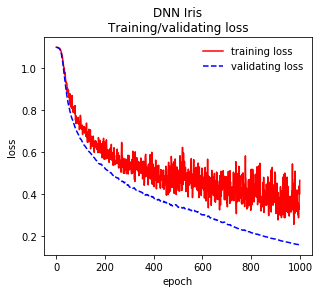

In [17]:
#----------------------------------------
# Summarize history for loss.

plt.figure('DNN Iris loss', figsize = (4.8, 4.0))
plt.plot(history.history['loss'], "r-")
plt.plot(history.history['val_loss'], "b--")
plt.title('DNN Iris' + '\n' + 'Training/validating loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validating loss'], loc = "best", frameon = False)
plt.show()


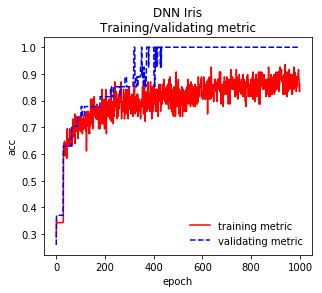

In [18]:
#----------------------------------------
# Summarize history for metric.

plt.figure('DNN Iris metric', figsize = (4.8, 4.0))
plt.plot(history.history['acc'], "r-")
plt.plot(history.history['val_acc'], "b--")
plt.title('DNN Iris' + '\n' + 'Training/validating metric')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['training metric', 'validating metric'], loc = "best", frameon = False)
plt.show()
